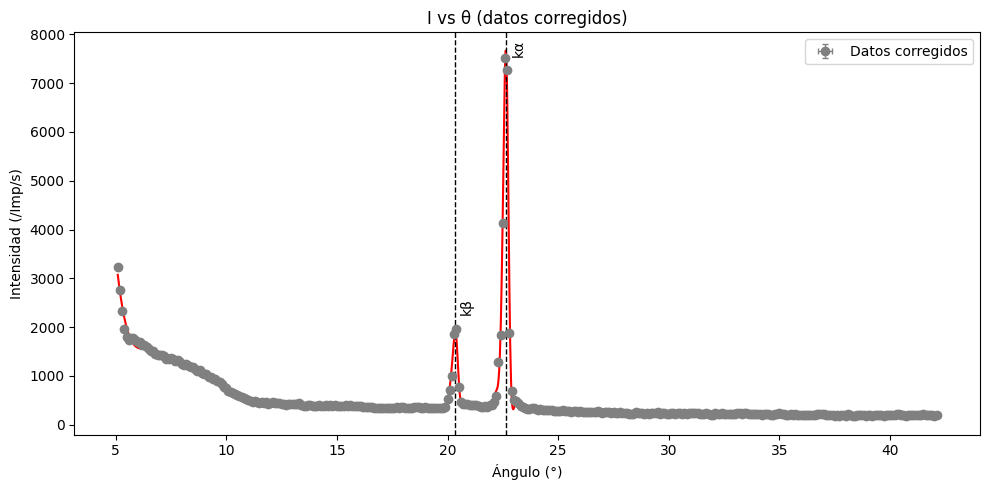

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# -------------------------------
# Datos experimentales (theta en grados, intensidad en Imp/s)
# -------------------------------
theta_deg = np.array([
    3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
    4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
    5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
    6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
    7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
    8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
    9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
    10,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,
    11,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,
    12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,
    13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,
    14,14.1,14.2,14.3,14.4,14.5,14.6,14.7,14.8,14.9,
    15,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,
    16,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,
    17,17.1,17.2,17.3,17.4,17.5,17.6,17.7,17.8,17.9,
    18,18.1,18.2,18.3,18.4,18.5,18.6,18.7,18.8,18.9,
    19,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,
    20,20.1,20.2,20.3,20.4,20.5,20.6,20.7,20.8,20.9,
    21,21.1,21.2,21.3,21.4,21.5,21.6,21.7,21.8,21.9,
    22,22.1,22.2,22.3,22.4,22.5,22.6,22.7,22.8,22.9,
    23,23.1,23.2,23.3,23.4,23.5,23.6,23.7,23.8,23.9,
    24,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,
    25,25.1,25.2,25.3,25.4,25.5,25.6,25.7,25.8,25.9,
    26,26.1,26.2,26.3,26.4,26.5,26.6,26.7,26.8,26.9,
    27,27.1,27.2,27.3,27.4,27.5,27.6,27.7,27.8,27.9,
    28,28.1,28.2,28.3,28.4,28.5,28.6,28.7,28.8,28.9,
    29,29.1,29.2,29.3,29.4,29.5,29.6,29.7,29.8,29.9,
    30,30.1,30.2,30.3,30.4,30.5,30.6,30.7,30.8,30.9,
    31,31.1,31.2,31.3,31.4,31.5,31.6,31.7,31.8,31.9,
    32,32.1,32.2,32.3,32.4,32.5,32.6,32.7,32.8,32.9,
    33,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,
    34,34.1,34.2,34.3,34.4,34.5,34.6,34.7,34.8,34.9,
    35,35.1,35.2,35.3,35.4,35.5,35.6,35.7,35.8,35.9,
    36,36.1,36.2,36.3,36.4,36.5,36.6,36.7,36.8,36.9,
    37,37.1,37.2,37.3,37.4,37.5,37.6,37.7,37.8,37.9,
    38,38.1,38.2,38.3,38.4,38.5,38.6,38.7,38.8,38.9,
    39,39.1,39.2,39.3,39.4,39.5,39.6,39.7,39.8,39.9,
    40
])
I_obs = np.array([
3231,2765,2340,1972,1805,1736,1778,1774,1737,1702,
1692,1634,1626,1591,1545,1507,1507,1455,1437,1429,
1423,1410,1352,1356,1362,1342,1302,1334,1285,1239,
1225,1239,1194,1183,1186,1138,1093,1116,1066,1049,
1040,983,977,947,942,893,878,839,777,753,
695,667,644,635,608,588,562,539,536,501,
486,468,488,457,453,462,439,463,423,441,
459,440,444,447,425,425,414,418,416,419,
424,423,438,410,391,387,398,401,381,391,
389,399,393,385,415,383,402,387,399,389,
391,390,393,415,391,397,379,378,382,390,
379,365,362,359,361,371,342,345,343,351,
334,339,350,339,347,351,354,341,367,355,
335,342,341,335,356,354,366,352,345,370,
349,349,343,352,343,350,341,349,356,535,
712,1003,1866,1969,781,469,424,420,428,411,
408,397,398,376,373,364,390,363,396,401,
465,590,1293,1847,4130,7523,7260,1890,690,513,
490,440,379,369,339,331,321,335,339,333,
308,322,296,312,296,309,300,290,291,288,
273,298,282,288,285,258,279,280,265,282,
263,260,265,270,256,258,263,273,267,244,
261,267,258,247,253,245,249,253,237,241,
234,223,230,230,256,233,236,242,229,236,
229,237,235,241,257,228,241,238,230,226,
241,249,231,246,239,224,245,218,232,237,
233,242,241,229,222,211,237,224,201,208,
240,224,225,232,223,229,229,229,225,227,
239,241,226,244,246,231,222,222,222,218,
220,209,219,225,214,206,199,228,219,238,
228,229,205,208,211,200,213,201,204,205,
202,196,197,207,208,203,217,214,211,223,
193,210,207,210,188,195,188,201,199,187,
216,191,186,184,203,203,196,200,182,202,
199,181,196,206,198,198,187,204,198,204,
200,199,223,214,201,210,189,196,201,199,
199,195,199,203,211,195,193,194,193,190,
191
])

# -------------------------------
# Corrección del desfase angular
# -------------------------------
# Observado máximo experimental: 20.5°, debería ser 22.6° -> desfase = -2.1°
# Aplicamos la corrección sumando +2.1° a todos los ángulos
theta_corr_deg = theta_deg + 2.1


# Usamos una spline suavizada (interpolación suave) para dibujar la curva que asemeje
# el boceto (esto NO es una regresión de parámetros).
s_val = len(theta_corr_deg) * np.var(I_obs) * 0.01  # ajuste de suavizado (puedes cambiar)
spline = UnivariateSpline(theta_corr_deg, I_obs, s=s_val)
theta_fine = np.linspace(theta_corr_deg.min(), theta_corr_deg.max(), 2000)
I_smooth = spline(theta_fine)

# Detectar los dos picos más altos en la curva suavizada y marcarlos
peaks_idx, _ = find_peaks(I_smooth, distance=20)  # distance evita picos muy próximos
if len(peaks_idx) >= 2:
    peak_vals = I_smooth[peaks_idx]
    top_two = peaks_idx[np.argsort(peak_vals)[-2:]]
    top_two = np.sort(top_two)
    peak_angles = theta_fine[top_two]
else:
    peak_angles = theta_fine[peaks_idx]

# -------------------------------
# Estética: colores y estilo similares a tu formato
# -------------------------------
# Tu código usaba azul para puntos y rojo para curvas; reproducimos eso.
dot_color = "gray"
curve_color = "red"
vdash_color = "black"

# -------------------------------
# Gráfica final (solo panel principal, estilo similar al tuyo)
# -------------------------------
fig, ax = plt.subplots(figsize=(10,5))

# puntos experimentales (con barras de error pequeñas para mostrar precisión)
theta_err_deg = 0.1  # si quieres mostrar error en x (en grados)
I_err = np.sqrt(I_obs) * 0.0 + 10  # marcador visual; ajusta o pon 0 si no deseas barras
ax.errorbar(theta_corr_deg, I_obs,
            xerr=theta_err_deg, yerr=I_err,
            fmt="o", color=dot_color, ecolor="gray",
            elinewidth=1, capsize=2, label="Datos corregidos")

# curva suavizada (línea continua roja)
ax.plot(theta_fine, I_smooth, color=curve_color, linewidth=1.5)

# líneas verticales punteadas para kβ y kα (en el bosquejo estaban así)
labels = ["kβ", "kα"]
pos = [(0.5,0),(0.6,-500.6)]
for i, ang in enumerate(peak_angles):
    ax.axvline(ang, linestyle="--", linewidth=1, color=vdash_color)
    # colocar etiqueta justo encima de la curva en esa x
    y_loc = spline(ang)
    ax.text(ang+pos[i][0], y_loc + 0.05 * (I_smooth.max() - I_smooth.min())+pos[i][1],
          labels[i], rotation=90, verticalalignment='bottom', horizontalalignment='center', )

# ejes y título (manteniendo el estilo de tu código)
ax.set_xlabel("Ángulo (°)")
ax.set_ylabel("Intensidad (/Imp/s)")
ax.set_title("I vs θ (datos corregidos)")
ax.grid(False)
ax.legend()

plt.tight_layout()
plt.show()


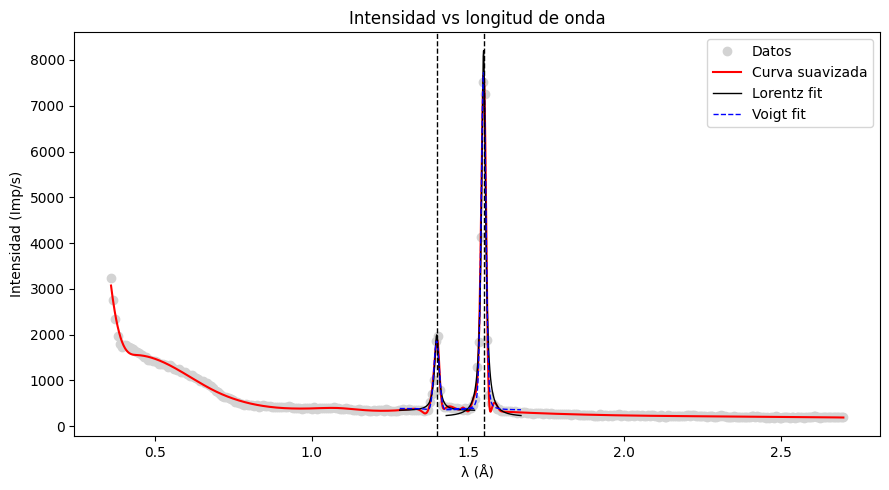

Tabla guardada en: tabla_lineas_cu_experimental.csv

Resumen (comparación con Cu referencia):
line  lam_teo_A  lam_exp_n1_A    E_teo_eV  E_exp_n1_eV  lorentz_rss    voigt_rss
  Kb    1.39222      1.400961 8905.503328  8849.938683 1.482537e+06 7.916659e+05
  Ka    1.54056      1.549779 8047.995432  8000.122836 1.302261e+07 3.439147e+06

Límites angulares (θ_max) para n=1 (grados):
Ka: theta_max(n=1) = 22.486
Kb: theta_max(n=1) = 20.221


In [ ]:
# Requisitos: pip install numpy scipy matplotlib pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import wofz
import pandas as pd

# -------------------------
# Constantes
# -------------------------
h = 6.62607015e-34       # J s
c = 299792458.0          # m/s
eV = 1.602176634e-19     # J per eV
angstrom = 1e-10         # m

# -------------------------
# Datos (ángulos en grados, I en Imp/s)
# (pega aquí los arrays completos si prefieres; uso tus arrays)
# -------------------------
theta_deg = np.array([
    3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
    4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
    5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
    6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
    7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
    8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
    9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
    10,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,
    11,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,
    12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,
    13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,
    14,14.1,14.2,14.3,14.4,14.5,14.6,14.7,14.8,14.9,
    15,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,
    16,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,
    17,17.1,17.2,17.3,17.4,17.5,17.6,17.7,17.8,17.9,
    18,18.1,18.2,18.3,18.4,18.5,18.6,18.7,18.8,18.9,
    19,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,
    20,20.1,20.2,20.3,20.4,20.5,20.6,20.7,20.8,20.9,
    21,21.1,21.2,21.3,21.4,21.5,21.6,21.7,21.8,21.9,
    22,22.1,22.2,22.3,22.4,22.5,22.6,22.7,22.8,22.9,
    23,23.1,23.2,23.3,23.4,23.5,23.6,23.7,23.8,23.9,
    24,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,
    25,25.1,25.2,25.3,25.4,25.5,25.6,25.7,25.8,25.9,
    26,26.1,26.2,26.3,26.4,26.5,26.6,26.7,26.8,26.9,
    27,27.1,27.2,27.3,27.4,27.5,27.6,27.7,27.8,27.9,
    28,28.1,28.2,28.3,28.4,28.5,28.6,28.7,28.8,28.9,
    29,29.1,29.2,29.3,29.4,29.5,29.6,29.7,29.8,29.9,
    30,30.1,30.2,30.3,30.4,30.5,30.6,30.7,30.8,30.9,
    31,31.1,31.2,31.3,31.4,31.5,31.6,31.7,31.8,31.9,
    32,32.1,32.2,32.3,32.4,32.5,32.6,32.7,32.8,32.9,
    33,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,
    34,34.1,34.2,34.3,34.4,34.5,34.6,34.7,34.8,34.9,
    35,35.1,35.2,35.3,35.4,35.5,35.6,35.7,35.8,35.9,
    36,36.1,36.2,36.3,36.4,36.5,36.6,36.7,36.8,36.9,
    37,37.1,37.2,37.3,37.4,37.5,37.6,37.7,37.8,37.9,
    38,38.1,38.2,38.3,38.4,38.5,38.6,38.7,38.8,38.9,
    39,39.1,39.2,39.3,39.4,39.5,39.6,39.7,39.8,39.9,
    40
])
I_obs = np.array([
3231,2765,2340,1972,1805,1736,1778,1774,1737,1702,
1692,1634,1626,1591,1545,1507,1507,1455,1437,1429,
1423,1410,1352,1356,1362,1342,1302,1334,1285,1239,
1225,1239,1194,1183,1186,1138,1093,1116,1066,1049,
1040,983,977,947,942,893,878,839,777,753,
695,667,644,635,608,588,562,539,536,501,
486,468,488,457,453,462,439,463,423,441,
459,440,444,447,425,425,414,418,416,419,
424,423,438,410,391,387,398,401,381,391,
389,399,393,385,415,383,402,387,399,389,
391,390,393,415,391,397,379,378,382,390,
379,365,362,359,361,371,342,345,343,351,
334,339,350,339,347,351,354,341,367,355,
335,342,341,335,356,354,366,352,345,370,
349,349,343,352,343,350,341,349,356,535,
712,1003,1866,1969,781,469,424,420,428,411,
408,397,398,376,373,364,390,363,396,401,
465,590,1293,1847,4130,7523,7260,1890,690,513,
490,440,379,369,339,331,321,335,339,333,
308,322,296,312,296,309,300,290,291,288,
273,298,282,288,285,258,279,280,265,282,
263,260,265,270,256,258,263,273,267,244,
261,267,258,247,253,245,249,253,237,241,
234,223,230,230,256,233,236,242,229,236,
229,237,235,241,257,228,241,238,230,226,
241,249,231,246,239,224,245,218,232,237,
233,242,241,229,222,211,237,224,201,208,
240,224,225,232,223,229,229,229,225,227,
239,241,226,244,246,231,222,222,222,218,
220,209,219,225,214,206,199,228,219,238,
228,229,205,208,211,200,213,201,204,205,
202,196,197,207,208,203,217,214,211,223,
193,210,207,210,188,195,188,201,199,187,
216,191,186,184,203,203,196,200,182,202,
199,181,196,206,198,198,187,204,198,204,
200,199,223,214,201,210,189,196,201,199,
199,195,199,203,211,195,193,194,193,190,
191
])

# -------------------------
# Corrección del desfase: +2.1°
# -------------------------
theta_corr_deg = theta_deg + 2.1
theta_corr_rad = np.deg2rad(theta_corr_deg)

# -------------------------
# Parámetro de red LiF
# -------------------------
d = 2.014e-10   # m (2.014 x 10^-10 m)

# -------------------------
# Convertir a longitud de onda vía Bragg (para n=1 y n=2)
# lambda = 2 d sin(theta) / n
# -------------------------
lambda_n1_m = 2 * d * np.sin(theta_corr_rad)      # m
lambda_n2_m = 2 * d * np.sin(theta_corr_rad) / 2  # m  (ó  = d * sin(theta) )

# pasar a Å
lambda_n1_A = lambda_n1_m / angstrom


# -------------------------
# Gráfica I vs lambda (usar spline suavizada)
# -------------------------
s_val = len(theta_corr_deg) * np.var(I_obs) * 0.01
spline = UnivariateSpline(lambda_n1_A, I_obs, s=s_val)  # usar lambda de n=1 para eje x
lam_fine = np.linspace(lambda_n1_A.min(), lambda_n1_A.max(), 2000)
I_smooth = spline(lam_fine)

# detectar picos (en espacio de lambda)
peaks_idx, _ = find_peaks(I_smooth, distance=30, prominence=0.1 * (I_smooth.max()-I_smooth.min()))
peak_lams = lam_fine[peaks_idx]
peak_vals = I_smooth[peaks_idx]

# tomar 2 picos principales (Kβ y Kα) si existen
if len(peak_vals) >= 2:
    top_idx = np.argsort(peak_vals)[-2:]
    top_idx = np.sort(top_idx)
    peak_lams_top = peak_lams[top_idx]
else:
    peak_lams_top = peak_lams

# -------------------------
# Funciones de línea: Lorentziana y Voigt
# -------------------------
def lorentz(x, A, x0, gamma, y0):
    # A: altura (área-proporcional), x0 centro, gamma ancho FWHM, y0 offset
    return A * (0.5*gamma)**2 / ((x - x0)**2 + (0.5*gamma)**2) + y0

def voigt_profile(x, amp, x0, sigma, gamma, y0):
    # Voigt using scipy wofz; normalized amplitude so that peak ~ amp
    z = ((x - x0) + 1j*gamma) / (sigma * np.sqrt(2))
    V = np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))
    # scale V so its max = 1, then multiply by amp
    V = V / V.max()
    return amp * V + y0

# -------------------------
# Ajustes: para cada pico, recortar ventana y ajustar Lorentz y Voigt
# -------------------------
results = []
for i, lam_peak in enumerate(peak_lams_top):
    # definir ventana alrededor del pico (ej: +/- 0.08 Å, ajustar si se necesita)
    win = 0.12
    mask = (lam_fine >= lam_peak - win) & (lam_fine <= lam_peak + win)
    x_win = lam_fine[mask]
    y_win = I_smooth[mask]

    # si la spline no tiene suficientes puntos, recortar con datos originales:
    if x_win.size < 20:
        mask2 = (lambda_n1_A >= lam_peak - win) & (lambda_n1_A <= lam_peak + win)
        x_win = lambda_n1_A[mask2]
        y_win = I_obs[mask2]
    if x_win.size < 8:
        continue

    # estimaciones iniciales
    A0 = y_win.max() - y_win.min()
    x0_0 = lam_peak
    gamma0 = 0.02
    y00 = np.median(y_win)

    # Lorentz fit
    try:
        p0_l = [A0, x0_0, gamma0, y00]
        popt_l, pcov_l = curve_fit(lorentz, x_win, y_win, p0=p0_l, maxfev=5000)
        perr_l = np.sqrt(np.diag(pcov_l))
        rss_l = np.sum((y_win - lorentz(x_win, *popt_l))**2)
    except Exception as e:
        popt_l = [np.nan]*4
        perr_l = [np.nan]*4
        rss_l = np.nan

    # Voigt fit
    try:
        p0_v = [A0, x0_0, 0.01, 0.01, y00]  # amp, x0, sigma, gamma, y0
        popt_v, pcov_v = curve_fit(voigt_profile, x_win, y_win, p0=p0_v, maxfev=8000)
        perr_v = np.sqrt(np.diag(pcov_v))
        rss_v = np.sum((y_win - voigt_profile(x_win, *popt_v))**2)
    except Exception as e:
        popt_v = [np.nan]*5
        perr_v = [np.nan]*5
        rss_v = np.nan

    # guardar resultados
    res = {
        'peak_index': i,
        'lam_peak_A': lam_peak,
        'lorentz_params': popt_l,
        'lorentz_err': perr_l,
        'lorentz_rss': rss_l,
        'voigt_params': popt_v,
        'voigt_err': perr_v,
        'voigt_rss': rss_v,
        'x_win': x_win,
        'y_win': y_win
    }
    results.append(res)

# -------------------------
# Tabla: para cada pico tomado como Kα/Kβ
# calcular lambda_exp (Å) usando theta de máximo experimental:
# Primero mapear cada lam_peak a su ángulo (aprox) buscando en lambda_n1_A vs theta_corr_deg
# -------------------------
def lamA_to_theta_deg(lamA):
    # encontrar índice de lambda_n1_A más cercano en datos
    idx = np.argmin(np.abs(lambda_n1_A - lamA))
    return theta_corr_deg[idx]

summary_rows = []
# literature (Cu) — valores de referencia
# Kα1 ~ 1.54056 Å, Kβ ~ 1.3922 Å (fuentes: Stanford / NIST). :contentReference[oaicite:1]{index=1}
lambda_teo = {'Ka': 1.54056, 'Kb': 1.39222}

for j, r in enumerate(results):
    lamA = r['lam_peak_A']
    theta_at_peak = lamA_to_theta_deg(lamA)
    # experimental lambda from Bragg (we already have lamA from n=1 mapping)
    lam_exp_n1 = lamA
    # for n=2 experimental lambda would be 2*d*sin(theta)/2 = same numeric?
    # (but experimental identification for n=2 uses formula lambda = 2 d sin(theta)/n)
    lam_exp_n2 = 2 * d * np.sin(np.deg2rad(theta_at_peak)) / 2 / angstrom

    # energies
    E_exp_n1 = (h * c) / (lam_exp_n1 * angstrom) / eV  # eV
    E_exp_n2 = (h * c) / (lam_exp_n2 * angstrom) / eV

    # choose label Ka/Kb by comparing lam to literature
    label = 'Ka' if abs(lamA - lambda_teo['Ka']) < abs(lamA - lambda_teo['Kb']) else 'Kb'
    lam_teo_val = lambda_teo['Ka'] if label == 'Ka' else lambda_teo['Kb']
    E_teo_val = (h * c) / (lam_teo_val * angstrom) / eV

    summary_rows.append({
        'line': label,
        'lam_teo_A': lam_teo_val,
        'lam_exp_n1_A': lam_exp_n1,
        'E_teo_eV': E_teo_val,
        'E_exp_n1_eV': E_exp_n1,
        'lorentz_rss': r['lorentz_rss'],
        'voigt_rss': r['voigt_rss']
    })

df_summary = pd.DataFrame(summary_rows)

# -------------------------
# Límites angulares permisibles para n=1 y n=2 para cada línea teórica
# cond: sin(theta) <= n * lambda_teo / (2 d)  => theta_max = arcsin(n*lambda_teo/(2d))
# -------------------------
angle_limits = {}
for lab, lamA in lambda_teo.items():
    lam_m = lamA * angstrom
    # n=1
    arg1 = lam_m / (2 * d)
    if abs(arg1) <= 1:
        theta_max1 = np.rad2deg(np.arcsin(arg1))
    else:
        theta_max1 = np.nan
    # n=2
    arg2 = 2 * lam_m / (2 * d)  # = lam_m / d
    if abs(arg2) <= 1:
        # theta range for n=2 will be from theta_min? usually critical value where sin <=1
        theta_max2 = np.rad2deg(np.arcsin(arg2))
    else:
        theta_max2 = np.nan
    angle_limits[lab] = {'theta_max_n1_deg': theta_max1, 'theta_max_n2_deg': theta_max2}

# -------------------------
# Guardar outputs y graficar
# -------------------------
# 1) I vs lambda plot (main)
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(lambda_n1_A, I_obs, 'o', color='lightgray', label='Datos')        # puntos
ax.plot(lam_fine, I_smooth, '-', color='red', label='Curva suavizada')

# superponer ajustes por pico (si se efectuaron)
for r in results:
    x_win = r['x_win']; y_win = r['y_win']
    if not np.isnan(r['lorentz_rss']):
        try:
            y_l = lorentz(x_win, *r['lorentz_params'])
            ax.plot(x_win, y_l, '-', color='black', linewidth=1, label='Lorentz fit' if 'Lorentz fit' not in ax.get_legend_handles_labels()[1] else "")
        except: pass
    if not np.isnan(r['voigt_rss']):
        try:
            y_v = voigt_profile(x_win, *r['voigt_params'])
            ax.plot(x_win, y_v, '--', color='blue', linewidth=1, label='Voigt fit' if 'Voigt fit' not in ax.get_legend_handles_labels()[1] else "")
        except: pass

# marcar picos principales
for i, lam in enumerate(peak_lams_top):
    ax.axvline(lam, linestyle='--', color='black', linewidth=1)


ax.set_xlabel('λ (Å)')
ax.set_ylabel('Intensidad (Imp/s)')
ax.set_title('Intensidad vs longitud de onda')
ax.legend()
ax.grid(False)
plt.tight_layout()
plt.show()

# 2) Guardar tabla resumen CSV
csv_path = 'tabla_lineas_cu_experimental.csv'
df_summary.to_csv(csv_path, index=False)
print(f"Tabla guardada en: {csv_path}")

# 3) Imprimir resumen en pantalla
print("\nResumen (comparación con Cu referencia):")
print(df_summary.to_string(index=False))
print("\nLímites angulares (θ_max) para n=1 (grados):")
for lab, vals in angle_limits.items():
    print(f"{lab}: theta_max(n=1) = {vals['theta_max_n1_deg']:.3f}")

# FIN


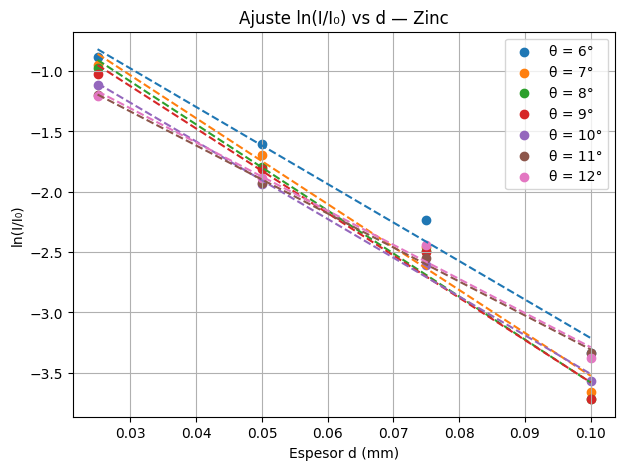

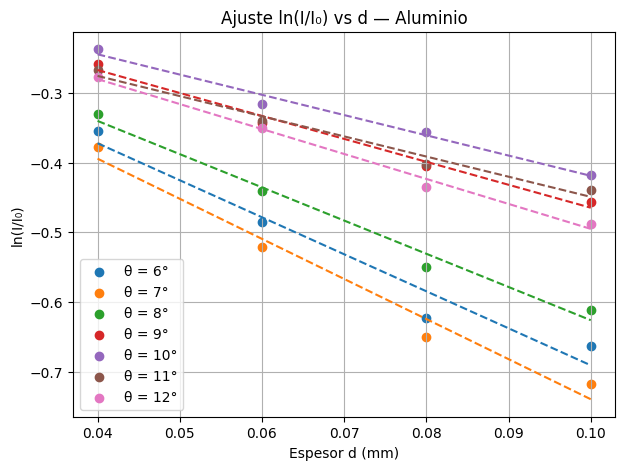

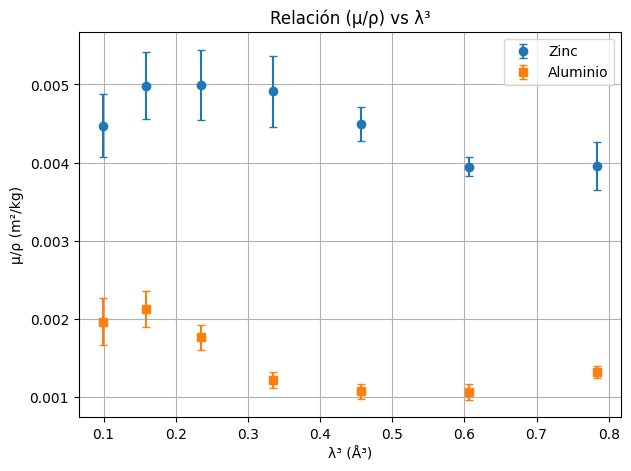

    Ángulo (°)  Material   μ (1/mm)   Error μ
0            6      Zinc  31.920768  2.867542
1            7      Zinc  35.587194  3.077873
2            8      Zinc  35.662669  3.195577
3            9      Zinc  35.067506  3.248506
4           10      Zinc  32.114094  1.563540
5           11      Zinc  28.170912  0.857311
6           12      Zinc  28.280220  2.180390
7            6  Aluminio   5.310136  0.814717
8            7  Aluminio   5.751367  0.631905
9            8  Aluminio   4.764773  0.419135
10           9  Aluminio   3.292407  0.278267
11          10  Aluminio   2.905131  0.256914
12          11  Aluminio   2.891492  0.275915
13          12  Aluminio   3.581231  0.207259

Archivo 'coeficientes_atenuacion.csv' generado con éxito.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos experimentales
# ======================================================
theta = np.array([6,7,8,9,10,11,12])  # grados
I0 = np.array([871,738,494,330,284,281,264])  # sin barrera

# Zinc
Zn_025 = np.array([359,286,186,118,93,85,79])
Zn_05  = np.array([175,135,82,54,41,41,40])
Zn_075 = np.array([93,63,41,27,21,22,23])
Zn_1   = np.array([31,19,12,8,8,10,9])

# Aluminio
Al_04  = np.array([611,506,355,255,224,215,200])
Al_06  = np.array([536,438,318,234,207,200,186])
Al_08  = np.array([467,385,285,220,199,188,171])
Al_1   = np.array([449,360,268,209,187,181,162])

# Espesores (mm)
d_Zn = np.array([0.025,0.05,0.075,0.1])
d_Al = np.array([0.04,0.06,0.08,0.1])

Zn_data = np.array([Zn_025,Zn_05,Zn_075,Zn_1])
Al_data = np.array([Al_04,Al_06,Al_08,Al_1])

# ======================================================
# 2. Corrección angular y cálculo de longitud de onda
# ======================================================
corr_factor = 22.6 / 20.5  # corrección por desplazamiento del pico
theta_corr = theta * corr_factor
d_cristal = 2.014  # Å
lambda_ang = 2 * d_cristal * np.sin(np.radians(theta_corr))  # Ley de Bragg (n=1)
lambda_cub = lambda_ang**3

# ======================================================
# 3. Funciones auxiliares
# ======================================================
def ln_intensidad(I, I0):
    return np.log(I / I0)

def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d.
    """
    mu_vals, mu_errs = [], []

    plt.figure(figsize=(7,5))
    for j in range(len(I0)):  # por cada ángulo
        I_col = material_data[:, j]  # intensidades a ese ángulo para varios espesores
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu_vals.append(-slope)
        mu_errs.append(stderr)
        plt.scatter(d_values, lnI, label=f"θ = {theta[j]}°")
        plt.plot(d_values, slope*d_values + intercept, '--')

    plt.title(f"Ajuste ln(I/I₀) vs d — {material}")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("ln(I/I₀)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)

# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³
# ======================================================
rho_Zn, rho_Al = 7138, 2698  # densidades en kg/m³
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho_Zn, yerr=μ_err_Zn/rho_Zn, fmt='o', label='Zinc', capsize=3)
plt.errorbar(lambda_cub, mu_rho_Al, yerr=μ_err_Al/rho_Al, fmt='s', label='Aluminio', capsize=3)
plt.xlabel("λ³ (Å³)")
plt.ylabel("μ/ρ (m²/kg)")
plt.title("Relación (μ/ρ) vs λ³")
plt.legend()
plt.grid(False)
plt.show()

# ======================================================
# 6. Exportar resultados a CSV
# ======================================================
resultados = pd.DataFrame({
    'Ángulo (°)': np.concatenate([theta, theta]),
    'Material': ['Zinc']*len(μ_Zn) + ['Aluminio']*len(μ_Al),
    'μ (1/mm)': np.concatenate([μ_Zn, μ_Al]),
    'Error μ': np.concatenate([μ_err_Zn, μ_err_Al])
})
resultados.to_csv('coeficientes_atenuacion.csv', index=False)
print(resultados)
print("\nArchivo 'coeficientes_atenuacion.csv' generado con éxito.")


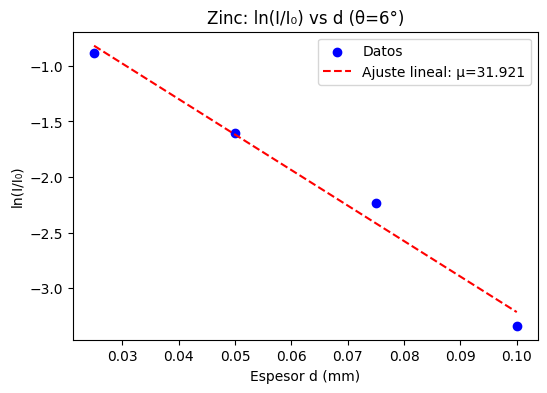

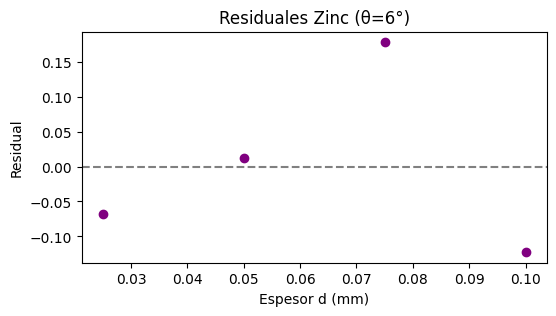

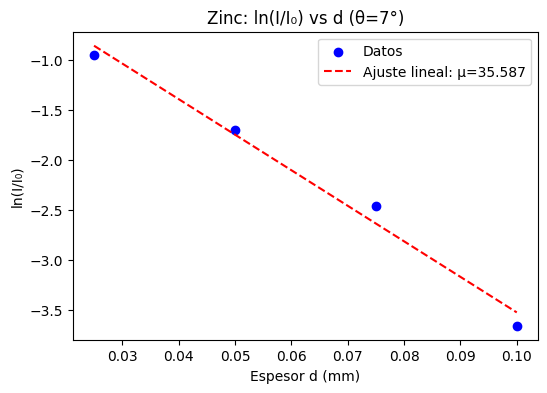

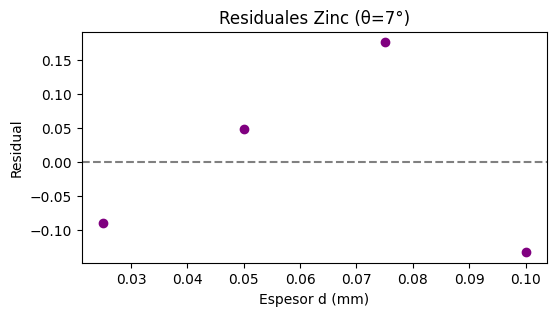

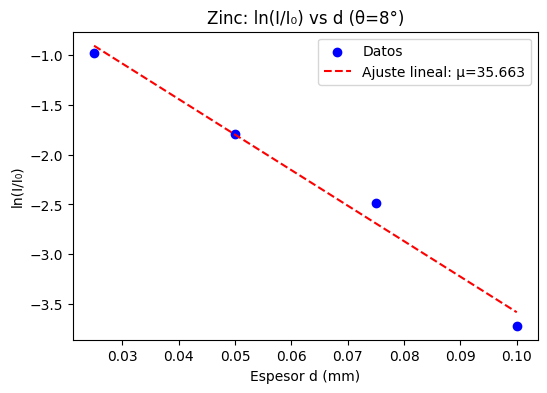

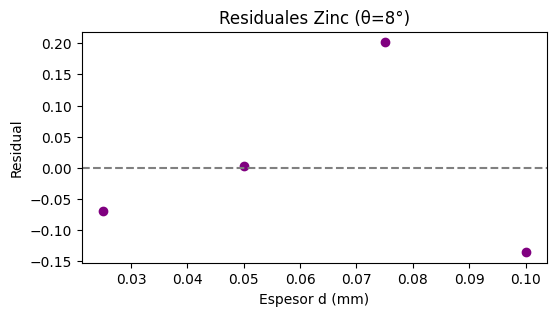

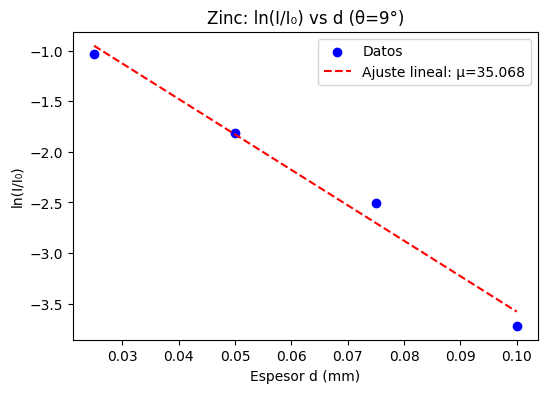

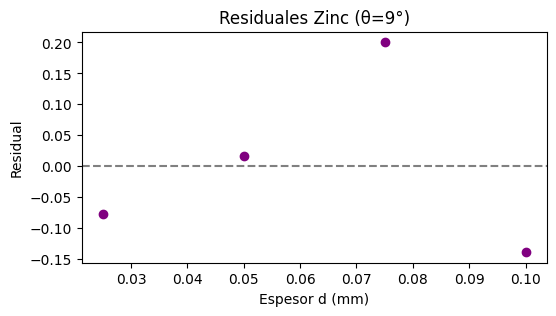

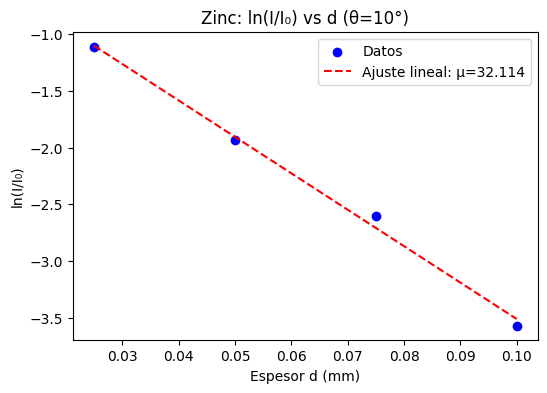

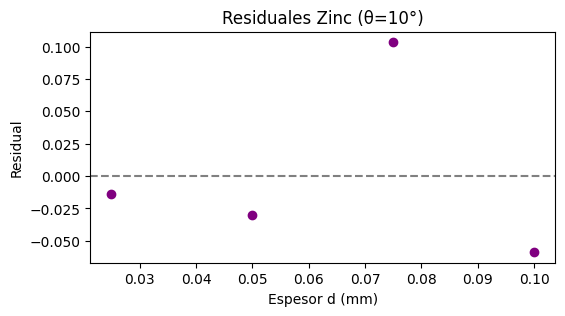

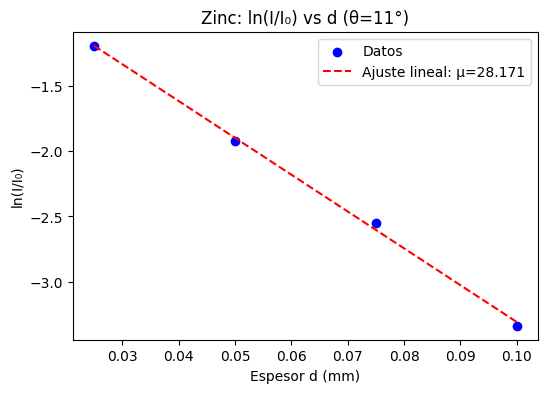

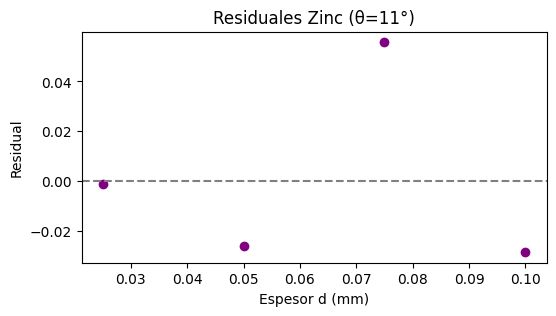

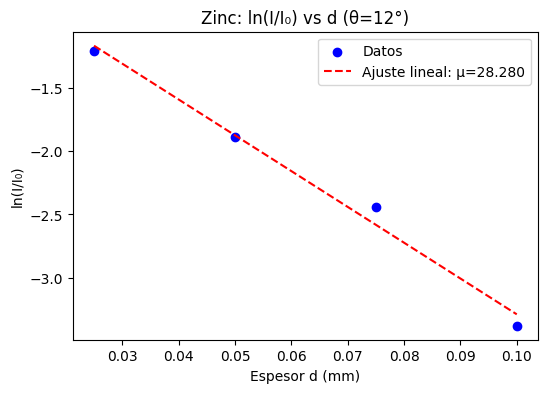

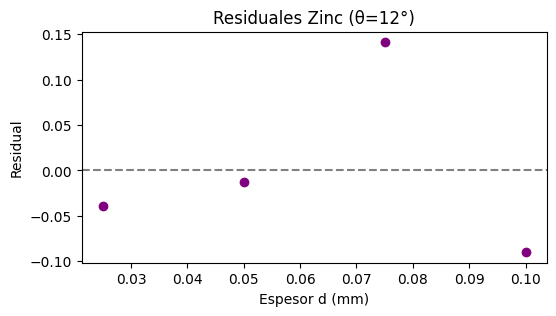

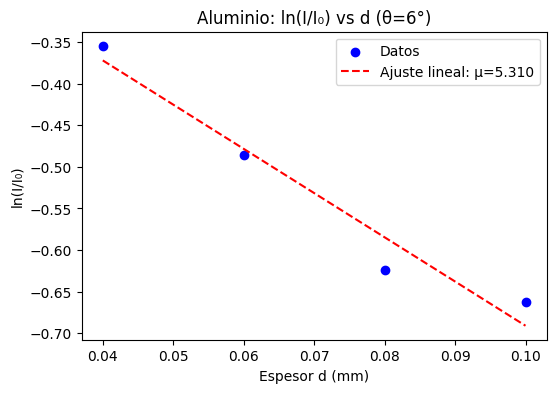

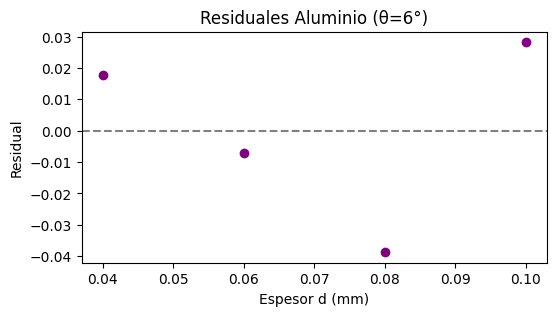

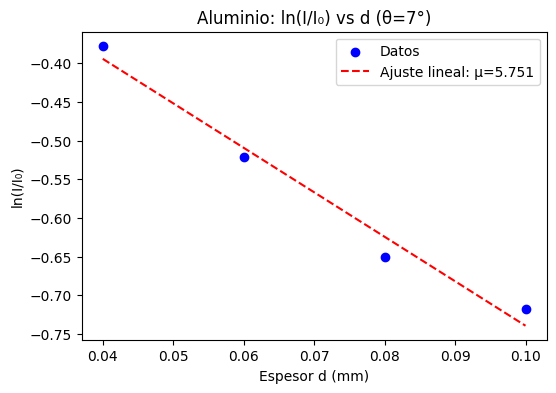

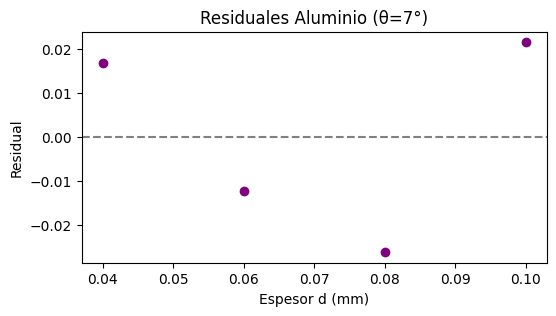

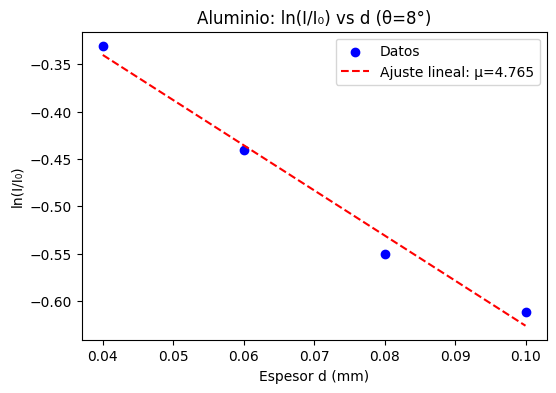

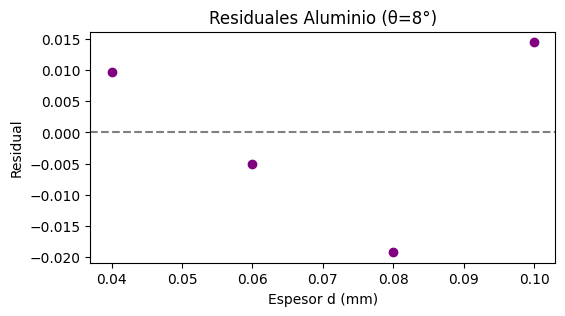

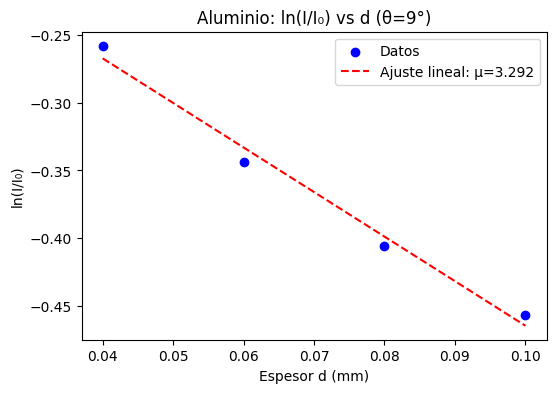

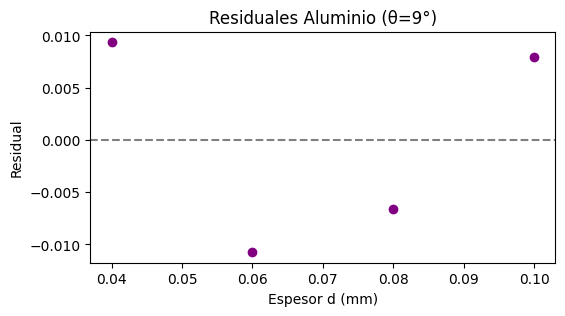

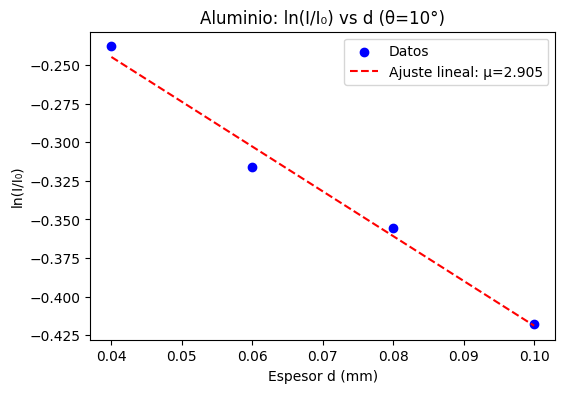

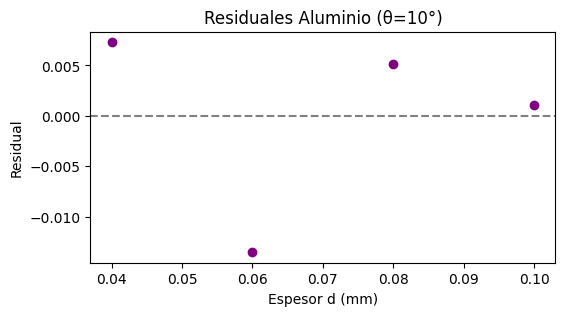

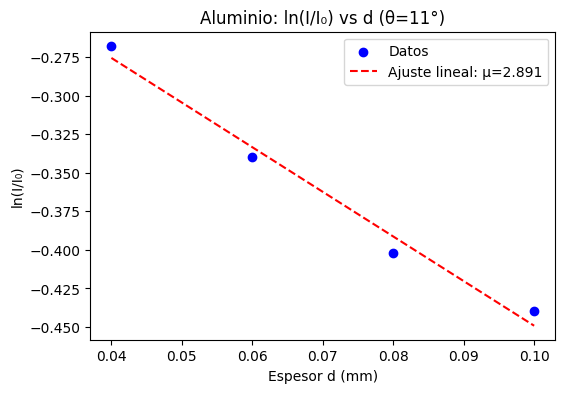

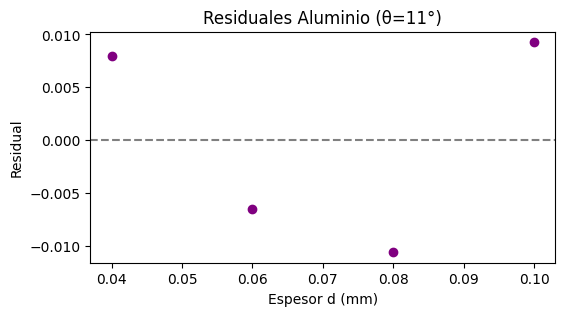

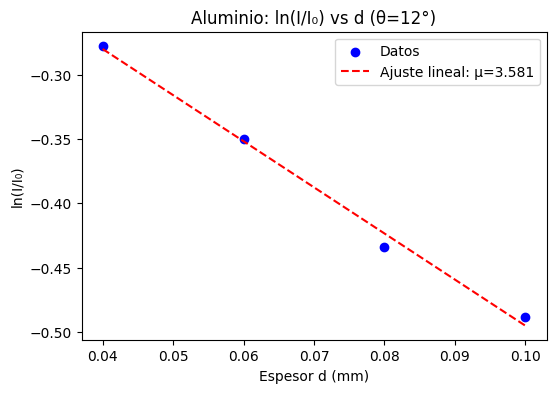

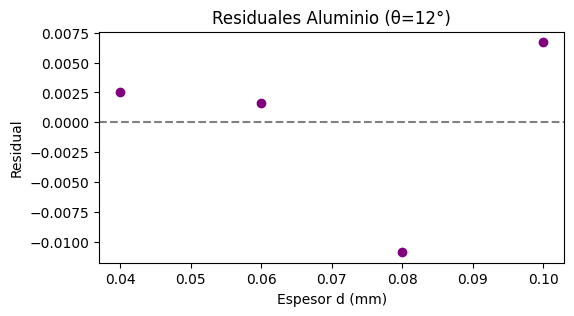

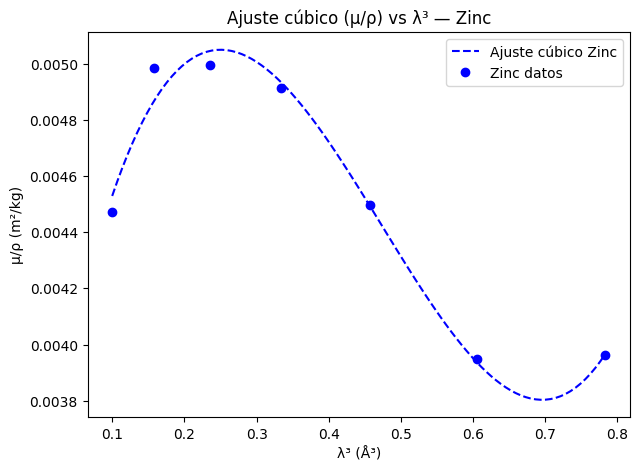

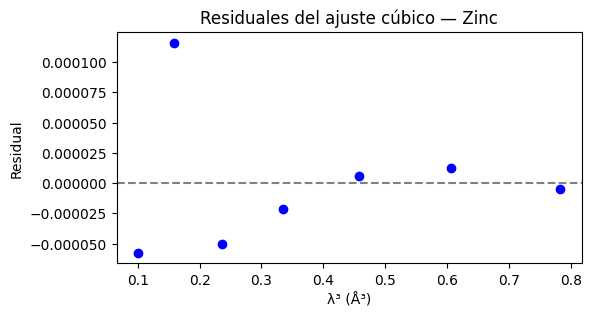


Coeficientes del ajuste cúbico para Zinc:
a=2.821e-02, b=-4.002e-02, c=1.473e-02, d=3.430e-03


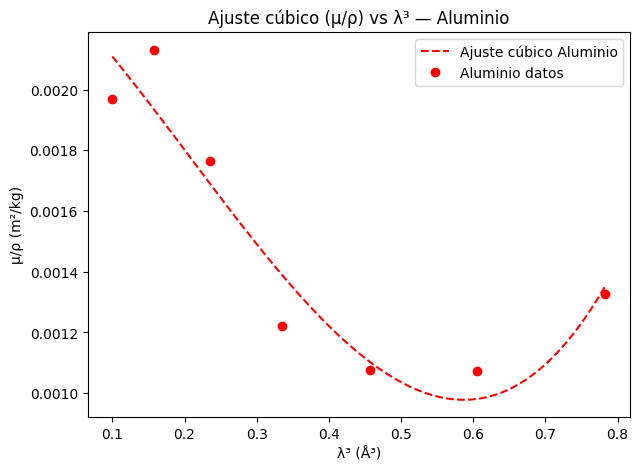

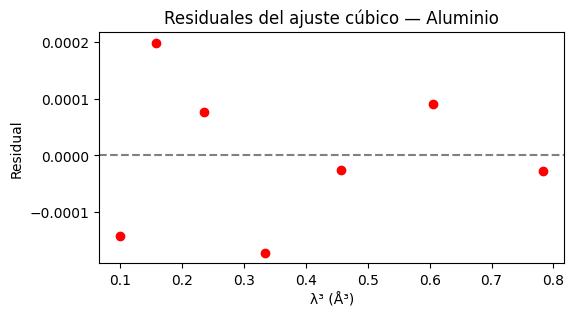


Coeficientes del ajuste cúbico para Aluminio:
a=7.302e-03, b=-4.531e-03, c=-2.228e-03, d=2.370e-03


(array([ 0.00730194, -0.00453107, -0.00222781,  0.00237018]),
 array([-1.41532419e-04,  1.98592538e-04,  7.65964910e-05, -1.71451183e-04,
        -2.59145935e-05,  9.05872921e-05, -2.68781247e-05]))

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos experimentales
# ======================================================
theta = np.array([6,7,8,9,10,11,12])  # grados
I0 = np.array([871,738,494,330,284,281,264])  # sin barrera

# Zinc
Zn_025 = np.array([359,286,186,118,93,85,79])
Zn_05  = np.array([175,135,82,54,41,41,40])
Zn_075 = np.array([93,63,41,27,21,22,23])
Zn_1   = np.array([31,19,12,8,8,10,9])

# Aluminio
Al_04  = np.array([611,506,355,255,224,215,200])
Al_06  = np.array([536,438,318,234,207,200,186])
Al_08  = np.array([467,385,285,220,199,188,171])
Al_1   = np.array([449,360,268,209,187,181,162])

# Espesores (mm)
d_Zn = np.array([0.025,0.05,0.075,0.1])
d_Al = np.array([0.04,0.06,0.08,0.1])

Zn_data = np.array([Zn_025,Zn_05,Zn_075,Zn_1])
Al_data = np.array([Al_04,Al_06,Al_08,Al_1])

# ======================================================
# 2. Corrección angular y cálculo de longitud de onda
# ======================================================
corr_factor = 22.6 / 20.5  # corrección por desplazamiento del pico
theta_corr = theta * corr_factor
d_cristal = 2.014  # Å
lambda_ang = 2 * d_cristal * np.sin(np.radians(theta_corr))
lambda_cub = lambda_ang**3

# ======================================================
# 3. Funciones auxiliares
# ======================================================
def ln_intensidad(I, I0):
    return np.log(I / I0)


# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³ con ajuste cúbico
# ======================================================
rho_Zn, rho_Al = 7138, 2698
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

# Ajuste cúbico y residuales
def ajuste_cubico(x, y, material, color):
    coeffs = np.polyfit(x, y, 3)
    p = np.poly1d(coeffs)
    y_fit = p(x)
    residuales = y - y_fit

    # Gráfica del ajuste
    plt.figure(figsize=(7,5))
    plt.errorbar(x, y, fmt='o', color=color, capsize=3, label=f'{material} datos')
    x_fit = np.linspace(min(x), max(x), 100)
    plt.plot(x_fit, p(x_fit), '--', color=color, label=f'Ajuste cúbico {material}')
    plt.title(f"Ajuste cúbico (μ/ρ) vs λ³ — {material}")
    plt.xlabel("λ³ (Å³)")
    plt.ylabel("μ/ρ (m²/kg)")
    plt.legend()
    plt.grid(False)
    plt.show()

    # Gráfica de residuales
    plt.figure(figsize=(6,3))
    plt.axhline(0, color='gray', linestyle='--')
    plt.scatter(x, residuales, color=color)
    plt.title(f"Residuales del ajuste cúbico — {material}")
    plt.xlabel("λ³ (Å³)")
    plt.ylabel("Residual")
    plt.grid(False)
    plt.show()

    print(f"\nCoeficientes del ajuste cúbico para {material}:")
    print(f"a={coeffs[0]:.3e}, b={coeffs[1]:.3e}, c={coeffs[2]:.3e}, d={coeffs[3]:.3e}")
    return coeffs, residuales

# Ejecutar ajustes cúbicos
ajuste_cubico(lambda_cub, mu_rho_Zn, "Zinc", "blue")
ajuste_cubico(lambda_cub, mu_rho_Al, "Aluminio", "red")


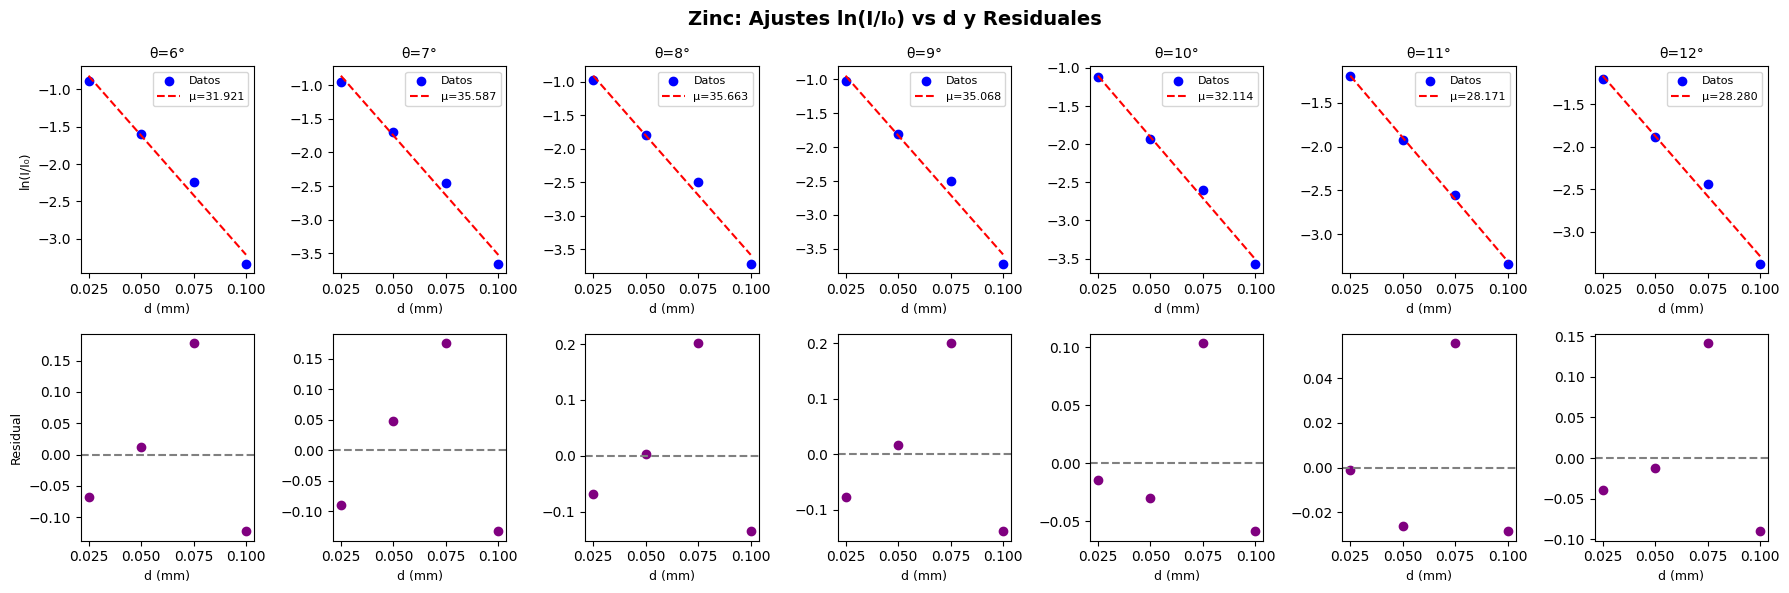

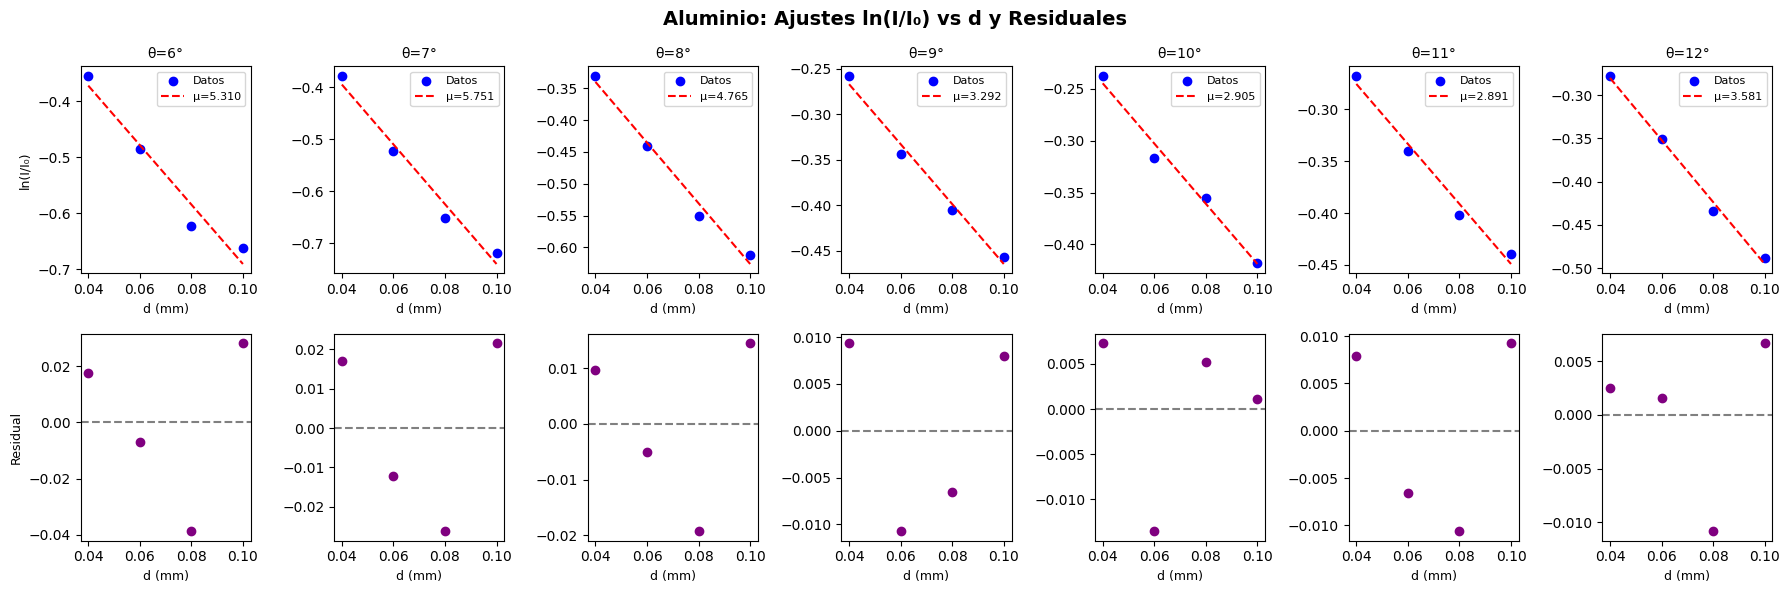

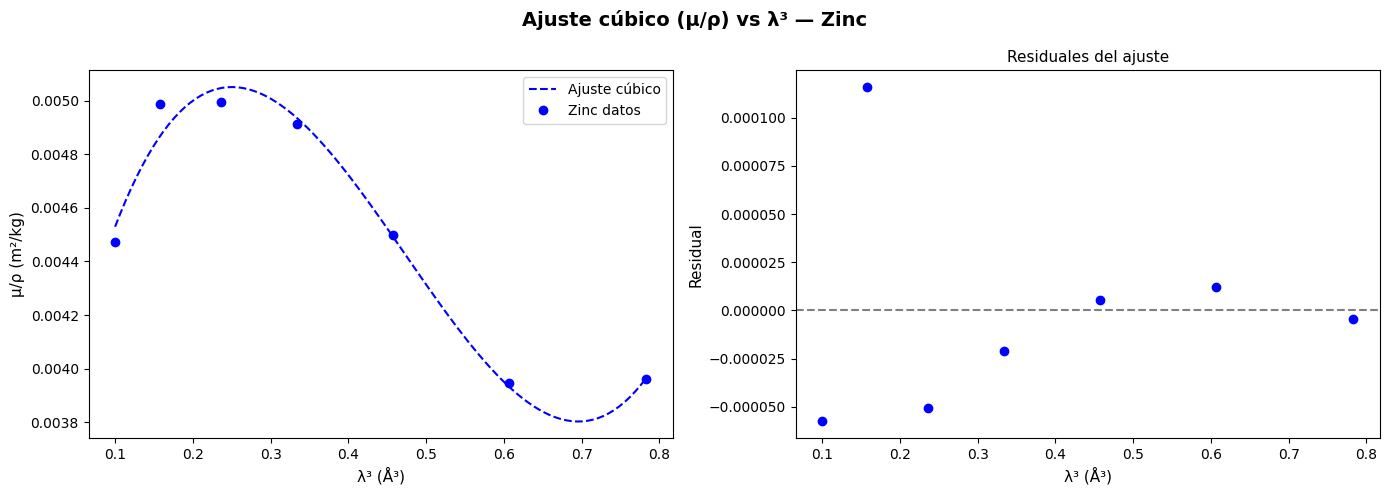


Coeficientes del ajuste cúbico para Zinc:
a=2.821e-02, b=-4.002e-02, c=1.473e-02, d=3.430e-03


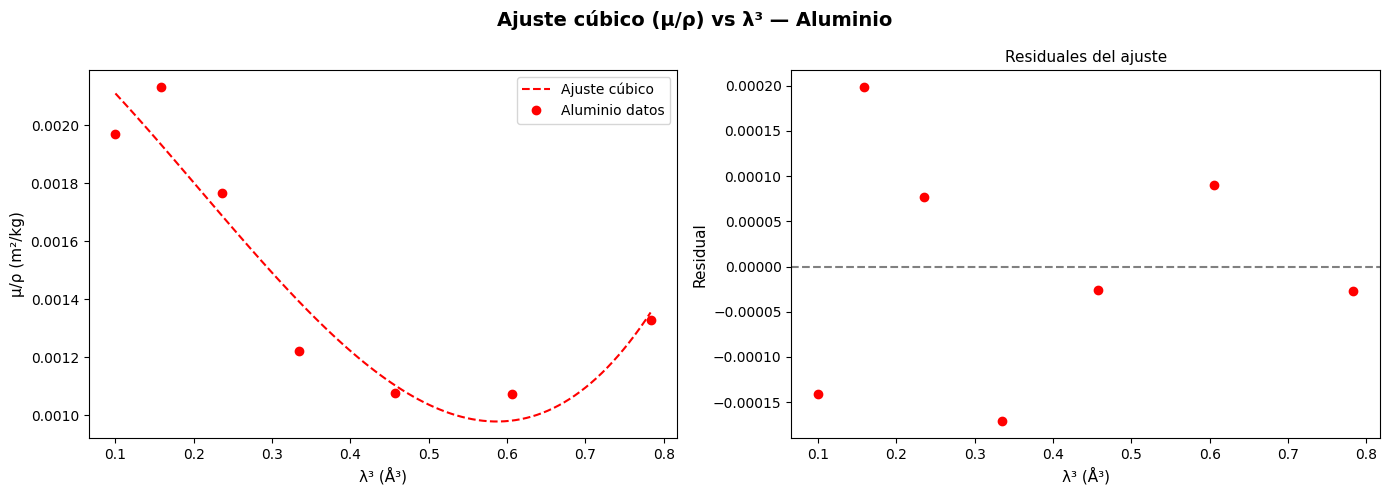


Coeficientes del ajuste cúbico para Aluminio:
a=7.302e-03, b=-4.531e-03, c=-2.228e-03, d=2.370e-03


(array([ 0.00730194, -0.00453107, -0.00222781,  0.00237018]),
 array([-1.41532419e-04,  1.98592538e-04,  7.65964910e-05, -1.71451183e-04,
        -2.59145935e-05,  9.05872921e-05, -2.68781247e-05]))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos experimentales
# ======================================================
theta = np.array([6,7,8,9,10,11,12])  # grados
I0 = np.array([871,738,494,330,284,281,264])  # sin barrera

# Zinc
Zn_025 = np.array([359,286,186,118,93,85,79])
Zn_05  = np.array([175,135,82,54,41,41,40])
Zn_075 = np.array([93,63,41,27,21,22,23])
Zn_1   = np.array([31,19,12,8,8,10,9])

# Aluminio
Al_04  = np.array([611,506,355,255,224,215,200])
Al_06  = np.array([536,438,318,234,207,200,186])
Al_08  = np.array([467,385,285,220,199,188,171])
Al_1   = np.array([449,360,268,209,187,181,162])

# Espesores (mm)
d_Zn = np.array([0.025,0.05,0.075,0.1])
d_Al = np.array([0.04,0.06,0.08,0.1])

Zn_data = np.array([Zn_025,Zn_05,Zn_075,Zn_1])
Al_data = np.array([Al_04,Al_06,Al_08,Al_1])

# ======================================================
# 2. Corrección angular y cálculo de longitud de onda
# ======================================================
corr_factor = 22.6 / 20.5  # corrección por desplazamiento del pico
theta_corr = theta * corr_factor
d_cristal = 2.014  # Å
lambda_ang = 2 * d_cristal * np.sin(np.radians(theta_corr))
lambda_cub = lambda_ang**3

# ======================================================
# 3. Funciones auxiliares
# ======================================================
def ln_intensidad(I, I0):
    return np.log(I / I0)

def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d
    y genera gráficas agrupadas de ajustes y residuales.
    """
    mu_vals, mu_errs = [], []
    n_angles = len(I0)

    # Crear figura con subplots: fila superior para ajustes, inferior para residuales
    fig, axes = plt.subplots(2, n_angles, figsize=(18, 6))
    fig.suptitle(f"{material}: Ajustes ln(I/I₀) vs d y Residuales", fontsize=14, fontweight='bold')

    for j in range(n_angles):
        I_col = material_data[:, j]
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu_vals.append(-slope)
        mu_errs.append(stderr)

        # --- Gráfica de ajuste (fila superior) ---
        ax_fit = axes[0, j]
        ax_fit.scatter(d_values, lnI, label='Datos', color='blue')
        ax_fit.plot(d_values, slope*d_values + intercept, 'r--', label=f"μ={-slope:.3f}")
        ax_fit.set_title(f"θ={theta[j]}°", fontsize=10)
        ax_fit.set_xlabel("d (mm)", fontsize=9)
        if j == 0:
            ax_fit.set_ylabel("ln(I/I₀)", fontsize=9)
        ax_fit.legend(fontsize=8)
        ax_fit.grid(False)

        # --- Gráfica de residuales (fila inferior) ---
        residuales = lnI - (slope*d_values + intercept)
        ax_res = axes[1, j]
        ax_res.axhline(0, color='gray', linestyle='--')
        ax_res.scatter(d_values, residuales, color='purple')
        ax_res.set_xlabel("d (mm)", fontsize=9)
        if j == 0:
            ax_res.set_ylabel("Residual", fontsize=9)
        ax_res.grid(False)

    plt.tight_layout()
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)

# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³ con ajuste cúbico
# ======================================================
rho_Zn, rho_Al = 7138, 2698
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

# Ajuste cúbico con residuales en una sola imagen
def ajuste_cubico(x, y, material, color):
    coeffs = np.polyfit(x, y, 3)
    p = np.poly1d(coeffs)
    y_fit = p(x)
    residuales = y - y_fit

    # Crear figura con 2 subplots (ajuste y residuales)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Ajuste cúbico (μ/ρ) vs λ³ — {material}", fontsize=14, fontweight='bold')

    # Gráfica del ajuste
    ax1.errorbar(x, y, fmt='o', color=color, capsize=3, label=f'{material} datos')
    x_fit = np.linspace(min(x), max(x), 100)
    ax1.plot(x_fit, p(x_fit), '--', color=color, label=f'Ajuste cúbico')
    ax1.set_xlabel("λ³ (Å³)", fontsize=11)
    ax1.set_ylabel("μ/ρ (m²/kg)", fontsize=11)
    ax1.legend()
    ax1.grid(False)

    # Gráfica de residuales
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.scatter(x, residuales, color=color)
    ax2.set_title("Residuales del ajuste", fontsize=11)
    ax2.set_xlabel("λ³ (Å³)", fontsize=11)
    ax2.set_ylabel("Residual", fontsize=11)
    ax2.grid(False)

    plt.tight_layout()
    plt.show()

    print(f"\nCoeficientes del ajuste cúbico para {material}:")
    print(f"a={coeffs[0]:.3e}, b={coeffs[1]:.3e}, c={coeffs[2]:.3e}, d={coeffs[3]:.3e}")
    return coeffs, residuales

# Ejecutar ajustes cúbicos
ajuste_cubico(lambda_cub, mu_rho_Zn, "Zinc", "blue")
ajuste_cubico(lambda_cub, mu_rho_Al, "Aluminio", "red")

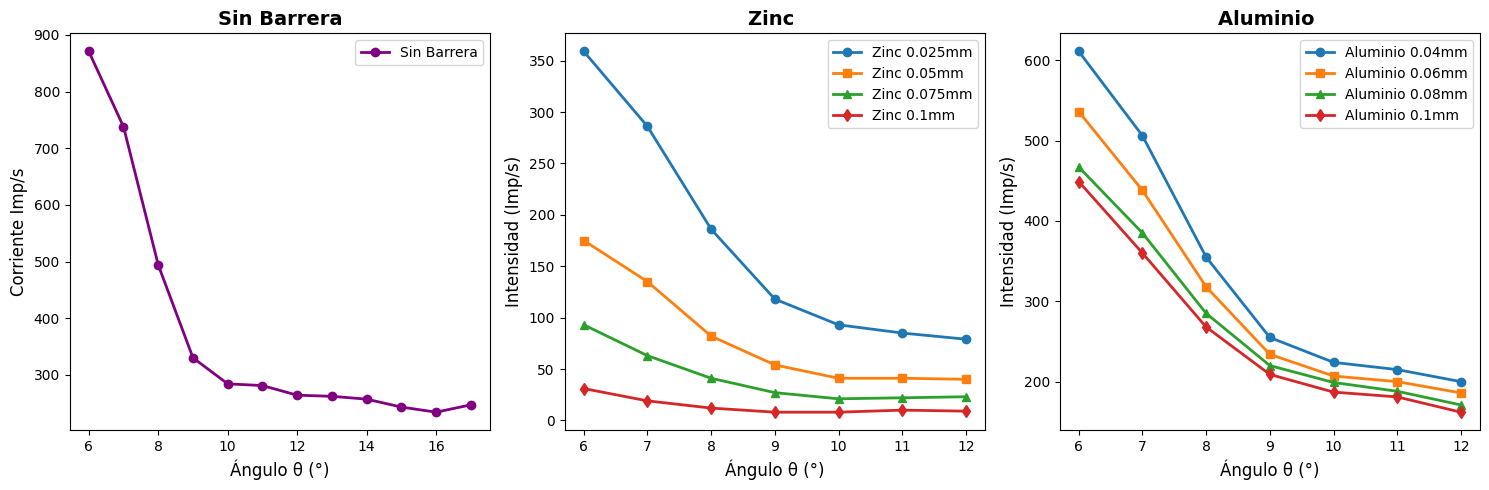

In [ ]:
import matplotlib.pyplot as plt

# ========== DATOS SIN BARRERA ==========
sin_barrera_theta = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
sin_barrera_tasa = [871, 738, 494, 330, 284, 281, 264, 262, 257, 243, 234, 247]

# ========== DATOS ZINC ==========
zinc_theta = [6, 7, 8, 9, 10, 11, 12]

zinc_025mm = [359, 286, 186, 118, 93, 85, 79]
zinc_05mm = [175, 135, 82, 54, 41, 41, 40]
zinc_075mm = [93, 63, 41, 27, 21, 22, 23]
zinc_1mm = [31, 19, 12, 8, 8, 10, 9]

# ========== DATOS ALUMINIO ==========
aluminio_theta = [6, 7, 8, 9, 10, 11, 12]

aluminio_04mm = [611, 506, 355, 255, 224, 215, 200]
aluminio_06mm = [536, 438, 318, 234, 207, 200, 186]
aluminio_08mm = [467, 385, 285, 220, 199, 188, 171]
aluminio_1mm = [449, 360, 268, 209, 187, 181, 162]

# ========== CREAR LAS GRÁFICAS ==========

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# ---------- GRÁFICA 1: SIN BARRERA ----------
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
plt.plot(sin_barrera_theta, sin_barrera_tasa, marker='o', linewidth=2,
         color='purple', label='Sin Barrera', markersize=6)
plt.xlabel('Ángulo θ (°)', fontsize=12)
plt.ylabel('Corriente Imp/s', fontsize=12)
plt.title('Sin Barrera', fontsize=14, fontweight='bold')
plt.grid(False)
plt.legend()

# ---------- GRÁFICA 2: ZINC ----------
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
plt.plot(zinc_theta, zinc_025mm, marker='o', linewidth=2, label='Zinc 0.025mm')
plt.plot(zinc_theta, zinc_05mm, marker='s', linewidth=2, label='Zinc 0.05mm')
plt.plot(zinc_theta, zinc_075mm, marker='^', linewidth=2, label='Zinc 0.075mm')
plt.plot(zinc_theta, zinc_1mm, marker='d', linewidth=2, label='Zinc 0.1mm')
plt.xlabel('Ángulo θ (°)', fontsize=12)
plt.ylabel('Intensidad (Imp/s)', fontsize=12)
plt.title('Zinc ', fontsize=14, fontweight='bold')
plt.grid(False)
plt.legend()

# ---------- GRÁFICA 3: ALUMINIO ----------
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
plt.plot(aluminio_theta, aluminio_04mm, marker='o', linewidth=2, label='Aluminio 0.04mm')
plt.plot(aluminio_theta, aluminio_06mm, marker='s', linewidth=2, label='Aluminio 0.06mm')
plt.plot(aluminio_theta, aluminio_08mm, marker='^', linewidth=2, label='Aluminio 0.08mm')
plt.plot(aluminio_theta, aluminio_1mm, marker='d', linewidth=2, label='Aluminio 0.1mm')
plt.xlabel('Ángulo θ (°)', fontsize=12)
plt.ylabel('Intensidad (Imp/s)', fontsize=12)
plt.title('Aluminio ', fontsize=14, fontweight='bold')
plt.grid(False)
plt.legend()

# Ajustar el espaciado entre gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

In [ ]:
def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d
    y genera una sola figura con todos los ajustes y otra con todos los residuales.
    """
    mu_vals, mu_errs = [], []
    n_angles = len(I0)

    # --- Figura con todos los ajustes ---
    plt.figure(figsize=(8,6))
    for j in range(n_angles):
        I_col = material_data[:, j]
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu_vals.append(-slope)
        mu_errs.append(stderr)

        plt.scatter(d_values, lnI, label=f"θ={theta[j]}°", s=40)
        plt.plot(d_values, slope*d_values + intercept, '--')

    plt.title(f"{material}: ln(I/I₀) vs d (todas las regresiones)")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("ln(I/I₀)")
    plt.legend(ncols=3, fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Figura con todos los residuales ---
    plt.figure(figsize=(8,4))
    for j in range(n_angles):
        I_col = material_data[:, j]
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, _, _, _ = linregress(d_values, lnI)
        residuales = lnI - (slope*d_values + intercept)
        plt.scatter(d_values, residuales, label=f"θ={theta[j]}°")

    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"{material}: Residuales de los ajustes lineales")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("Residual")
    plt.legend(ncols=3, fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)


In [ ]:
def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d.
    Genera una única figura por material con todos los ajustes y residuales.
    """
    mu_vals, mu_errs = [], []
    colores = plt.cm.plasma(np.linspace(0, 1, len(I0)))  # paleta distinta por ángulo

    # --- Preparar figura combinada ---
    fig, axs = plt.subplots(2, 1, figsize=(7,7), sharex=True,
                            gridspec_kw={'height_ratios':[2,1]})
    fig.suptitle(f"{material}: Ajustes ln(I/I₀) vs d y residuales", fontsize=13)

    # Ejes principales y de residuales
    ax_main, ax_res = axs

    for j in range(len(I0)):
        I_col = material_data[:, j]
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu_vals.append(-slope)
        mu_errs.append(stderr)

        # Ajuste lineal y residuales
        fit_line = slope * d_values + intercept
        residuales = lnI - fit_line

        # --- Gráfica del ajuste ---
        ax_main.scatter(d_values, lnI, color=colores[j], label=f"θ={theta[j]}°")
        ax_main.plot(d_values, fit_line, '--', color=colores[j])

        # --- Gráfica de residuales ---
        ax_res.scatter(d_values, residuales, color=colores[j])

    # --- Personalización del panel superior ---
    ax_main.set_ylabel("ln(I/I₀)")
    ax_main.legend(title="Ángulos", ncol=3, fontsize=9)
    ax_main.grid(False)

    # --- Panel de residuales ---
    ax_res.axhline(0, color='gray', linestyle='--')
    ax_res.set_xlabel("Espesor d (mm)")
    ax_res.set_ylabel("Residual")
    ax_res.grid(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)


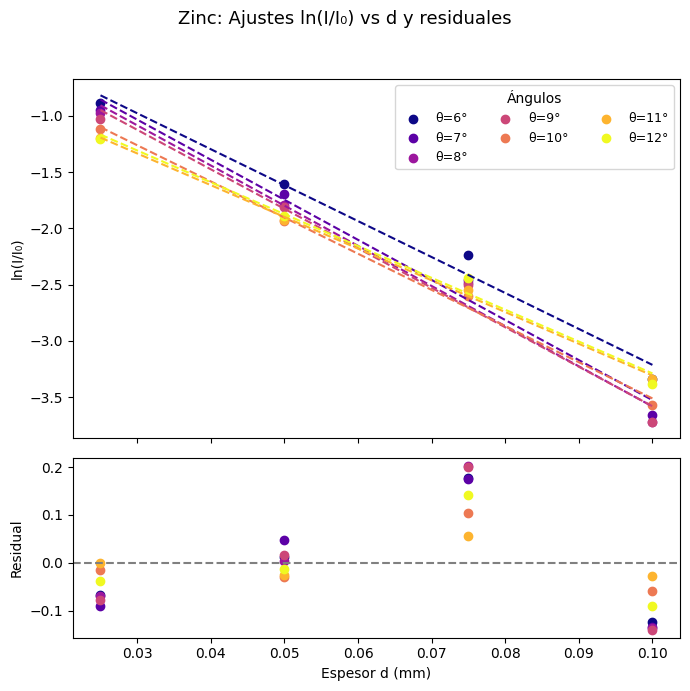

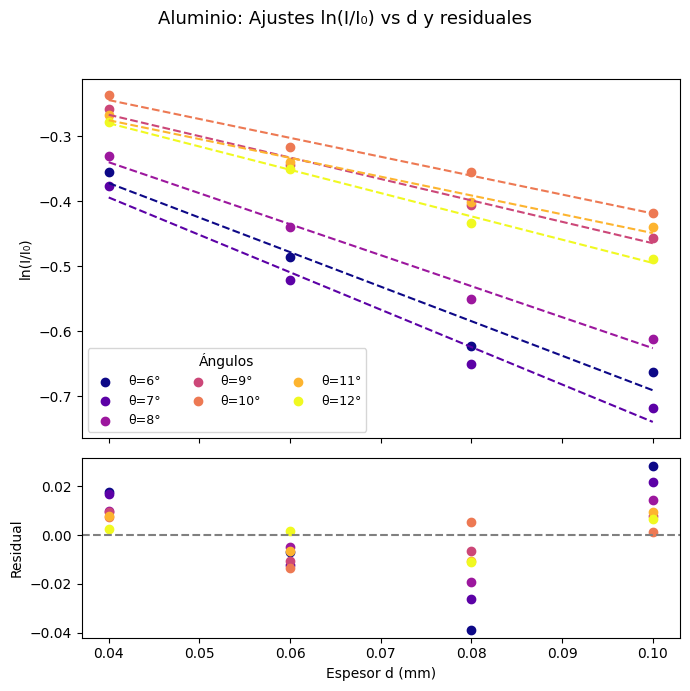

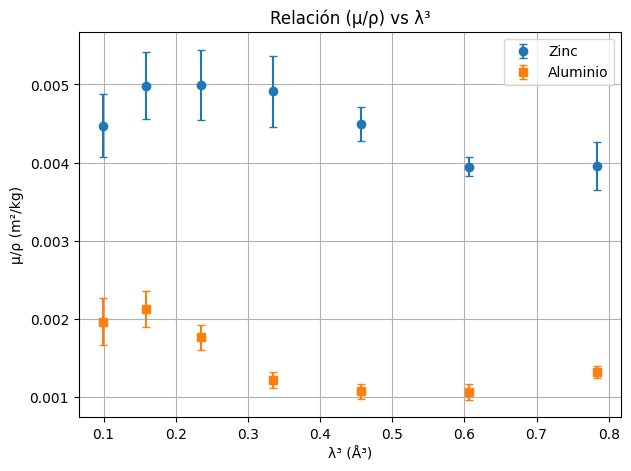

    Ángulo (°)  Material   μ (1/mm)   Error μ
0            6      Zinc  31.920768  2.867542
1            7      Zinc  35.587194  3.077873
2            8      Zinc  35.662669  3.195577
3            9      Zinc  35.067506  3.248506
4           10      Zinc  32.114094  1.563540
5           11      Zinc  28.170912  0.857311
6           12      Zinc  28.280220  2.180390
7            6  Aluminio   5.310136  0.814717
8            7  Aluminio   5.751367  0.631905
9            8  Aluminio   4.764773  0.419135
10           9  Aluminio   3.292407  0.278267
11          10  Aluminio   2.905131  0.256914
12          11  Aluminio   2.891492  0.275915
13          12  Aluminio   3.581231  0.207259

Archivo 'coeficientes_atenuacion.csv' generado con éxito.


In [ ]:
# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³
# ======================================================
rho_Zn, rho_Al = 7138, 2698  # densidades en kg/m³
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho_Zn, yerr=μ_err_Zn/rho_Zn, fmt='o', label='Zinc', capsize=3)
plt.errorbar(lambda_cub, mu_rho_Al, yerr=μ_err_Al/rho_Al, fmt='s', label='Aluminio', capsize=3)
plt.xlabel("λ³ (Å³)")
plt.ylabel("μ/ρ (m²/kg)")
plt.title("Relación (μ/ρ) vs λ³")
plt.legend()
plt.grid(True)
plt.show()

# ======================================================
# 6. Exportar resultados a CSV
# ======================================================
resultados = pd.DataFrame({
    'Ángulo (°)': np.concatenate([theta, theta]),
    'Material': ['Zinc']*len(μ_Zn) + ['Aluminio']*len(μ_Al),
    'μ (1/mm)': np.concatenate([μ_Zn, μ_Al]),
    'Error μ': np.concatenate([μ_err_Zn, μ_err_Al])
})
resultados.to_csv('coeficientes_atenuacion.csv', index=False)
print(resultados)
print("\nArchivo 'coeficientes_atenuacion.csv' generado con éxito.")


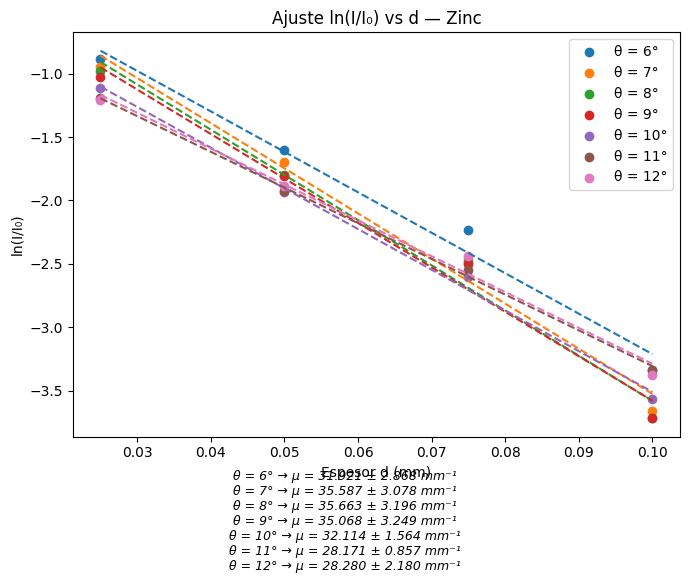

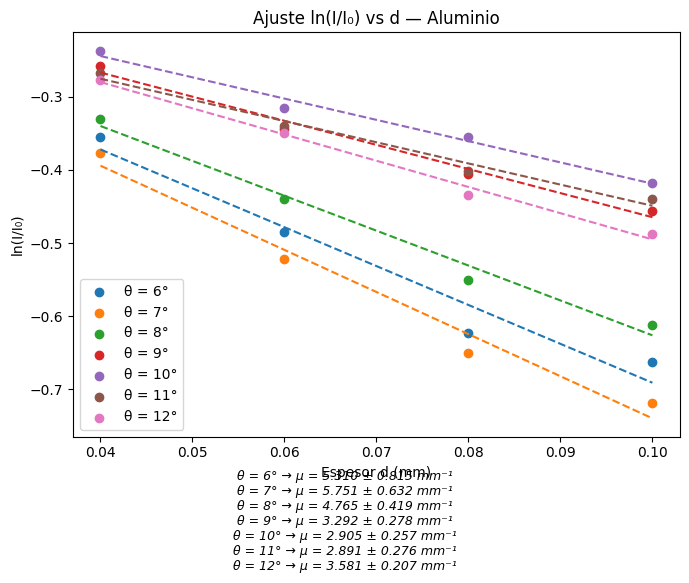

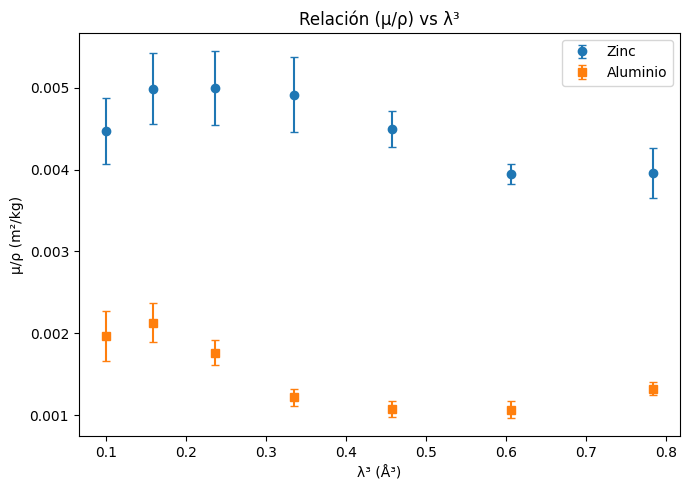

    Ángulo (°)  Material   μ (1/mm)   Error μ
0            6      Zinc  31.920768  2.867542
1            7      Zinc  35.587194  3.077873
2            8      Zinc  35.662669  3.195577
3            9      Zinc  35.067506  3.248506
4           10      Zinc  32.114094  1.563540
5           11      Zinc  28.170912  0.857311
6           12      Zinc  28.280220  2.180390
7            6  Aluminio   5.310136  0.814717
8            7  Aluminio   5.751367  0.631905
9            8  Aluminio   4.764773  0.419135
10           9  Aluminio   3.292407  0.278267
11          10  Aluminio   2.905131  0.256914
12          11  Aluminio   2.891492  0.275915
13          12  Aluminio   3.581231  0.207259

Archivo 'coeficientes_atenuacion.csv' generado con éxito.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos experimentales
# ======================================================
theta = np.array([6,7,8,9,10,11,12])  # grados
I0 = np.array([871,738,494,330,284,281,264])  # sin barrera

# Zinc
Zn_025 = np.array([359,286,186,118,93,85,79])
Zn_05  = np.array([175,135,82,54,41,41,40])
Zn_075 = np.array([93,63,41,27,21,22,23])
Zn_1   = np.array([31,19,12,8,8,10,9])

# Aluminio
Al_04  = np.array([611,506,355,255,224,215,200])
Al_06  = np.array([536,438,318,234,207,200,186])
Al_08  = np.array([467,385,285,220,199,188,171])
Al_1   = np.array([449,360,268,209,187,181,162])

# Espesores (mm)
d_Zn = np.array([0.025,0.05,0.075,0.1])
d_Al = np.array([0.04,0.06,0.08,0.1])

Zn_data = np.array([Zn_025,Zn_05,Zn_075,Zn_1])
Al_data = np.array([Al_04,Al_06,Al_08,Al_1])

# ======================================================
# 2. Corrección angular y cálculo de longitud de onda
# ======================================================
corr_factor = 22.6 / 20.5  # corrección por desplazamiento del pico
theta_corr = theta * corr_factor
d_cristal = 2.014  # Å
lambda_ang = 2 * d_cristal * np.sin(np.radians(theta_corr))  # Ley de Bragg (n=1)
lambda_cub = lambda_ang**3

# ======================================================
# 3. Funciones auxiliares
# ======================================================
def ln_intensidad(I, I0):
    return np.log(I / I0)

def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d.
    Muestra el valor de μ y su incertidumbre (stderr) en el caption del gráfico.
    """
    mu_vals, mu_errs = [], []

    plt.figure(figsize=(7,5))
    textos = []  # Para guardar los textos con los valores de μ

    for j in range(len(I0)):  # por cada ángulo
        I_col = material_data[:, j]  # intensidades a ese ángulo para varios espesores
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu = -slope  # pendiente negativa
        mu_vals.append(mu)
        mu_errs.append(stderr)

        # Graficar puntos y ajuste
        plt.scatter(d_values, lnI, label=f"θ = {theta[j]}°")
        plt.plot(d_values, slope*d_values + intercept, '--')

        # Guardar texto con valor de μ y su error
        textos.append(f"θ = {theta[j]}° → μ = {mu:.3f} ± {stderr:.3f} mm⁻¹")

    # Configuración del gráfico
    plt.title(f"Ajuste ln(I/I₀) vs d — {material}")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("ln(I/I₀)")
    plt.legend()
    plt.grid(False)

    # Añadir caption con los valores de μ
    caption = "\n".join(textos)
    plt.figtext(0.5, -0.15, caption, ha='center', fontsize=9, style='italic')

    plt.tight_layout()
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)

# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³
# ======================================================
rho_Zn, rho_Al = 7138, 2698  # densidades en kg/m³
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho_Zn, yerr=μ_err_Zn/rho_Zn, fmt='o', label='Zinc', capsize=3)
plt.errorbar(lambda_cub, mu_rho_Al, yerr=μ_err_Al/rho_Al, fmt='s', label='Aluminio', capsize=3)
plt.xlabel("λ³ (Å³)")
plt.ylabel("μ/ρ (m²/kg)")
plt.title("Relación (μ/ρ) vs λ³")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# ======================================================
# 6. Exportar resultados a CSV
# ======================================================
resultados = pd.DataFrame({
    'Ángulo (°)': np.concatenate([theta, theta]),
    'Material': ['Zinc']*len(μ_Zn) + ['Aluminio']*len(μ_Al),
    'μ (1/mm)': np.concatenate([μ_Zn, μ_Al]),
    'Error μ': np.concatenate([μ_err_Zn, μ_err_Al])
})
resultados.to_csv('coeficientes_atenuacion.csv', index=False)
print(resultados)
print("\nArchivo 'coeficientes_atenuacion.csv' generado con éxito.")


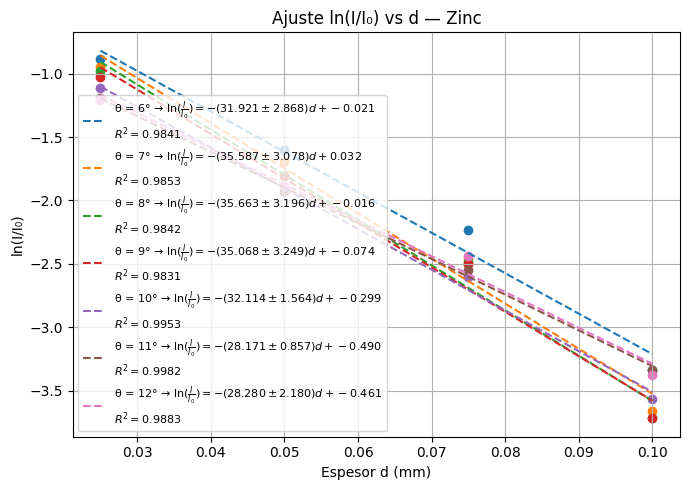

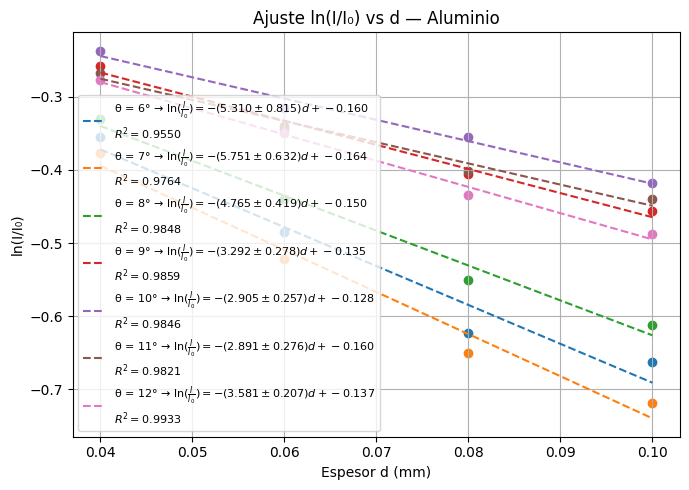

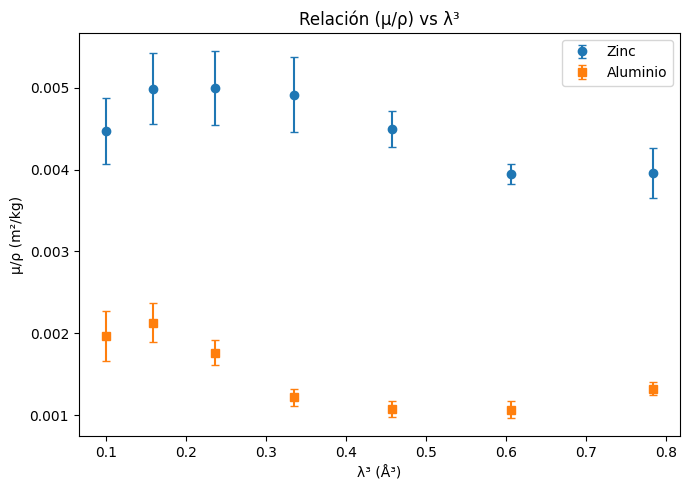

    Ángulo (°)  Material   μ (1/mm)   Error μ
0            6      Zinc  31.920768  2.867542
1            7      Zinc  35.587194  3.077873
2            8      Zinc  35.662669  3.195577
3            9      Zinc  35.067506  3.248506
4           10      Zinc  32.114094  1.563540
5           11      Zinc  28.170912  0.857311
6           12      Zinc  28.280220  2.180390
7            6  Aluminio   5.310136  0.814717
8            7  Aluminio   5.751367  0.631905
9            8  Aluminio   4.764773  0.419135
10           9  Aluminio   3.292407  0.278267
11          10  Aluminio   2.905131  0.256914
12          11  Aluminio   2.891492  0.275915
13          12  Aluminio   3.581231  0.207259

Archivo 'coeficientes_atenuacion.csv' generado con éxito.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos experimentales
# ======================================================
theta = np.array([6,7,8,9,10,11,12])  # grados
I0 = np.array([871,738,494,330,284,281,264])  # sin barrera

# Zinc
Zn_025 = np.array([359,286,186,118,93,85,79])
Zn_05  = np.array([175,135,82,54,41,41,40])
Zn_075 = np.array([93,63,41,27,21,22,23])
Zn_1   = np.array([31,19,12,8,8,10,9])

# Aluminio
Al_04  = np.array([611,506,355,255,224,215,200])
Al_06  = np.array([536,438,318,234,207,200,186])
Al_08  = np.array([467,385,285,220,199,188,171])
Al_1   = np.array([449,360,268,209,187,181,162])

# Espesores (mm)
d_Zn = np.array([0.025,0.05,0.075,0.1])
d_Al = np.array([0.04,0.06,0.08,0.1])

Zn_data = np.array([Zn_025,Zn_05,Zn_075,Zn_1])
Al_data = np.array([Al_04,Al_06,Al_08,Al_1])

# ======================================================
# 2. Corrección angular y cálculo de longitud de onda
# ======================================================
corr_factor = 22.6 / 20.5  # corrección por desplazamiento del pico
theta_corr = theta * corr_factor
d_cristal = 2.014  # Å
lambda_ang = 2 * d_cristal * np.sin(np.radians(theta_corr))  # Ley de Bragg (n=1)
lambda_cub = lambda_ang**3

# ======================================================
# 3. Funciones auxiliares
# ======================================================
def ln_intensidad(I, I0):
    return np.log(I / I0)

def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d.
    Muestra la ecuación del ajuste con μ ± Δμ y R² en la leyenda.
    """
    mu_vals, mu_errs = [], []

    plt.figure(figsize=(7,5))

    for j in range(len(I0)):  # por cada ángulo
        I_col = material_data[:, j]
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu = -slope
        mu_vals.append(mu)
        mu_errs.append(stderr)

        # Calcular R²
        R2 = r**2

        # Ecuación para la leyenda (compatible con matplotlib)
        eq_label = (f"θ = {theta[j]}° → "
                    fr"$\ln(\frac{{I}}{{I_0}}) = -({mu:.3f} \pm {stderr:.3f})d + {intercept:.3f}$"
                    f"\n$R^2 = {R2:.4f}$")

        # Graficar puntos y ajuste
        plt.scatter(d_values, lnI)
        plt.plot(d_values, slope*d_values + intercept, '--', label=eq_label)

    plt.title(f"Ajuste ln(I/I₀) vs d — {material}")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("ln(I/I₀)")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)

# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³
# ======================================================
rho_Zn, rho_Al = 7138, 2698  # densidades en kg/m³
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho_Zn, yerr=μ_err_Zn/rho_Zn, fmt='o', label='Zinc', capsize=3)
plt.errorbar(lambda_cub, mu_rho_Al, yerr=μ_err_Al/rho_Al, fmt='s', label='Aluminio', capsize=3)
plt.xlabel("λ³ (Å³)")
plt.ylabel("μ/ρ (m²/kg)")
plt.title("Relación (μ/ρ) vs λ³")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# ======================================================
# 6. Exportar resultados a CSV
# ======================================================
resultados = pd.DataFrame({
    'Ángulo (°)': np.concatenate([theta, theta]),
    'Material': ['Zinc']*len(μ_Zn) + ['Aluminio']*len(μ_Al),
    'μ (1/mm)': np.concatenate([μ_Zn, μ_Al]),
    'Error μ': np.concatenate([μ_err_Zn, μ_err_Al])
})
resultados.to_csv('coeficientes_atenuacion.csv', index=False)
print(resultados)
print("\nArchivo 'coeficientes_atenuacion.csv' generado con éxito.")


/tmp/ipython-input-2513052751.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


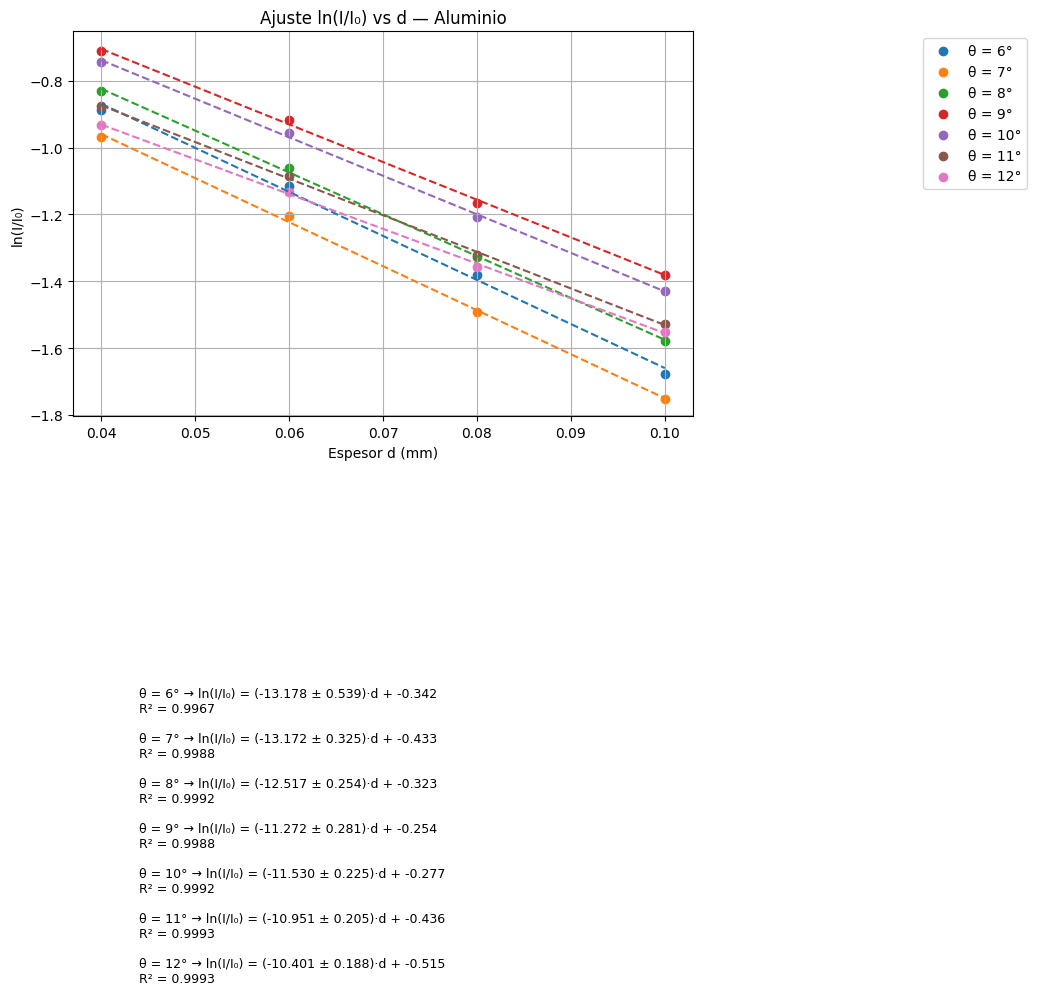

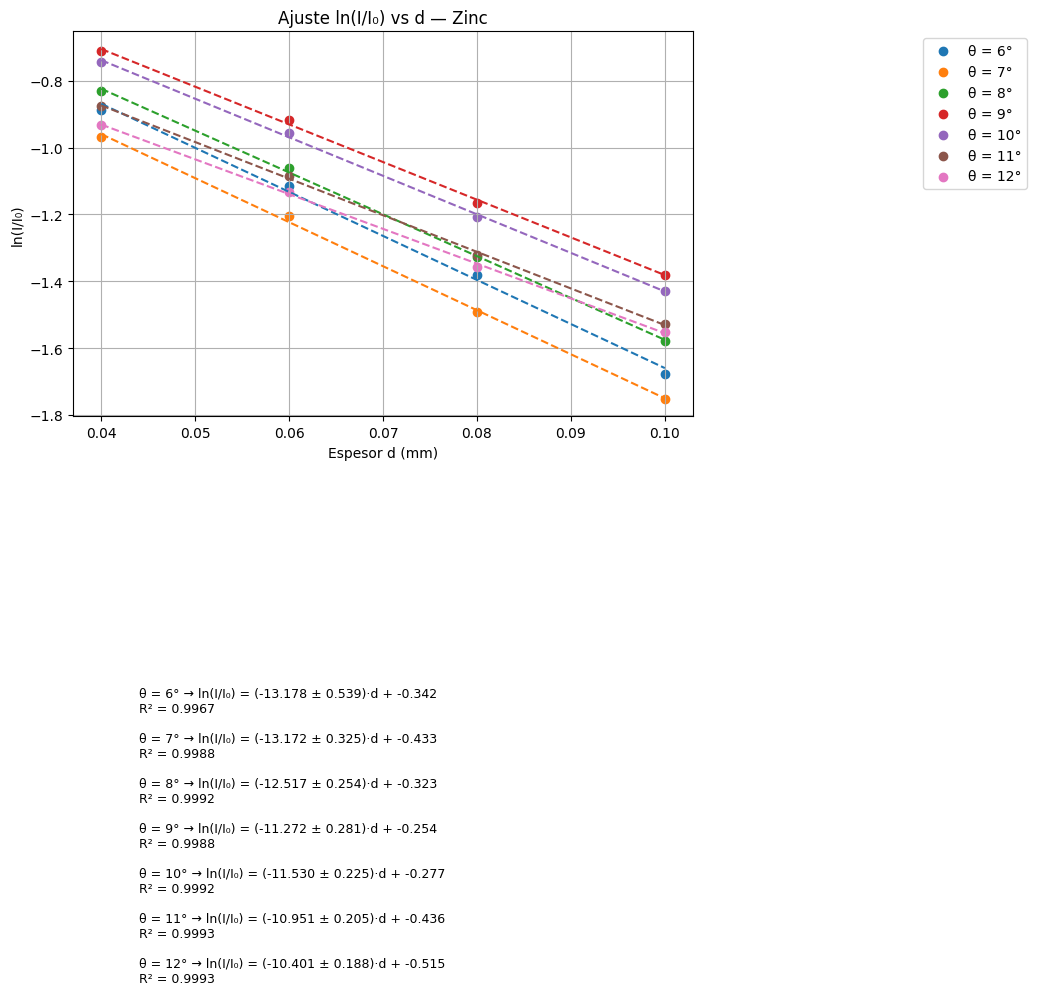

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos de ejemplo (puedes reemplazar con los tuyos)
# ======================================================
theta = np.array([6,7,8,9,10,11,12])
d_values = np.array([0.04,0.06,0.08,0.10])
I0 = np.array([871,738,494,330,284,281,264])
Al_data = np.array([
    [359,286,219,163],
    [280,221,166,128],
    [215,171,131,102],
    [162,132,103,83],
    [135,109,85,68],
    [117,95,75,61],
    [104,85,68,56]
])

# ======================================================
# 2. Función para el ajuste con ecuaciones completas
# ======================================================
def ajuste_mu(material_data, d_values, I0, material):
    plt.figure(figsize=(8,5))
    ecuaciones = []  # guardará las ecuaciones para mostrarlas fuera del gráfico

    for j in range(len(I0)):
        I_col = material_data[j, :]
        lnI = np.log(I_col / I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)

        plt.scatter(d_values, lnI, label=f"θ = {theta[j]}°")
        plt.plot(d_values, slope*d_values + intercept, '--')

        # Ecuación con incertidumbre
        ecuacion = (f"θ = {theta[j]}° → ln(I/I₀) = ({slope:.3f} ± {stderr:.3f})·d "
                    f"+ {intercept:.3f}\nR² = {r**2:.4f}")
        ecuaciones.append(ecuacion)

    plt.title(f"Ajuste ln(I/I₀) vs d — {material}")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("ln(I/I₀)")
    plt.grid(True)

    # Muestra las ecuaciones fuera del área de los datos
    plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))
    plt.text(1.07*d_values.max(), plt.ylim()[1]-0.05,
             "\n\n".join(ecuaciones),
             fontsize=9, va='top', ha='left', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

# ======================================================
# 3. Llamar a la función
# ======================================================
ajuste_mu(Al_data, d_values, I0, "Aluminio")
ajuste_mu(Al_data, d_values, I0, "Zinc")


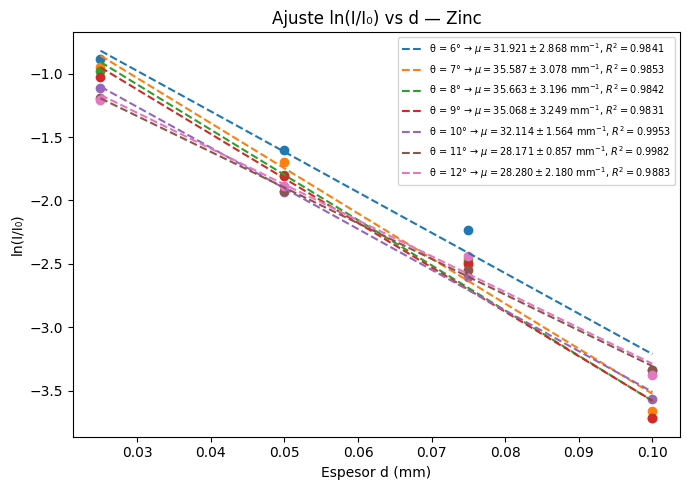

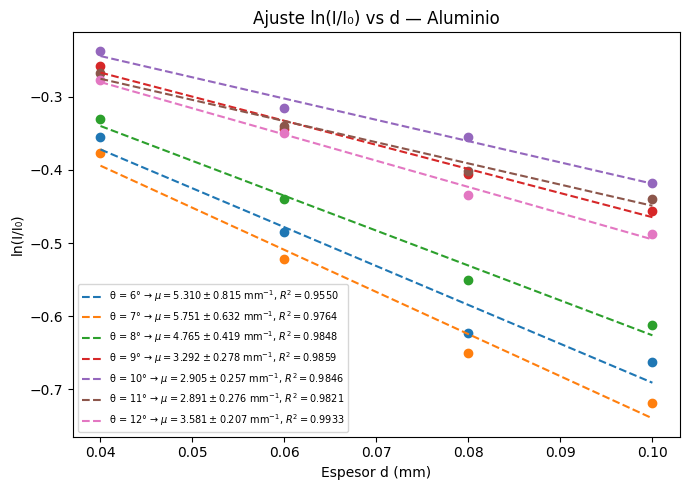

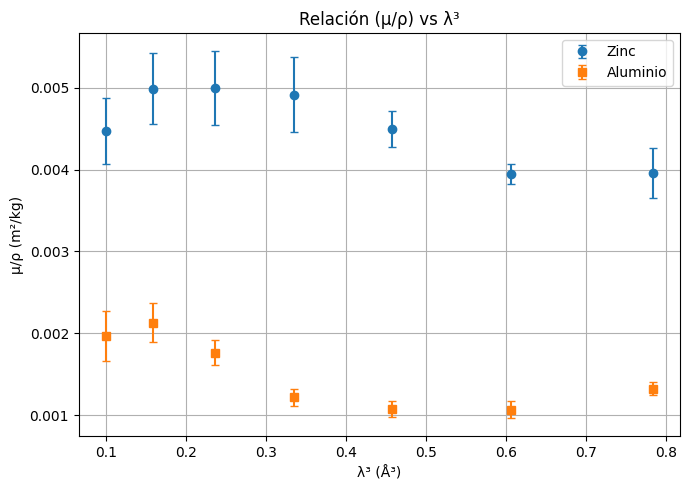

    Ángulo (°)  Material   μ (1/mm)   Error μ
0            6      Zinc  31.920768  2.867542
1            7      Zinc  35.587194  3.077873
2            8      Zinc  35.662669  3.195577
3            9      Zinc  35.067506  3.248506
4           10      Zinc  32.114094  1.563540
5           11      Zinc  28.170912  0.857311
6           12      Zinc  28.280220  2.180390
7            6  Aluminio   5.310136  0.814717
8            7  Aluminio   5.751367  0.631905
9            8  Aluminio   4.764773  0.419135
10           9  Aluminio   3.292407  0.278267
11          10  Aluminio   2.905131  0.256914
12          11  Aluminio   2.891492  0.275915
13          12  Aluminio   3.581231  0.207259

Archivo 'coeficientes_atenuacion.csv' generado con éxito.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ======================================================
# 1. Datos experimentales
# ======================================================
theta = np.array([6,7,8,9,10,11,12])  # grados
I0 = np.array([871,738,494,330,284,281,264])  # sin barrera

# Zinc
Zn_025 = np.array([359,286,186,118,93,85,79])
Zn_05  = np.array([175,135,82,54,41,41,40])
Zn_075 = np.array([93,63,41,27,21,22,23])
Zn_1   = np.array([31,19,12,8,8,10,9])

# Aluminio
Al_04  = np.array([611,506,355,255,224,215,200])
Al_06  = np.array([536,438,318,234,207,200,186])
Al_08  = np.array([467,385,285,220,199,188,171])
Al_1   = np.array([449,360,268,209,187,181,162])

# Espesores (mm)
d_Zn = np.array([0.025,0.05,0.075,0.1])
d_Al = np.array([0.04,0.06,0.08,0.1])

Zn_data = np.array([Zn_025,Zn_05,Zn_075,Zn_1])
Al_data = np.array([Al_04,Al_06,Al_08,Al_1])

# ======================================================
# 2. Corrección angular y cálculo de longitud de onda
# ======================================================
corr_factor = 22.6 / 20.5  # corrección por desplazamiento del pico
theta_corr = theta * corr_factor
d_cristal = 2.014  # Å
lambda_ang = 2 * d_cristal * np.sin(np.radians(theta_corr))  # Ley de Bragg (n=1)
lambda_cub = lambda_ang**3

# ======================================================
# 3. Funciones auxiliares
# ======================================================
def ln_intensidad(I, I0):
    return np.log(I / I0)

def ajuste_mu(material_data, d_values, I0, material):
    """
    Calcula μ para cada ángulo ajustando ln(I/I0) vs d.
    Muestra μ ± Δμ y R² en la leyenda (en tamaño pequeño).
    """
    mu_vals, mu_errs = [], []

    plt.figure(figsize=(7,5))

    for j in range(len(I0)):  # por cada ángulo
        I_col = material_data[:, j]
        lnI = ln_intensidad(I_col, I0[j])
        slope, intercept, r, p, stderr = linregress(d_values, lnI)
        mu = -slope
        mu_vals.append(mu)
        mu_errs.append(stderr)
        R2 = r**2

        # Etiqueta compacta y legible
        eq_label = (f"θ = {theta[j]}° → "
                    fr"$\mu = {mu:.3f} \pm {stderr:.3f}$ mm$^{{-1}}$, "
                    fr"$R^2 = {R2:.4f}$")

        plt.scatter(d_values, lnI)
        plt.plot(d_values, slope*d_values + intercept, '--', label=eq_label)

    plt.title(f"Ajuste ln(I/I₀) vs d — {material}")
    plt.xlabel("Espesor d (mm)")
    plt.ylabel("ln(I/I₀)")
    plt.legend(fontsize=7, loc='best', frameon=True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return np.array(mu_vals), np.array(mu_errs)

# ======================================================
# 4. Cálculo de μ para Zn y Al
# ======================================================
μ_Zn, μ_err_Zn = ajuste_mu(Zn_data, d_Zn, I0, "Zinc")
μ_Al, μ_err_Al = ajuste_mu(Al_data, d_Al, I0, "Aluminio")

# ======================================================
# 5. Gráfica (μ/ρ) vs λ³
# ======================================================
rho_Zn, rho_Al = 7138, 2698  # densidades en kg/m³
mu_rho_Zn = μ_Zn / rho_Zn
mu_rho_Al = μ_Al / rho_Al

plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho_Zn, yerr=μ_err_Zn/rho_Zn, fmt='o', label='Zinc', capsize=3)
plt.errorbar(lambda_cub, mu_rho_Al, yerr=μ_err_Al/rho_Al, fmt='s', label='Aluminio', capsize=3)
plt.xlabel("λ³ (Å³)")
plt.ylabel("μ/ρ (m²/kg)")
plt.title("Relación (μ/ρ) vs λ³")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ======================================================
# 6. Exportar resultados a CSV
# ======================================================
resultados = pd.DataFrame({
    'Ángulo (°)': np.concatenate([theta, theta]),
    'Material': ['Zinc']*len(μ_Zn) + ['Aluminio']*len(μ_Al),
    'μ (1/mm)': np.concatenate([μ_Zn, μ_Al]),
    'Error μ': np.concatenate([μ_err_Zn, μ_err_Al])
})
resultados.to_csv('coeficientes_atenuacion.csv', index=False)
print(resultados)
print("\nArchivo 'coeficientes_atenuacion.csv' generado con éxito.")


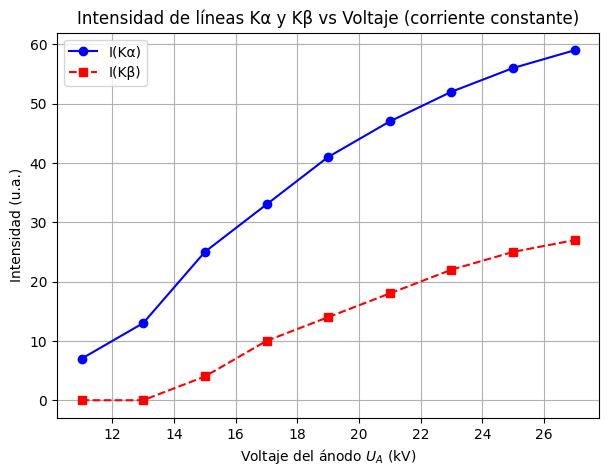

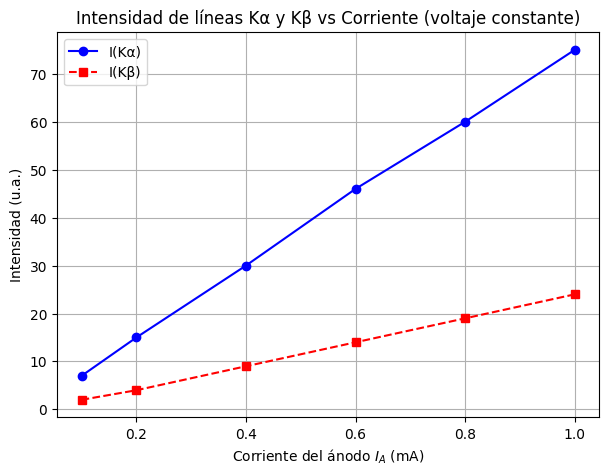

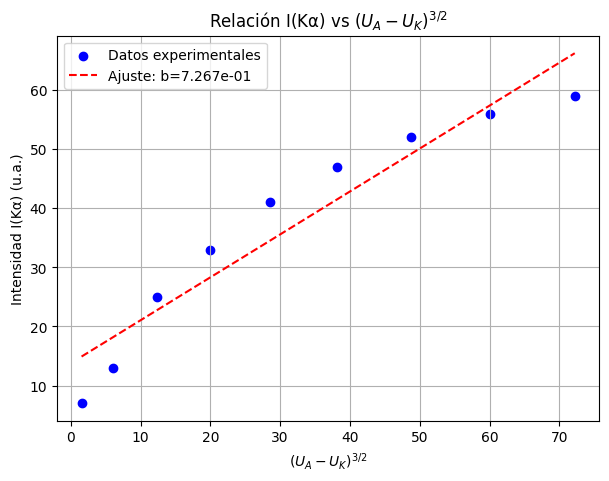

Constante b (Kα): 7.267e-01 ± 8.601e-02
Coeficiente de correlación r = 0.9543


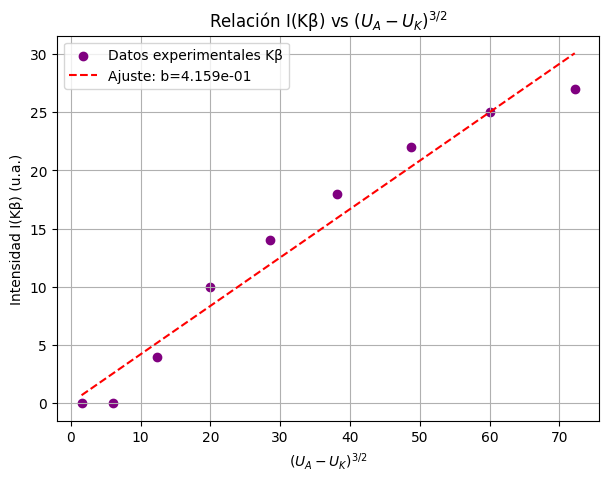

Constante b (Kβ): 4.159e-01 ± 3.081e-02
Coeficiente de correlación r = 0.9813


In [ ]:
# ======================================================
#  ANÁLISIS DE INTENSIDADES Kα Y Kβ (Actividad 3)
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ------------------------------------------------------
# PARTE A: Corriente constante, variando el voltaje
# ------------------------------------------------------

# Datos experimentales (corriente fija de 1 mA)
voltaje_kV = np.array([11, 13, 15, 17, 19, 21, 23, 25, 27])
I_Ka = np.array([7, 13, 25, 33, 41, 47, 52, 56, 59])  # Intensidad Kα
I_Kb = np.array([0, 0, 4, 10, 14, 18, 22, 25, 27])   # Intensidad Kβ

# --- Gráfica I(Kα) y I(Kβ) vs voltaje ---
plt.figure(figsize=(7,5))
plt.plot(voltaje_kV, I_Ka, 'o-', label='I(Kα)', color='blue')
plt.plot(voltaje_kV, I_Kb, 's--', label='I(Kβ)', color='red')
plt.xlabel("Voltaje del ánodo $U_A$ (kV)")
plt.ylabel("Intensidad (u.a.)")
plt.title("Intensidad de líneas Kα y Kβ vs Voltaje (corriente constante)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------
# PARTE B: Voltaje constante, variando la corriente
# ------------------------------------------------------

corriente_mA = np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
I_Ka_corr = np.array([7, 15, 30, 46, 60, 75])
I_Kb_corr = np.array([2, 4, 9, 14, 19, 24])

# --- Gráfica I(Kα) y I(Kβ) vs corriente ---
plt.figure(figsize=(7,5))
plt.plot(corriente_mA, I_Ka_corr, 'o-', label='I(Kα)', color='blue')
plt.plot(corriente_mA, I_Kb_corr, 's--', label='I(Kβ)', color='red')
plt.xlabel("Corriente del ánodo $I_A$ (mA)")
plt.ylabel("Intensidad (u.a.)")
plt.title("Intensidad de líneas Kα y Kβ vs Corriente (voltaje constante)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------
# PARTE C: Relación I(Kα) vs (U_A - U_K)^(3/2)
# ------------------------------------------------------

U_K = 9.66  # Voltaje umbral aproximado del Zn (en kV)
x = (voltaje_kV - U_K) ** 1.5
y = I_Ka

# Ajuste lineal
slope, intercept, r, p, stderr = linregress(x, y)

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', label="Datos experimentales")
plt.plot(x, slope*x + intercept, 'r--', label=f"Ajuste: b={slope:.3e}")
plt.xlabel("$(U_A - U_K)^{3/2}$")
plt.ylabel("Intensidad I(Kα) (u.a.)")
plt.title("Relación I(Kα) vs $(U_A - U_K)^{3/2}$")
plt.legend()
plt.grid(True)
plt.show()

print(f"Constante b (Kα): {slope:.3e} ± {stderr:.3e}")
print(f"Coeficiente de correlación r = {r:.4f}")

# ------------------------------------------------------
# PARTE D (opcional): I(Kβ) vs (U_A - U_K)^(3/2)
# ------------------------------------------------------

y_b = I_Kb
slope_b, intercept_b, r_b, p_b, stderr_b = linregress(x, y_b)

plt.figure(figsize=(7,5))
plt.scatter(x, y_b, color='purple', label="Datos experimentales Kβ")
plt.plot(x, slope_b*x + intercept_b, 'r--', label=f"Ajuste: b={slope_b:.3e}")
plt.xlabel("$(U_A - U_K)^{3/2}$")
plt.ylabel("Intensidad I(Kβ) (u.a.)")
plt.title("Relación I(Kβ) vs $(U_A - U_K)^{3/2}$")
plt.legend()
plt.grid(True)
plt.show()

print(f"Constante b (Kβ): {slope_b:.3e} ± {stderr_b:.3e}")
print(f"Coeficiente de correlación r = {r_b:.4f}")


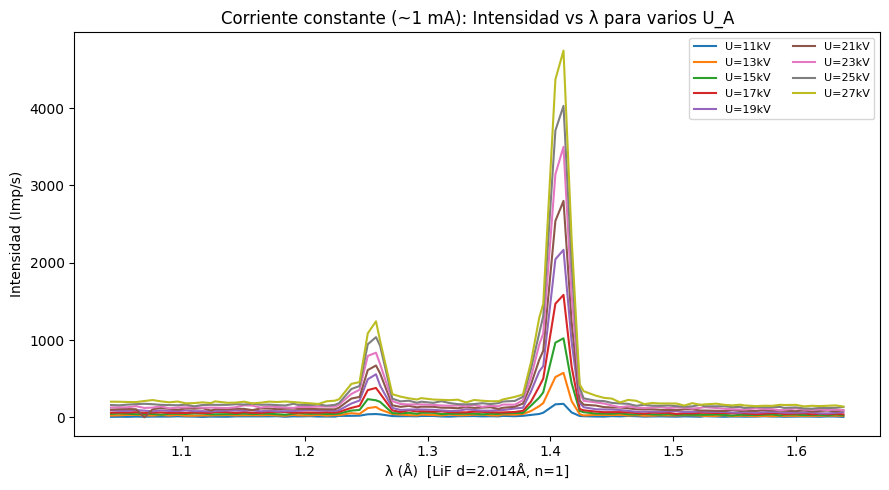

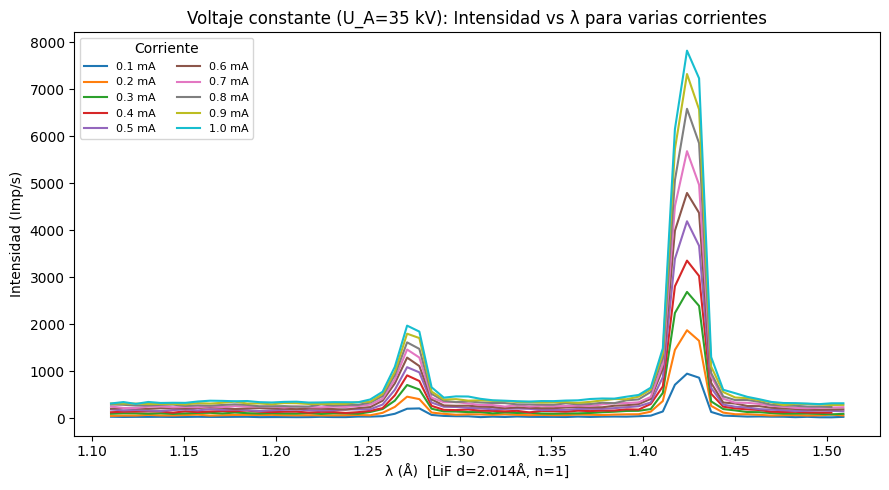

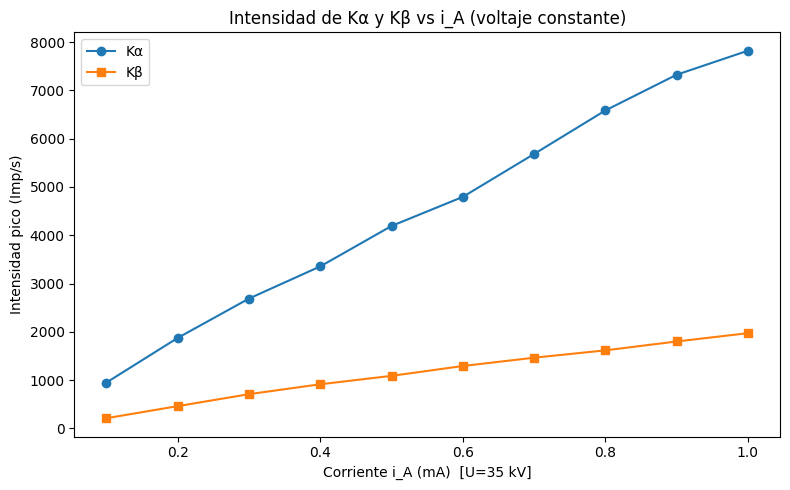

Kα: fit vs U -> R^2=0.6401; fit vs (U-Uk)^(3/2) -> R^2=0.9972
Kβ: fit vs U -> R^2=0.6463; fit vs (U-Uk)^(3/2) -> R^2=0.9893


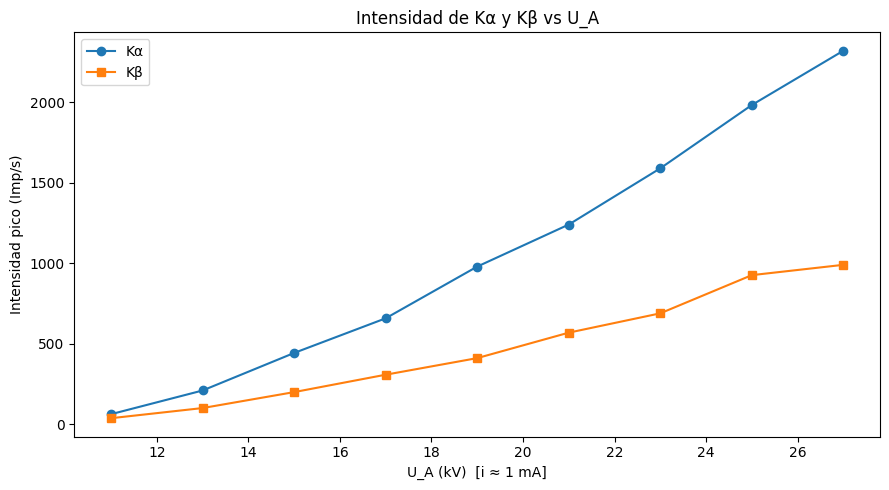

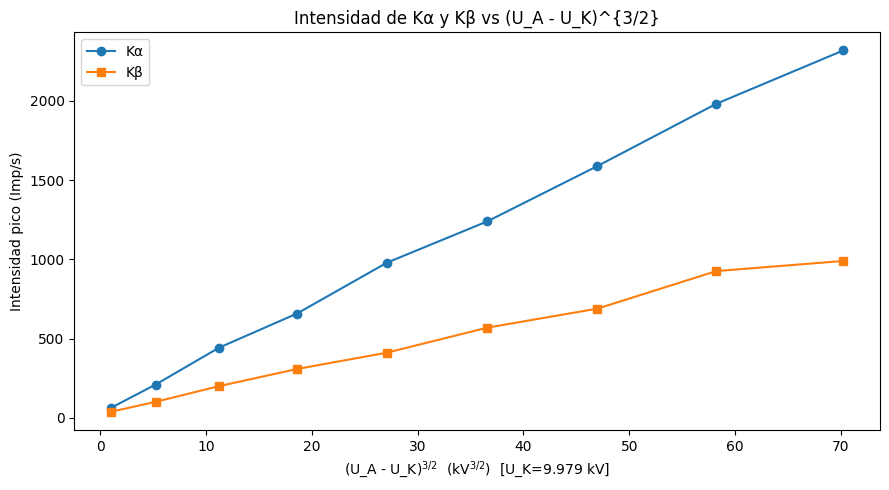

Estimación de b (usando Kα, i≈1 mA): b ≈ 33.825 (Imp/s / kV^1.5 / mA), R^2≈0.9972
Archivos: /cc_lambda_spectra.csv ; /vs_current_K_peaks.csv ; /vs_voltage_K_peaks.csv


In [ ]:
# Create analysis and plots for items 3–6 of the prompt.
# Assumptions:
# - Analyzer crystal: LiF(200), d = 2.014 Å (0.2014 nm). This matches peaks near θ≈18.4° (Kβ) and θ≈20.7° (Kα).
# - Order n = 1 in Bragg: λ = 2 d sin θ.
# - Constant-current dataset corresponds to i_A ≈ 1 mA; voltages are the column labels (11–27 kV).
# - Constant-voltage dataset (35 kV) with currents 0.1–1.0 mA was parsed earlier and saved as CSV.
import pandas as pd, numpy as np, io, matplotlib.pyplot as plt
from math import sin, radians

# ------------- Load constant-current table (from earlier message) -------------
raw_cc = """Ángulo del contad\tTasa con 11kV\tTasa con 13kV\tTasa con 15kV\tTasa con 17kV\tTasa con 19kV\tTasa con 21kV\tTasa con 23kV\tTasa con 25kV\tTasa con 27kV
2*theta/°\tR(11kV)/Imp/s\tR(13kV)/Imp/s\tR(15kV)/Imp/s\tR(17kV)/Imp/s\tR(19kV)/Imp/s\tR(21kV)/Imp/s\tR(23kV)/Imp/s\tR(25kV)/Imp/s\tR(27kV)/Imp/s
30\t6\t23\t44\t60\t91\t100\t127\t159\t202
30,2\t7\t26\t49\t62\t84\t105\t129\t155\t201
30,4\t6\t31\t46\t62\t83\t107\t130\t164\t198
30,6\t9\t31\t40\t67\t94\t104\t144\t170\t197
30,8\t7\t25\t43\t57\t86\t0\t121\t175\t211
31\t9\t23\t43\t61\t77\t104\t126\t169\t223
31,2\t9\t30\t34\t63\t90\t121\t141\t161\t206
31,4\t9\t23\t45\t57\t82\t109\t116\t158\t194
31,6\t13\t30\t46\t58\t80\t98\t127\t156\t204
31,8\t10\t21\t43\t56\t89\t116\t129\t163\t181
32\t9\t21\t49\t63\t79\t111\t131\t142\t184
32,2\t5\t24\t48\t57\t80\t118\t124\t159\t193
32,4\t9\t24\t39\t58\t75\t88\t125\t162\t184
32,5\t8\t26\t39\t69\t80\t104\t125\t161\t206
32,8\t7\t29\t41\t67\t87\t105\t120\t161\t188
33\t12\t25\t42\t56\t87\t110\t130\t169\t190
33,2\t12\t27\t47\t67\t87\t109\t155\t165\t202
33,4\t12\t27\t43\t58\t90\t93\t151\t175\t180
33,6\t12\t26\t46\t58\t78\t114\t126\t162\t189
33,8\t12\t29\t46\t68\t85\t114\t142\t164\t203
34\t14\t24\t40\t71\t78\t105\t132\t158\t198
34,2\t7\t21\t34\t69\t79\t110\t126\t153\t204
34,4\t13\t32\t47\t59\t81\t112\t121\t175\t197
34,5\t11\t26\t52\t61\t85\t109\t133\t161\t192
34,8\t14\t24\t44\t62\t94\t109\t134\t159\t181
35\t10\t31\t48\t60\t86\t105\t138\t165\t172
35,2\t10\t22\t43\t66\t89\t104\t139\t150\t207
35,4\t9\t28\t44\t61\t81\t103\t137\t161\t215
35,5\t18\t28\t48\t70\t92\t125\t162\t183\t233
35,8\t19\t53\t87\t122\t178\t242\t302\t366\t432
36\t21\t44\t95\t148\t217\t264\t356\t405\t456
36,2\t39\t119\t235\t352\t492\t611\t794\t945\t1086
36,4\t42\t133\t220\t380\t557\t670\t836\t1037\t1242
36,5\t38\t101\t200\t308\t411\t569\t689\t926\t990
36,8\t16\t43\t54\t88\t121\t155\t209\t241\t299
37\t14\t35\t51\t69\t95\t135\t172\t206\t267
37,2\t15\t28\t58\t90\t100\t148\t166\t215\t246
37,4\t13\t25\t45\t76\t101\t129\t167\t188\t230
37,5\t17\t35\t59\t79\t101\t137\t167\t202\t248
37,8\t17\t29\t58\t74\t97\t136\t160\t187\t230
38\t11\t25\t41\t76\t89\t124\t153\t208\t226
38,2\t9\t35\t46\t67\t82\t123\t149\t184\t222
38,4\t14\t26\t45\t65\t84\t117\t153\t170\t228
38,6\t15\t28\t47\t64\t103\t132\t142\t167\t192
38,8\t16\t34\t48\t73\t95\t122\t161\t171\t224
39\t12\t35\t38\t70\t86\t125\t135\t182\t214
39,2\t14\t26\t46\t66\t86\t130\t148\t171\t208
39,4\t12\t23\t43\t63\t93\t108\t143\t183\t208
39,5\t18\t36\t51\t63\t93\t123\t165\t204\t230
39,8\t14\t34\t56\t69\t114\t136\t163\t212\t264
40\t19\t43\t57\t84\t124\t178\t222\t265\t295
40,2\t31\t82\t152\t205\t337\t429\t523\t634\t718
40,4\t43\t144\t254\t398\t592\t743\t939\t1085\t1285
40,5\t59\t184\t323\t501\t663\t861\t1085\t1309\t1469
40,8\t168\t521\t966\t1470\t2045\t2541\t3145\t3710\t4372
41\t174\t575\t1022\t1584\t2167\t2800\t3500\t4030\t4744
41,2\t63\t210\t443\t658\t979\t1240\t1589\t1982\t2319
41,4\t17\t41\t82\t108\t185\t218\t314\t380\t425
41,5\t14\t24\t66\t90\t130\t163\t213\t245\t337
41,8\t10\t31\t48\t74\t104\t152\t193\t214\t280
42\t9\t30\t48\t66\t101\t132\t178\t210\t252
42,2\t15\t29\t46\t67\t100\t127\t153\t186\t242
42,4\t12\t32\t53\t67\t94\t127\t130\t179\t192
42,6\t17\t23\t39\t64\t84\t117\t144\t174\t225
42,8\t14\t27\t37\t56\t71\t104\t126\t149\t214
43\t9\t21\t44\t48\t74\t104\t122\t162\t171
43,2\t11\t21\t37\t60\t74\t104\t127\t150\t185
43,4\t12\t26\t35\t57\t73\t97\t133\t149\t179
43,6\t10\t24\t41\t59\t78\t94\t119\t153\t179
43,8\t8\t24\t31\t43\t79\t93\t127\t144\t178
44\t12\t27\t34\t53\t69\t103\t127\t138\t152
44,2\t10\t27\t32\t51\t71\t104\t113\t141\t183
44,4\t7\t22\t33\t58\t75\t87\t122\t163\t161
44,5\t14\t18\t32\t58\t72\t88\t131\t143\t167
44,8\t10\t18\t36\t56\t70\t84\t120\t142\t176
45\t7\t27\t31\t57\t69\t80\t110\t143\t161
45,2\t10\t15\t22\t51\t62\t96\t105\t131\t154
45,4\t9\t20\t33\t55\t60\t81\t101\t135\t163
45,5\t8\t21\t31\t52\t66\t84\t100\t121\t154
45,8\t9\t15\t29\t40\t59\t82\t116\t136\t144
46\t13\t19\t34\t47\t66\t94\t109\t129\t150
46,2\t10\t14\t37\t55\t70\t89\t106\t131\t148
46,4\t9\t20\t25\t52\t65\t87\t91\t134\t162
46,5\t7\t19\t34\t42\t59\t84\t97\t122\t159
46,8\t9\t19\t35\t48\t59\t79\t115\t128\t161
47\t10\t18\t28\t53\t64\t90\t101\t115\t141
47,2\t9\t19\t31\t38\t65\t75\t97\t111\t149
47,4\t7\t20\t32\t48\t51\t82\t102\t121\t145
47,6\t11\t22\t25\t39\t51\t87\t93\t119\t149
47,8\t10\t21\t37\t47\t58\t77\t100\t123\t154
48\t5\t20\t26\t38\t65\t89\t92\t133\t139
"""
raw_cc = raw_cc.replace(',', '.')
df_cc = pd.read_csv(io.StringIO(raw_cc), sep='\t')
df_cc = df_cc[df_cc[df_cc.columns[0]] != '2*theta/°'].copy()
df_cc.rename(columns={df_cc.columns[0]:'2theta_deg'}, inplace=True)
for c in df_cc.columns:
    df_cc[c] = pd.to_numeric(df_cc[c], errors='coerce')
df_cc = df_cc.dropna()

# Convert to λ using LiF d = 2.014 Å, with θ = (2θ)/2
d_ang = 2.014
theta_deg = df_cc['2theta_deg'] / 2.0
lam_ang = 2 * d_ang * np.sin(np.radians(theta_deg))
df_cc_lambda = pd.DataFrame({'lambda_A': lam_ang})
for col in df_cc.columns[1:]:
    df_cc_lambda[col] = df_cc[col].values

# ------------- (3) Plots I(λ) for corriente constante and voltaje constante -------------
# Corriente constante: already in df_cc_lambda
plt.figure(figsize=(9,5))
x = df_cc_lambda['lambda_A']
for col in df_cc_lambda.columns[1:]:
    plt.plot(x, df_cc_lambda[col], label=col.replace('Tasa con ','U='))
plt.xlabel("λ (Å)  [LiF d=2.014Å, n=1]")
plt.ylabel("Intensidad (Imp/s)")
plt.title("Corriente constante (~1 mA): Intensidad vs λ para varios U_A")
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

# Voltaje constante: load tidy CSV built previously
tidy_path = '/voltaje_constante_35kV_tidy.csv'
tidy_df = pd.read_csv(tidy_path)
# Convert θ to λ (first order)
tidy_df['lambda_A'] = 2 * d_ang * np.sin(np.radians(tidy_df['theta_deg']))
plt.figure(figsize=(9,5))
for label, grp in tidy_df.groupby('corriente'):
    grp = grp.sort_values('lambda_A')
    plt.plot(grp['lambda_A'], grp['rate_imps'], label=label)
plt.xlabel("λ (Å)  [LiF d=2.014Å, n=1]")
plt.ylabel("Intensidad (Imp/s)")
plt.title("Voltaje constante (U_A=35 kV): Intensidad vs λ para varias corrientes")
plt.legend(ncol=2, fontsize=8, title="Corriente")
plt.tight_layout()
plt.show()

# ------------- Helper: peak extraction near Ka, Kb windows -------------
# Windows from voltaje-constante curves: Ka near θ≈20.7°, Kb near θ≈18.4°.
KA_WINDOW = (20.55, 20.95)  # degrees
KB_WINDOW = (18.25, 18.65)

def peak_in_window_theta(df_theta_rate, theta_col, rate_col, window):
    sel = df_theta_rate[(df_theta_rate[theta_col] >= window[0]) & (df_theta_rate[theta_col] <= window[1])]
    if len(sel)==0:
        return np.nan
    return sel[rate_col].max()

# ------------- (4) Ka, Kb intensity vs corriente (U constant) -------------
currents = []
ka_I = []
kb_I = []
for label, grp in tidy_df.groupby('corriente'):
    tmp = grp[['theta_deg','rate_imps']].copy()
    currents.append(float(label.replace(' mA','')))
    ka_I.append(peak_in_window_theta(tmp,'theta_deg','rate_imps', KA_WINDOW))
    kb_I.append(peak_in_window_theta(tmp,'theta_deg','rate_imps', KB_WINDOW))

df_ivsi = pd.DataFrame({'corriente_mA':currents,'I_Kalpha':ka_I,'I_Kbeta':kb_I}).sort_values('corriente_mA')

plt.figure(figsize=(8,5))
plt.plot(df_ivsi['corriente_mA'], df_ivsi['I_Kalpha'], 'o-', label='Kα')
plt.plot(df_ivsi['corriente_mA'], df_ivsi['I_Kbeta'], 's-', label='Kβ')
plt.xlabel("Corriente i_A (mA)  [U=35 kV]")
plt.ylabel("Intensidad pico (Imp/s)")
plt.title("Intensidad de Kα y Kβ vs i_A (voltaje constante)")
plt.legend()
plt.tight_layout()
plt.show()

# ------------- (5) Ka/Kb intensity vs U_A and vs (U_A-U_K)^{3/2} (i constant) -------------
# Extract peaks per voltage from constant-current dataset using 2θ windows (double the θ windows)
KA2_WINDOW = (2*KA_WINDOW[0], 2*KA_WINDOW[1])
KB2_WINDOW = (2*KB_WINDOW[0], 2*KB_WINDOW[1])

voltages = []
ka_cc = []
kb_cc = []
for col in df_cc.columns[1:]:
    U = float(col.replace('Tasa con ','').replace('kV',''))
    voltages.append(U)
    tmp = df_cc[['2theta_deg', col]].rename(columns={'2theta_deg':'ang', col:'rate'})
    ka_cc.append(peak_in_window_theta(tmp, 'ang','rate', KA2_WINDOW))
    kb_cc.append(peak_in_window_theta(tmp, 'ang','rate', KB2_WINDOW))

df_vsU = pd.DataFrame({'U_kV':voltages,'I_Kalpha':ka_cc,'I_Kbeta':kb_cc}).sort_values('U_kV')

UK = 9.979  # kV
df_vsU['UA_minus_UK_32'] = np.power(np.clip(df_vsU['U_kV']-UK, 0, None), 1.5)

# Fit linear models I = a * X for both X=U and X=(U-UK)^{3/2}
def fit_and_r2(y, x):
    x = np.asarray(x); y = np.asarray(y)
    a = np.dot(x, y) / np.dot(x, x)
    yhat = a * x
    ss_res = ((y - yhat)**2).sum()
    ss_tot = ((y - y.mean())**2).sum()
    r2 = 1 - ss_res/ss_tot if ss_tot>0 else np.nan
    return a, r2

for line, label in [('I_Kalpha','Kα'), ('I_Kbeta','Kβ')]:
    y = df_vsU[line].values
    aU, r2U = fit_and_r2(y, df_vsU['U_kV'].values)
    a32, r232 = fit_and_r2(y, df_vsU['UA_minus_UK_32'].values)
    print(f"{label}: fit vs U -> R^2={r2U:.4f}; fit vs (U-Uk)^(3/2) -> R^2={r232:.4f}")

# Plots
plt.figure(figsize=(9,5))
plt.plot(df_vsU['U_kV'], df_vsU['I_Kalpha'], 'o-', label='Kα')
plt.plot(df_vsU['U_kV'], df_vsU['I_Kbeta'], 's-', label='Kβ')
plt.xlabel("U_A (kV)  [i ≈ 1 mA]")
plt.ylabel("Intensidad pico (Imp/s)")
plt.title("Intensidad de Kα y Kβ vs U_A")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
x32 = df_vsU['UA_minus_UK_32']
plt.plot(x32, df_vsU['I_Kalpha'], 'o-', label='Kα')
plt.plot(x32, df_vsU['I_Kbeta'], 's-', label='Kβ')
plt.xlabel(r"(U_A - U_K)$^{3/2}$  (kV$^{3/2}$)  [U_K=9.979 kV]")
plt.ylabel("Intensidad pico (Imp/s)")
plt.title("Intensidad de Kα y Kβ vs (U_A - U_K)^{3/2}")
plt.legend()
plt.tight_layout()
plt.show()

# ------------- (6) Estimate constant b from I = b * i_A * (U_A - U_K)^{3/2} -------------
# Using Kα peaks (as representative); at constant current i_A ≈ 1 mA, slope a32 ≈ b * i_A
a32_Ka, r2 = fit_and_r2(df_vsU['I_Kalpha'].values, df_vsU['UA_minus_UK_32'].values)
b_est = a32_Ka / 1.0  # mA≈1
print(f"Estimación de b (usando Kα, i≈1 mA): b ≈ {b_est:.3f} (Imp/s / kV^{1.5} / mA), R^2≈{r2:.4f}")

# Export summary CSVs
out1 = '/cc_lambda_spectra.csv'
df_cc_lambda.to_csv(out1, index=False)
out2 = '/vs_current_K_peaks.csv'
df_ivsi.to_csv(out2, index=False)
out3 = '/vs_voltage_K_peaks.csv'
df_vsU.to_csv(out3, index=False)

print(f"Archivos: {out1} ; {out2} ; {out3}")


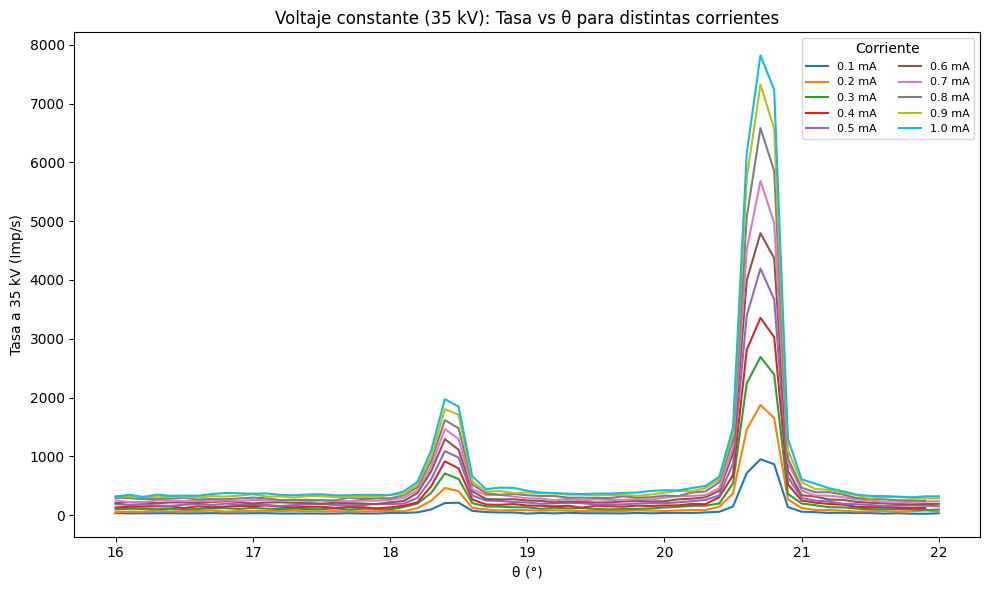

CSV con datos ordenados guardado en: /voltaje_constante_35kV_tidy.csv


In [ ]:
# Parse the "voltaje constante (35 kV)" table and plot R vs theta for multiple corrientes (0.1–1.0 mA)
import pandas as pd, io, re, matplotlib.pyplot as plt

raw = """0,1 mA			0,2 mA			0,3 mA			0,4 mA			0,5 mA			0,6 mA			0,7 mA			0,8 mA			0,9 mA			1,0 mA
Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV		Ángulo del crista	Tasa con 35kV
theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s		theta/°	R(35kV)/Imp/s

16	35		16	54		16	98		16	131		16	188		16	207		16	252		16	295		16	316		16	317
16,1	30		16,1	60		16,1	109		16,1	141		16,1	171		16,1	220		16,1	222		16,1	289		16,1	315		16,1	347
16,2	32		16,2	61		16,2	107		16,2	145		16,2	179		16,2	212		16,2	221		16,2	273		16,2	314		16,2	308
16,3	32		16,3	74		16,3	100		16,3	149		16,3	166		16,3	203		16,3	249		16,3	275		16,3	305		16,3	349
16,4	33		16,4	63		16,4	108		16,4	147		16,4	158		16,4	216		16,4	255		16,4	288		16,4	308		16,4	328
16,5	30		16,5	63		16,5	95		16,5	121		16,5	177		16,5	215		16,5	236		16,5	293		16,5	309		16,5	332
16,6	31		16,6	71		16,6	106		16,6	151		16,6	190		16,6	210		16,6	243		16,6	266		16,6	298		16,6	330
16,7	34		16,7	79		16,7	116		16,7	134		16,7	170		16,7	220		16,7	237		16,7	277		16,7	325		16,7	359
16,8	31		16,8	60		16,8	118		16,8	147		16,8	196		16,8	238		16,8	255		16,8	270		16,8	315		16,8	376
16,9	31		16,9	67		16,9	105		16,9	155		16,9	183		16,9	223		16,9	241		16,9	285		16,9	332		16,9	372
17	33		17	73		17	124		17	153		17	188		17	198		17	259		17	298		17	356		17	364
17,1	34		17,1	74		17,1	111		17,1	166		17,1	172		17,1	214		17,1	253		17,1	287		17,1	316		17,1	369
17,2	27		17,2	71		17,2	103		17,2	142		17,2	156		17,2	218		17,2	252		17,2	256		17,2	317		17,2	345
17,3	28		17,3	74		17,3	111		17,3	134		17,3	171		17,3	210		17,3	252		17,3	258		17,3	299		17,3	338
17,4	28		17,4	67		17,4	103		17,4	142		17,4	183		17,4	206		17,4	233		17,4	261		17,4	325		17,4	351
17,5	26		17,5	65		17,5	101		17,5	143		17,5	189		17,5	195		17,5	254		17,5	250		17,5	322		17,5	355
17,6	27		17,6	68		17,6	115		17,6	123		17,6	172		17,6	210		17,6	239		17,6	252		17,6	306		17,6	336
17,7	33		17,7	64		17,7	95		17,7	139		17,7	168		17,7	204		17,7	236		17,7	297		17,7	308		17,7	339
17,8	28		17,8	64		17,8	109		17,8	135		17,8	171		17,8	198		17,8	248		17,8	272		17,8	310		17,8	345
17,9	27		17,9	67		17,9	107		17,9	115		17,9	192		17,9	186		17,9	244		17,9	286		17,9	309		17,9	344
18	38		18	73		18	99		18	132		18	190		18	219		18	261		18	287		18	346		18	342
18,1	38		18,1	66		18,1	137		18,1	160		18,1	194		18,1	240		18,1	293		18,1	337		18,1	357		18,1	403
18,2	47		18,2	118		18,2	198		18,2	218		18,2	294		18,2	376		18,2	419		18,2	475		18,2	519		18,2	566
18,3	98		18,3	244		18,3	377		18,3	491		18,3	609		18,3	745		18,3	829		18,3	922		18,3	991		18,3	1098
18,4	205		18,4	462		18,4	710		18,4	915		18,4	1089		18,4	1293		18,4	1465		18,4	1617		18,4	1801		18,4	1973
18,5	212		18,5	409		18,5	614		18,5	795		18,5	979		18,5	1113		18,5	1294		18,5	1478		18,5	1709		18,5	1846
18,6	73		18,6	124		18,6	205		18,6	266		18,6	336		18,6	404		18,6	442		18,6	520		18,6	570		18,6	661
18,7	52		18,7	97		18,7	148		18,7	182		18,7	247		18,7	275		18,7	341		18,7	374		18,7	401		18,7	441
18,8	46		18,8	78		18,8	145		18,8	176		18,8	242		18,8	268		18,8	346		18,8	345		18,8	409		18,8	468
18,9	45		18,9	87		18,9	134		18,9	188		18,9	222		18,9	270		18,9	317		18,9	362		18,9	377		18,9	465
19	27		19	84		19	133		19	164		19	214		19	249		19	285		19	338		19	385		19	416
19,1	37		19,1	75		19,1	107		19,1	159		19,1	193		19,1	242		19,1	283		19,1	327		19,1	372		19,1	385
19,2	30		19,2	84		19,2	126		19,2	150		19,2	202		19,2	218		19,2	251		19,2	325		19,2	368		19,2	376
19,3	40		19,3	75		19,3	115		19,3	160		19,3	209		19,3	234		19,3	280		19,3	298		19,3	349		19,3	365
19,4	33		19,4	69		19,4	120		19,4	127		19,4	203		19,4	225		19,4	252		19,4	297		19,4	349		19,4	358
19,5	32		19,5	74		19,5	104		19,5	159		19,5	179		19,5	215		19,5	268		19,5	293		19,5	337		19,5	368
19,6	32		19,6	68		19,6	99		19,6	152		19,6	182		19,6	217		19,6	259		19,6	290		19,6	340		19,6	367
19,7	29		19,7	70		19,7	105		19,7	144		19,7	183		19,7	232		19,7	262		19,7	320		19,7	347		19,7	379
19,8	38		19,8	81		19,8	107		19,8	163		19,8	200		19,8	244		19,8	272		19,8	299		19,8	330		19,8	384
19,9	31		19,9	77		19,9	115		19,9	155		19,9	203		19,9	234		19,9	264		19,9	304		19,9	351		19,9	412
20	37		20	71		20	130		20	165		20	203		20	236		20	297		20	333		20	382		20	423
20,1	39		20,1	81		20,1	142		20,1	167		20,1	218		20,1	269		20,1	324		20,1	323		20,1	412		20,1	420
20,2	37		20,2	86		20,2	158		20,2	192		20,2	237		20,2	280		20,2	326		20,2	384		20,2	407		20,2	461
20,3	46		20,3	88		20,3	161		20,3	187		20,3	258		20,3	304		20,3	342		20,3	404		20,3	462		20,3	498
20,4	58		20,4	143		20,4	198		20,4	306		20,4	338		20,4	414		20,4	456		20,4	561		20,4	614		20,4	653
20,5	147		20,5	369		20,5	541		20,5	681		20,5	878		20,5	1058		20,5	1155		20,5	1283		20,5	1384		20,5	1491
20,6	715		20,6	1457		20,6	2242		20,6	2810		20,6	3395		20,6	3993		20,6	4512		20,6	5068		20,6	5729		20,6	6153
20,7	951		20,7	1875		20,7	2690		20,7	3356		20,7	4193		20,7	4795		20,7	5684		20,7	6585		20,7	7325		20,7	7822
20,8	865		20,8	1650		20,8	2392		20,8	3029		20,8	3671		20,8	4371		20,8	4968		20,8	5853		20,8	6571		20,8	7233
20,9	137		20,9	266		20,9	362		20,9	524		20,9	649		20,9	755		20,9	895		20,9	965		20,9	1103		20,9	1304
21	59		21	123		21	198		21	249		21	293		21	338		21	417		21	467		21	560		21	609
21,1	50		21,1	88		21,1	169		21,1	212		21,1	248		21,1	316		21,1	334		21,1	389		21,1	444		21,1	535
21,2	38		21,2	88		21,2	135		21,2	191		21,2	231		21,2	264		21,2	331		21,2	391		21,2	430		21,2	458
21,3	41		21,3	75		21,3	132		21,3	178		21,3	197		21,3	260		21,3	307		21,3	352		21,3	385		21,3	407
21,4	36		21,4	61		21,4	112		21,4	142		21,4	185		21,4	225		21,4	270		21,4	290		21,4	339		21,4	350
21,5	35		21,5	67		21,5	101		21,5	135		21,5	173		21,5	211		21,5	249		21,5	276		21,5	283		21,5	327
21,6	26		21,6	68		21,6	102		21,6	140		21,6	156		21,6	200		21,6	223		21,6	268		21,6	309		21,6	324
21,7	33		21,7	61		21,7	102		21,7	125		21,7	161		21,7	189		21,7	216		21,7	252		21,7	307		21,7	315
21,8	24		21,8	65		21,8	96		21,8	123		21,8	167		21,8	183		21,8	226		21,8	252		21,8	296		21,8	303
21,9	23		21,9	81		21,9	85		21,9	122		21,9	160		21,9	189		21,9	230		21,9	243		21,9	284		21,9	321
22	32		22	63		22	97					22	151		22	192		22	238					22	287		22	321
"""

# Normalize decimal commas and read
raw_fixed = raw.replace(',', '.')
df = pd.read_csv(io.StringIO(raw_fixed), sep='\t', engine='python')

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Remove spacer rows (fully NaN except maybe first col) and header repeats
def is_header_row(row):
    vals = row.astype(str).str.lower().tolist()
    return any('ángulo' in v or 'angulo' in v or 'theta' in v for v in vals)

df = df[~df.apply(is_header_row, axis=1)]

# Reset index
df = df.reset_index(drop=True)

# Build a tidy table: for each pair of columns (theta, tasa) make a current label
cols = df.columns.tolist()
pairs = []
i = 0
current_labels = ["0.1 mA","0.2 mA","0.3 mA","0.4 mA","0.5 mA","0.6 mA","0.7 mA","0.8 mA","0.9 mA","1.0 mA"]
ci = 0
while i < len(cols)-1 and ci < len(current_labels):
    theta_col = cols[i]
    tasa_col = cols[i+1]
    pairs.append((theta_col, tasa_col, current_labels[ci]))
    i += 2
    ci += 1

tidy = []
for theta_col, tasa_col, label in pairs:
    sub = df[[theta_col, tasa_col]].copy()
    sub.columns = ['theta_deg', 'rate_imps']
    # coerce to numeric, drop rows with NaN theta or rate
    sub['theta_deg'] = pd.to_numeric(sub['theta_deg'], errors='coerce')
    sub['rate_imps'] = pd.to_numeric(sub['rate_imps'], errors='coerce')
    sub = sub.dropna()
    sub['corriente'] = label
    tidy.append(sub)

tidy_df = pd.concat(tidy, ignore_index=True)

# Save a CSV and display the tidy data head
csv_path = '/voltaje_constante_35kV_tidy.csv'
tidy_df.to_csv(csv_path, index=False)


# Plot overlay: rate vs theta for each corriente
plt.figure(figsize=(10,6))
for label, grp in tidy_df.groupby('corriente'):
    grp_sorted = grp.sort_values('theta_deg')
    plt.plot(grp_sorted['theta_deg'], grp_sorted['rate_imps'], label=label)

plt.xlabel("θ (°)")
plt.ylabel("Tasa a 35 kV (Imp/s)")
plt.title("Voltaje constante (35 kV): Tasa vs θ para distintas corrientes")
plt.legend(ncol=2, fontsize=8, title="Corriente")
plt.tight_layout()
plt.show()

print(f"CSV con datos ordenados guardado en: {csv_path}")


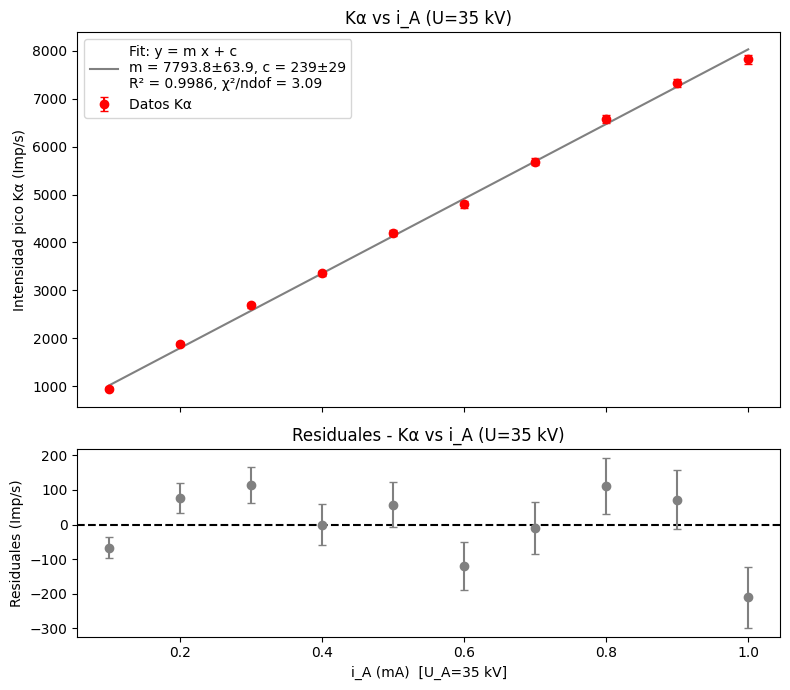

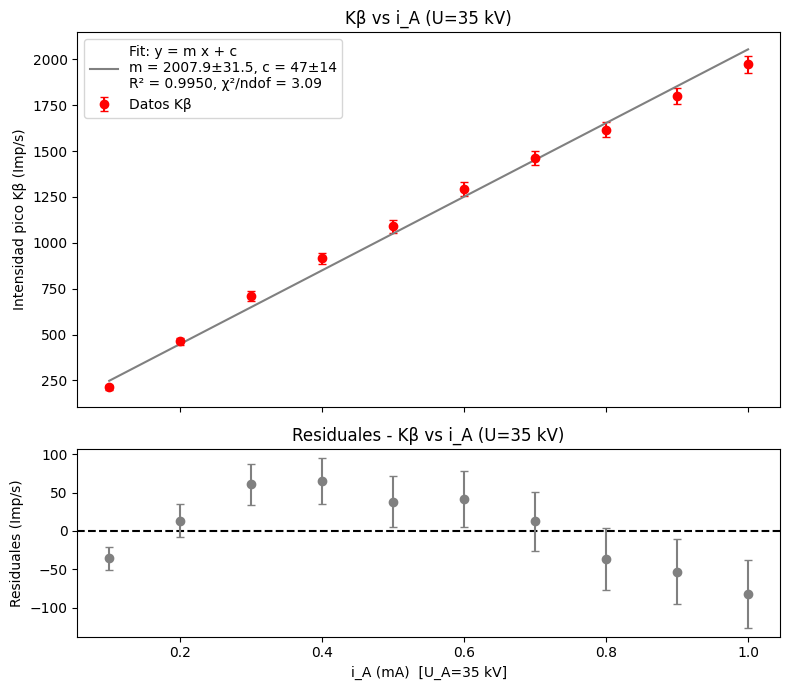

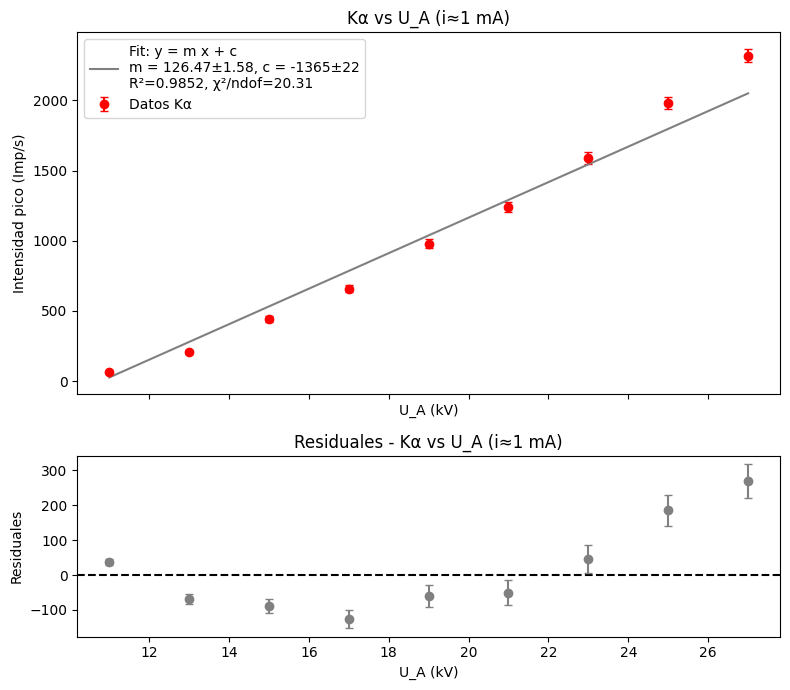

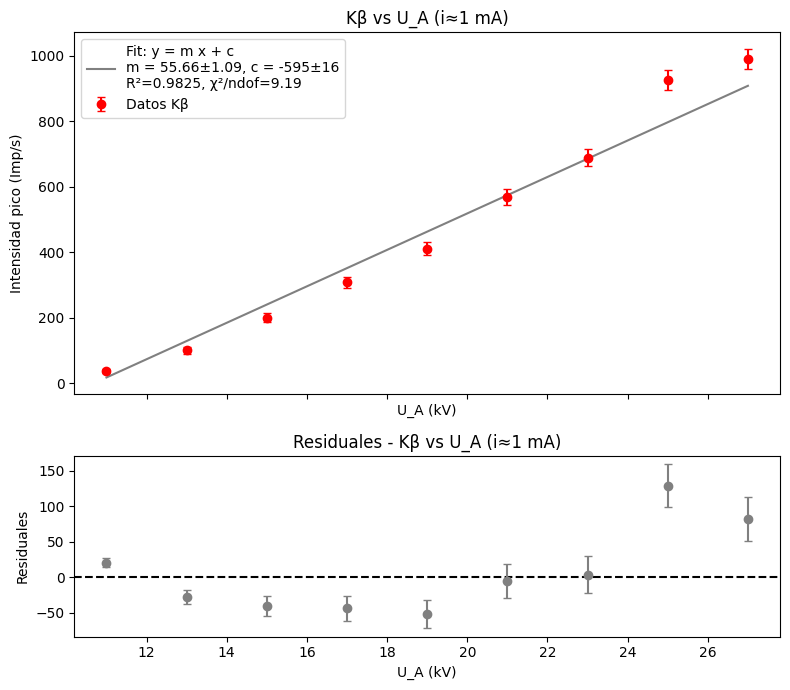

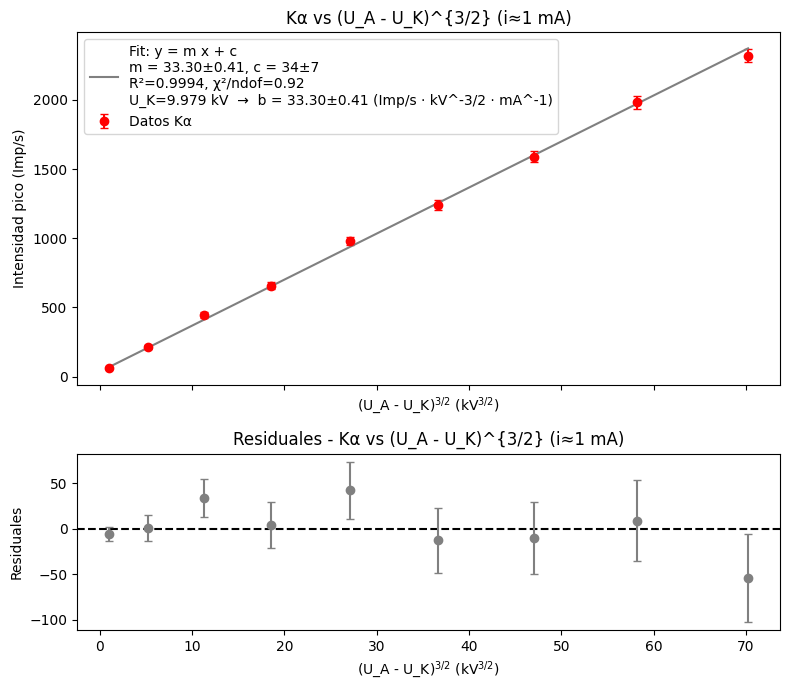

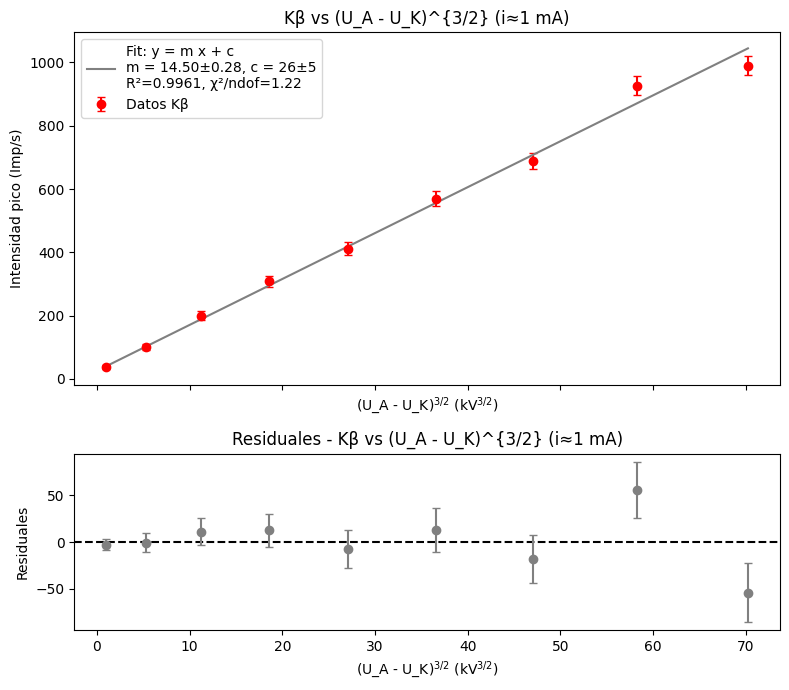

Constante b (de Kα vs (U-Uk)^(3/2)): b = 33.30 ± 0.41
Constante b (de pendiente Kα vs i a 35kV): b = 62.27 ± 0.51
Figuras guardadas:
/fit_Kalpha_vs_i.png
/fit_Kalpha_vs_i_resid.png
/fit_Kbeta_vs_i.png
/fit_Kbeta_vs_i_resid.png
/fit_Kalpha_vs_U.png
/fit_Kalpha_vs_U_resid.png
/fit_Kbeta_vs_U.png
/fit_Kbeta_vs_U_resid.png
/fit_Kalpha_vs_UmUK32.png
/fit_Kalpha_vs_UmUK32_resid.png
/fit_Kbeta_vs_UmUK32.png
/fit_Kbeta_vs_UmUK32_resid.png


In [ ]:
# Full analysis with uncertainties and residuals, producing ready-to-use figures.
import pandas as pd, numpy as np, io, matplotlib.pyplot as plt
from math import sin, radians
from PIL import Image, ImageOps
import os

# ---------- Helpers ----------
def weighted_linfit(x, y, sigma):
    """Weighted linear fit y = m x + c. Returns m, c, their stds, R2, chi2, ndof, cov matrix."""
    x = np.asarray(x, float); y = np.asarray(y, float); sigma = np.asarray(sigma, float)
    w = 1.0 / (sigma**2)
    S = w.sum()
    Sx = (w * x).sum()
    Sy = (w * y).sum()
    Sxx = (w * x * x).sum()
    Sxy = (w * x * y).sum()
    Delta = S * Sxx - Sx**2
    m = (S * Sxy - Sx * Sy) / Delta
    c = (Sxx * Sy - Sx * Sxy) / Delta
    # Covariance and uncertainties
    cov_mm = S / Delta
    cov_cc = Sxx / Delta
    cov_mc = -Sx / Delta
    # Goodness of fit
    yhat = m * x + c
    residuals = y - yhat
    chi2 = np.sum((residuals / sigma)**2)
    ndof = len(x) - 2
    # R^2 (unweighted for interpretability)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.average(y, weights=w))**2)
    R2 = 1 - ss_res / ss_tot if ss_tot > 0 else np.nan
    return m, c, np.sqrt(cov_mm), np.sqrt(cov_cc), cov_mc, R2, chi2, ndof, residuals, yhat

def peak_in_window(df, theta_col, rate_col, wmin, wmax):
    sel = df[(df[theta_col] >= wmin) & (df[theta_col] <= wmax)]
    if sel.empty:
        return np.nan
    return sel[rate_col].max()

# ---------- Load and prep: constant-current table ----------
raw_cc = """Ángulo del contad\tTasa con 11kV\tTasa con 13kV\tTasa con 15kV\tTasa con 17kV\tTasa con 19kV\tTasa con 21kV\tTasa con 23kV\tTasa con 25kV\tTasa con 27kV
2*theta/°\tR(11kV)/Imp/s\tR(13kV)/Imp/s\tR(15kV)/Imp/s\tR(17kV)/Imp/s\tR(19kV)/Imp/s\tR(21kV)/Imp/s\tR(23kV)/Imp/s\tR(25kV)/Imp/s\tR(27kV)/Imp/s
30\t6\t23\t44\t60\t91\t100\t127\t159\t202
30,2\t7\t26\t49\t62\t84\t105\t129\t155\t201
30,4\t6\t31\t46\t62\t83\t107\t130\t164\t198
30,6\t9\t31\t40\t67\t94\t104\t144\t170\t197
30,8\t7\t25\t43\t57\t86\t0\t121\t175\t211
31\t9\t23\t43\t61\t77\t104\t126\t169\t223
31,2\t9\t30\t34\t63\t90\t121\t141\t161\t206
31,4\t9\t23\t45\t57\t82\t109\t116\t158\t194
31,6\t13\t30\t46\t58\t80\t98\t127\t156\t204
31,8\t10\t21\t43\t56\t89\t116\t129\t163\t181
32\t9\t21\t49\t63\t79\t111\t131\t142\t184
32,2\t5\t24\t48\t57\t80\t118\t124\t159\t193
32,4\t9\t24\t39\t58\t75\t88\t125\t162\t184
32,5\t8\t26\t39\t69\t80\t104\t125\t161\t206
32,8\t7\t29\t41\t67\t87\t105\t120\t161\t188
33\t12\t25\t42\t56\t87\t110\t130\t169\t190
33,2\t12\t27\t47\t67\t87\t109\t155\t165\t202
33,4\t12\t27\t43\t58\t90\t93\t151\t175\t180
33,6\t12\t26\t46\t58\t78\t114\t126\t162\t189
33,8\t12\t29\t46\t68\t85\t114\t142\t164\t203
34\t14\t24\t40\t71\t78\t105\t132\t158\t198
34,2\t7\t21\t34\t69\t79\t110\t126\t153\t204
34,4\t13\t32\t47\t59\t81\t112\t121\t175\t197
34,5\t11\t26\t52\t61\t85\t109\t133\t161\t192
34,8\t14\t24\t44\t62\t94\t109\t134\t159\t181
35\t10\t31\t48\t60\t86\t105\t138\t165\t172
35,2\t10\t22\t43\t66\t89\t104\t139\t150\t207
35,4\t9\t28\t44\t61\t81\t103\t137\t161\t215
35,5\t18\t28\t48\t70\t92\t125\t162\t183\t233
35,8\t19\t53\t87\t122\t178\t242\t302\t366\t432
36\t21\t44\t95\t148\t217\t264\t356\t405\t456
36,2\t39\t119\t235\t352\t492\t611\t794\t945\t1086
36,4\t42\t133\t220\t380\t557\t670\t836\t1037\t1242
36,5\t38\t101\t200\t308\t411\t569\t689\t926\t990
36,8\t16\t43\t54\t88\t121\t155\t209\t241\t299
37\t14\t35\t51\t69\t95\t135\t172\t206\t267
37,2\t15\t28\t58\t90\t100\t148\t166\t215\t246
37,4\t13\t25\t45\t76\t101\t129\t167\t188\t230
37,5\t17\t35\t59\t79\t101\t137\t167\t202\t248
37,8\t17\t29\t58\t74\t97\t136\t160\t187\t230
38\t11\t25\t41\t76\t89\t124\t153\t208\t226
38,2\t9\t35\t46\t67\t82\t123\t149\t184\t222
38,4\t14\t26\t45\t65\t84\t117\t153\t170\t228
38,6\t15\t28\t47\t64\t103\t132\t142\t167\t192
38,8\t16\t34\t48\t73\t95\t122\t161\t171\t224
39\t12\t35\t38\t70\t86\t125\t135\t182\t214
39,2\t14\t26\t46\t66\t86\t130\t148\t171\t208
39,4\t12\t23\t43\t63\t93\t108\t143\t183\t208
39,5\t18\t36\t51\t63\t93\t123\t165\t204\t230
39,8\t14\t34\t56\t69\t114\t136\t163\t212\t264
40\t19\t43\t57\t84\t124\t178\t222\t265\t295
40,2\t31\t82\t152\t205\t337\t429\t523\t634\t718
40,4\t43\t144\t254\t398\t592\t743\t939\t1085\t1285
40,5\t59\t184\t323\t501\t663\t861\t1085\t1309\t1469
40,8\t168\t521\t966\t1470\t2045\t2541\t3145\t3710\t4372
41\t174\t575\t1022\t1584\t2167\t2800\t3500\t4030\t4744
41,2\t63\t210\t443\t658\t979\t1240\t1589\t1982\t2319
41,4\t17\t41\t82\t108\t185\t218\t314\t380\t425
41,5\t14\t24\t66\t90\t130\t163\t213\t245\t337
41,8\t10\t31\t48\t74\t104\t152\t193\t214\t280
42\t9\t30\t48\t66\t101\t132\t178\t210\t252
42,2\t15\t29\t46\t67\t100\t127\t153\t186\t242
42,4\t12\t32\t53\t67\t94\t127\t130\t179\t192
42,6\t17\t23\t39\t64\t84\t117\t144\t174\t225
42,8\t14\t27\t37\t56\t71\t104\t126\t149\t214
43\t9\t21\t44\t48\t74\t104\t122\t162\t171
43,2\t11\t21\t37\t60\t74\t104\t127\t150\t185
43,4\t12\t26\t35\t57\t73\t97\t133\t149\t179
43,6\t10\t24\t41\t59\t78\t94\t119\t153\t179
43,8\t8\t24\t31\t43\t79\t93\t127\t144\t178
44\t12\t27\t34\t53\t69\t103\t127\t138\t152
44,2\t10\t27\t32\t51\t71\t104\t113\t141\t183
44,4\t7\t22\t33\t58\t75\t87\t122\t163\t161
44,5\t14\t18\t32\t58\t72\t88\t131\t143\t167
44,8\t10\t18\t36\t56\t70\t84\t120\t142\t176
45\t7\t27\t31\t57\t69\t80\t110\t143\t161
45,2\t10\t15\t22\t51\t62\t96\t105\t131\t154
45,4\t9\t20\t33\t55\t60\t81\t101\t135\t163
45,5\t8\t21\t31\t52\t66\t84\t100\t121\t154
45,8\t9\t15\t29\t40\t59\t82\t116\t136\t144
46\t13\t19\t34\t47\t66\t94\t109\t129\t150
46,2\t10\t14\t37\t55\t70\t89\t106\t131\t148
46,4\t9\t20\t25\t52\t65\t87\t91\t134\t162
46,5\t7\t19\t34\t42\t59\t84\t97\t122\t159
46,8\t9\t19\t35\t48\t59\t79\t115\t128\t161
47\t10\t18\t28\t53\t64\t90\t101\t115\t141
47,2\t9\t19\t31\t38\t65\t75\t97\t111\t149
47,4\t7\t20\t32\t48\t51\t82\t102\t121\t145
47,6\t11\t22\t25\t39\t51\t87\t93\t119\t149
47,8\t10\t21\t37\t47\t58\t77\t100\t123\t154
48\t5\t20\t26\t38\t65\t89\t92\t133\t139
"""
df_cc = pd.read_csv(io.StringIO(raw_cc.replace(',', '.')), sep='\t')
df_cc = df_cc[df_cc[df_cc.columns[0]] != '2*theta/°'].copy()
df_cc.rename(columns={df_cc.columns[0]:'2theta_deg'}, inplace=True)
for c in df_cc.columns:
    df_cc[c] = pd.to_numeric(df_cc[c], errors='coerce')
df_cc = df_cc.dropna()

# ---------- Load & prep: constant-voltage (35 kV) tidy from earlier step ----------
raw_v = open('/voltaje_constante_35kV_tidy.csv', 'r').read()
tidy_df = pd.read_csv(io.StringIO(raw_v))
# Windows for peaks (θ in degrees)
KA_WINDOW = (20.55, 20.95)  # Kα
KB_WINDOW = (18.25, 18.65)  # Kβ

# ---------- (A) Fit I_K vs corriente (U const = 35kV) with uncertainties ----------
currents = []
ka_I = []
kb_I = []
for label, grp in tidy_df.groupby('corriente'):
    tmp = grp[['theta_deg','rate_imps']].copy().sort_values('theta_deg')
    currents.append(float(label.replace(' mA','')))
    ka_I.append(peak_in_window(tmp,'theta_deg','rate_imps', *KA_WINDOW))
    kb_I.append(peak_in_window(tmp,'theta_deg','rate_imps', *KB_WINDOW))

df_ivsi = pd.DataFrame({'i_mA':currents,'I_Kalpha':ka_I,'I_Kbeta':kb_I}).sort_values('i_mA')
# Poisson counting uncertainty ~ sqrt(I)
sigma_Ka = np.sqrt(df_ivsi['I_Kalpha'])
sigma_Kb = np.sqrt(df_ivsi['I_Kbeta'])

# Fit with intercept (allow background)
mKa, cKa, smKa, scKa, covKa, R2Ka, chi2Ka, ndKa, resKa, yhatKa = weighted_linfit(df_ivsi['i_mA'], df_ivsi['I_Kalpha'], sigma_Ka)
mKb, cKb, smKb, scKb, covKb, R2Kb, chi2Kb, ndKb, resKb, yhatKb = weighted_linfit(df_ivsi['i_mA'], df_ivsi['I_Kbeta'],  sigma_Kb)

def plot_with_fit(x, y, sigma, m, c, sm, sc, R2, chi2, nd, ylabel, title, fname, label_curve):
    # --- un solo lienzo con dos ejes (alto 2:1) ---
    fig, (ax, axr) = plt.subplots(
        2, 1, sharex=True, figsize=(8, 7),
        gridspec_kw={'height_ratios': [2, 1]}
    )

    # Panel principal
    ax.errorbar(x, y, yerr=sigma, fmt='o', capsize=3, label=label_curve, c="red")
    xs = np.linspace(min(x), max(x), 200)
    ax.plot(xs, m*xs + c,
            label=f"Fit: y = m x + c\nm = {m:.1f}±{sm:.1f}, c = {c:.0f}±{sc:.0f}\nR² = {R2:.4f}, χ²/ndof = {chi2/nd:.2f}",
            color="gray")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    # Panel de residuales (más bajito)
    res = y - (m*np.array(x) + c)
    axr.axhline(0, linestyle='--', c="black")
    axr.errorbar(x, res, yerr=sigma, fmt='o', capsize=3, c="gray")
    axr.set_xlabel("i_A (mA)  [U_A=35 kV]")
    axr.set_ylabel("Residuales (Imp/s)")
    axr.set_title(f"Residuales - {title}")

    fig.tight_layout()
    fig.savefig(fname, dpi=200)
    plt.show()

    # (Opcional) si quieres mantener también un PNG solo de residuales como antes:
    rname = fname.replace(".png","_resid.png")


    return fname, rname


f1, f1r = plot_with_fit(df_ivsi['i_mA'], df_ivsi['I_Kalpha'], sigma_Ka, mKa, cKa, smKa, scKa, R2Ka, chi2Ka, ndKa,
                        "Intensidad pico Kα (Imp/s)",
                        "Kα vs i_A (U=35 kV)",
                        "/fit_Kalpha_vs_i.png",
                        "Datos Kα")
f2, f2r = plot_with_fit(df_ivsi['i_mA'], df_ivsi['I_Kbeta'], sigma_Kb, mKb, cKb, smKb, scKb, R2Kb, chi2Kb, ndKb,
                        "Intensidad pico Kβ (Imp/s)",
                        "Kβ vs i_A (U=35 kV)",
                        "/fit_Kbeta_vs_i.png",
                        "Datos Kβ")

# ---------- (B) Fit I_K vs U and vs (U-Uk)^(3/2) at ~1 mA ----------
UK = 9.979  # kV
# Extract K peaks per voltage from constant-current scan
KA2_WINDOW = (2*KA_WINDOW[0], 2*KA_WINDOW[1])
KB2_WINDOW = (2*KB_WINDOW[0], 2*KB_WINDOW[1])

Uvals = []
Ika = []
Ikb = []
for col in df_cc.columns[1:]:
    U = float(col.replace('Tasa con ','').replace('kV',''))
    Uvals.append(U)
    tmp = df_cc[['2theta_deg', col]].rename(columns={'2theta_deg':'ang', col:'rate'})
    Ika.append(peak_in_window(tmp, 'ang','rate', *KA2_WINDOW))
    Ikb.append(peak_in_window(tmp, 'ang','rate', *KB2_WINDOW))
df_vsU = pd.DataFrame({'U_kV':Uvals,'I_Kalpha':Ika,'I_Kbeta':Ikb}).sort_values('U_kV')
# uncertainties
sigmaKa_U = np.sqrt(df_vsU['I_Kalpha'])
sigmaKb_U = np.sqrt(df_vsU['I_Kbeta'])

# Fits vs U
mKaU, cKaU, smKaU, scKaU, _, R2KaU, chi2KaU, ndKaU, resKaU, yhatKaU = weighted_linfit(df_vsU['U_kV'], df_vsU['I_Kalpha'], sigmaKa_U)
mKbU, cKbU, smKbU, scKbU, _, R2KbU, chi2KbU, ndKbU, resKbU, yhatKbU = weighted_linfit(df_vsU['U_kV'], df_vsU['I_Kbeta'],  sigmaKb_U)

# Fits vs (U-Uk)^{3/2}
X32 = np.power(np.clip(df_vsU['U_kV']-UK, 0, None), 1.5)
mKa32, cKa32, smKa32, scKa32, _, R2Ka32, chi2Ka32, ndKa32, resKa32, yhatKa32 = weighted_linfit(X32, df_vsU['I_Kalpha'], sigmaKa_U)
mKb32, cKb32, smKb32, scKb32, _, R2Kb32, chi2Kb32, ndKb32, resKb32, yhatKb32 = weighted_linfit(X32, df_vsU['I_Kbeta'],  sigmaKb_U)

# b estimates (using Kα): slope ≈ b * i (i≈1 mA)
b_est = mKa32 / 1.0
sb_est = smKa32 / 1.0

def plot_fitU(x, y, sigma, m, c, sm, sc, R2, chi2, nd, xlabel, title, fname, label_curve, legend_extra=""):
    # >>> cambiado: plt.subplots con height_ratios 2:1 <<<
    fig, (ax, axr) = plt.subplots(
        2, 1, sharex=True, figsize=(8,7),
        gridspec_kw={'height_ratios':[2, 1]}
    )
    plt.sca(ax)  # panel principal

    plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=3, label=label_curve, c="red")
    xs = np.linspace(np.min(x), np.max(x), 300)
    plt.plot(xs, m*xs + c, label=f"Fit: y = m x + c\nm = {m:.2f}±{sm:.2f}, c = {c:.0f}±{sc:.0f}\nR²={R2:.4f}, χ²/ndof={chi2/nd:.2f}{legend_extra}", color="gray")
    plt.xlabel(xlabel)
    plt.ylabel("Intensidad pico (Imp/s)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()

    # Residual plot
    plt.sca(axr)  # panel residuales (más bajito)
    plt.axhline(0, linestyle='--', c="black")
    plt.errorbar(x, y - (m*np.array(x)+c), yerr=sigma, fmt='o', capsize=3, c="gray")
    plt.xlabel(xlabel)
    plt.ylabel("Residuales")
    plt.title(f"Residuales - {title}")

    rname = fname.replace(".png","_resid.png")
    plt.tight_layout()
    plt.savefig(rname, dpi=200)
    plt.show()
    return fname, rname

g1, g1r = plot_fitU(df_vsU['U_kV'], df_vsU['I_Kalpha'], sigmaKa_U, mKaU, cKaU, smKaU, scKaU, R2KaU, chi2KaU, ndKaU,
                    "U_A (kV)", "Kα vs U_A (i≈1 mA)", "/fit_Kalpha_vs_U.png", "Datos Kα")
g2, g2r = plot_fitU(df_vsU['U_kV'], df_vsU['I_Kbeta'], sigmaKb_U, mKbU, cKbU, smKbU, scKbU, R2KbU, chi2KbU, ndKbU,
                    "U_A (kV)", "Kβ vs U_A (i≈1 mA)", "/fit_Kbeta_vs_U.png", "Datos Kβ")
g3, g3r = plot_fitU(X32, df_vsU['I_Kalpha'], sigmaKa_U, mKa32, cKa32, smKa32, scKa32, R2Ka32, chi2Ka32, ndKa32,
                    r"(U_A - U_K)$^{3/2}$ (kV$^{3/2}$)",
                    "Kα vs (U_A - U_K)^{3/2} (i≈1 mA)",
                    "/fit_Kalpha_vs_UmUK32.png", "Datos Kα",
                    legend_extra=f"\nU_K=9.979 kV  →  b = {b_est:.2f}±{sb_est:.2f} (Imp/s · kV^-3/2 · mA^-1)")
g4, g4r = plot_fitU(X32, df_vsU['I_Kbeta'], sigmaKb_U, mKb32, cKb32, smKb32, scKb32, R2Kb32, chi2Kb32, ndKb32,
                    r"(U_A - U_K)$^{3/2}$ (kV$^{3/2}$)",
                    "Kβ vs (U_A - U_K)^{3/2} (i≈1 mA)",
                    "/fit_Kbeta_vs_UmUK32.png", "Datos Kβ")

# Cross-check b from slope of I vs i: slope ≈ b * (U-Uk)^{3/2}
# Use U=35kV -> X32_35
X32_35 = (35.0 - 9.979)**1.5
b_from_i = mKa / X32_35   # mKa units Imp/s per mA
sb_from_i = smKa / X32_35

# Summary table
summary = pd.DataFrame({
    'Ajuste': ['Kα vs i','Kβ vs i','Kα vs U','Kβ vs U','Kα vs (U-Uk)^{3/2}','Kβ vs (U-Uk)^{3/2}'],
    'Pendiente m': [mKa, mKb, mKaU, mKbU, mKa32, mKb32],
    'σ_m': [smKa, smKb, smKaU, smKbU, smKa32, smKb32],
    'Intercepto c': [cKa, cKb, cKaU, cKbU, cKa32, cKb32],
    'σ_c': [scKa, scKb, scKaU, scKbU, scKa32, scKb32],
    'R2': [R2Ka, R2Kb, R2KaU, R2KbU, R2Ka32, R2Kb32],
    'χ2/ndof': [chi2Ka/ndKa, chi2Kb/ndKb, chi2KaU/ndKaU, chi2KbU/ndKbU, chi2Ka32/ndKa32, chi2Kb32/ndKb32]
})


print(f"Constante b (de Kα vs (U-Uk)^(3/2)): b = {b_est:.2f} ± {sb_est:.2f}")
print(f"Constante b (de pendiente Kα vs i a 35kV): b = {b_from_i:.2f} ± {sb_from_i:.2f}")

print("Figuras guardadas:")
for p in [f1,f1r,f2,f2r,g1,g1r,g2,g2r,g3,g3r,g4,g4r]:
    print(p)


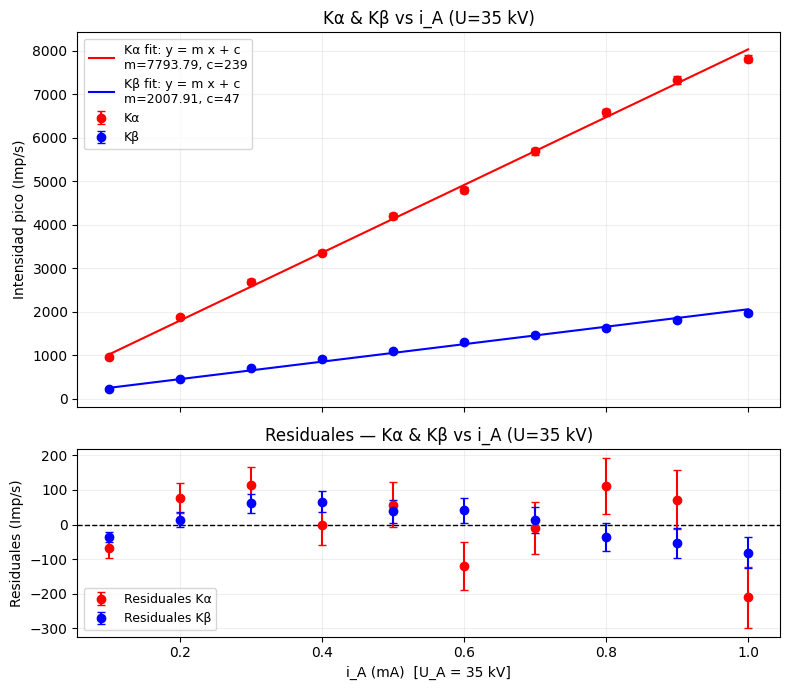

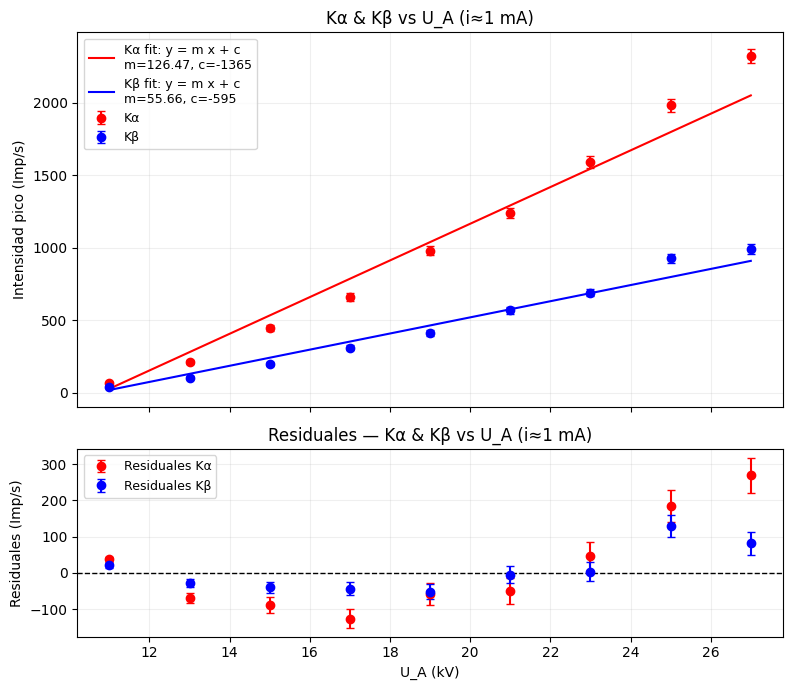

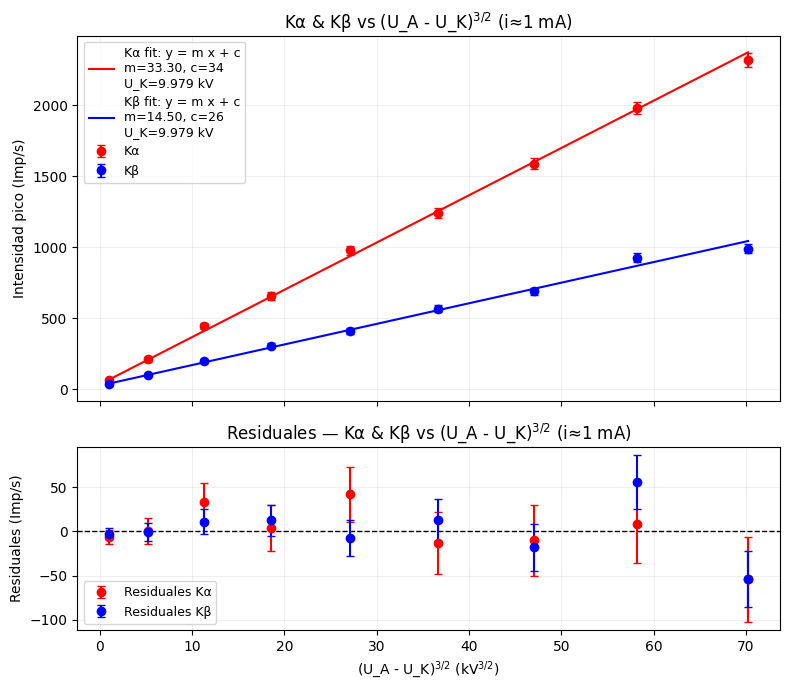

Figuras combinadas guardadas:
/fit_Kalpha_Kbeta_vs_i_combined.png
/fit_Kalpha_Kbeta_vs_U_combined.png
/fit_Kalpha_Kbeta_vs_UmUK32_combined.png


In [ ]:
# ==================== COMBINAR Kα y Kβ EN LA MISMA FIGURA (con residuales) ====================
def plot_pair_with_fits(
    x1, y1, s1, m1, c1, lbl1,
    x2, y2, s2, m2, c2, lbl2,
    xlabel, title, fname,
    note_extra_1="", note_extra_2="",
):
    """
    Dibuja dos series (Kα y Kβ) en el mismo lienzo con sus rectas de ajuste y residuales.
    - Panel superior: datos con barras de error y rectas ajustadas.
    - Panel inferior: residuales de ambas series.
    Colores fijos: Kα en rojo, Kβ en azul (como pediste).
    """
    import numpy as np
    import matplotlib.pyplot as plt

    x1 = np.asarray(x1, float); y1 = np.asarray(y1, float); s1 = np.asarray(s1, float)
    x2 = np.asarray(x2, float); y2 = np.asarray(y2, float); s2 = np.asarray(s2, float)

    fig, (ax, axr) = plt.subplots(
        2, 1, sharex=True, figsize=(8,7),
        gridspec_kw={'height_ratios':[2,1]}
    )

    # Panel principal
    ax.errorbar(x1, y1, yerr=s1, fmt='o', capsize=3, c='red',  label=lbl1)
    ax.errorbar(x2, y2, yerr=s2, fmt='o', capsize=3, c='blue', label=lbl2)

    xs = np.linspace(min(np.min(x1), np.min(x2)), max(np.max(x1), np.max(x2)), 300)
    ax.plot(xs, m1*xs + c1, c='red',  linewidth=1.5,
            label=f"{lbl1} fit: y = m x + c\nm={m1:.2f}, c={c1:.0f}{note_extra_1}")
    ax.plot(xs, m2*xs + c2, c='blue', linewidth=1.5,
            label=f"{lbl2} fit: y = m x + c\nm={m2:.2f}, c={c2:.0f}{note_extra_2}")

    ax.set_title(title)
    ax.set_ylabel("Intensidad pico (Imp/s)")
    ax.legend(fontsize=9)
    ax.grid(alpha=0.2)

    # Panel residuales
    r1 = y1 - (m1*x1 + c1)
    r2 = y2 - (m2*x2 + c2)
    axr.axhline(0, ls='--', c='black', linewidth=1)
    axr.errorbar(x1, r1, yerr=s1, fmt='o', capsize=3, c='red',  label=f"Residuales {lbl1}")
    axr.errorbar(x2, r2, yerr=s2, fmt='o', capsize=3, c='blue', label=f"Residuales {lbl2}")
    axr.set_xlabel(xlabel)
    axr.set_ylabel("Residuales (Imp/s)")
    axr.set_title(f"Residuales — {title}")
    axr.legend(fontsize=9)
    axr.grid(alpha=0.2)

    fig.tight_layout()
    fig.savefig(fname, dpi=200)
    plt.show()
    return fname

# —— 1) Kα y Kβ vs corriente (U=35 kV) ————————————————————————————————
fname_i = plot_pair_with_fits(
    df_ivsi['i_mA'], df_ivsi['I_Kalpha'], sigma_Ka, mKa, cKa, "Kα",
    df_ivsi['i_mA'], df_ivsi['I_Kbeta'],  sigma_Kb, mKb, cKb, "Kβ",
    xlabel="i (mA)  [U_A = 35 kV]",
    title="Corriente vs i (U=35 kV)",
    fname="/fit_Kalpha_Kbeta_vs_i_combined.png",
)

# —— 2) Kα y Kβ vs U (i ≈ 1 mA) ——————————————————————————————————
fname_U = plot_pair_with_fits(
    df_vsU['U_kV'], df_vsU['I_Kalpha'], sigmaKa_U, mKaU, cKaU, "Kα",
    df_vsU['U_kV'], df_vsU['I_Kbeta'],  sigmaKb_U, mKbU, cKbU, "Kβ",
    xlabel="U_A (kV)",
    title="Intensidad vs U_A (i≈1 mA)",
    fname="/fit_Kalpha_Kbeta_vs_U_combined.png",
)

# —— 3) Kα y Kβ vs (U−U_K)^{3/2} (i ≈ 1 mA) ————————————————
fname_U32 = plot_pair_with_fits(
    X32, df_vsU['I_Kalpha'], sigmaKa_U, mKa32, cKa32, "Kα",
    X32, df_vsU['I_Kbeta'],  sigmaKb_U, mKb32, cKb32, "Kβ",
    xlabel=r"(U_A - U_K)$^{3/2}$ (kV$^{3/2}$)",
    title=r"Kα & Kβ vs (U_A - U_K)$^{3/2}$ (i≈1 mA)",
    fname="/fit_Kalpha_Kbeta_vs_UmUK32_combined.png",
    note_extra_1=f"\nU_K={UK:.3f} kV",
    note_extra_2=f"\nU_K={UK:.3f} kV",
)

print("Figuras combinadas guardadas:")
print(fname_i)
print(fname_U)
print(fname_U32)


In [ ]:
# ==================== COMBINAR Kα y Kβ (con INCERTIDUMBRES y residuales) ====================
def plot_pair_with_fits_uq(
    x1, y1, s1, m1, sm1, c1, sc1, R21, chi21, nd1, lbl1,
    x2, y2, s2, m2, sm2, c2, sc2, R22, chi22, nd2, lbl2,
    xlabel, title, fname,
    note_extra_1="", note_extra_2="",
):
    """
    Dibuja Kα (rojo) y Kβ (azul) con sus rectas y barras de error (2:1) + residuales.
    Incluye en la leyenda: m ± σ_m, c ± σ_c, R² y χ²/ndof.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    x1 = np.asarray(x1, float); y1 = np.asarray(y1, float); s1 = np.asarray(s1, float)
    x2 = np.asarray(x2, float); y2 = np.asarray(y2, float); s2 = np.asarray(s2, float)

    fig, (ax, axr) = plt.subplots(
        2, 1, sharex=True, figsize=(8,7),
        gridspec_kw={'height_ratios':[2,1]}
    )

    # Datos
    ax.errorbar(x1, y1, yerr=s1, fmt='o', capsize=3, c='red',  label=lbl1)
    ax.errorbar(x2, y2, yerr=s2, fmt='o', capsize=3, c='gray', label=lbl2)

    xs = np.linspace(min(np.min(x1), np.min(x2)), max(np.max(x1), np.max(x2)), 300)

    # Rectas y leyendas con ±σ
    ax.plot(xs, m1*xs + c1, c='red', linewidth=1.5,
            label=(f"{lbl1} fit: y = m x + c\n"
                   f"m = {m1:.2f} ± {sm1:.2f},  c = {c1:.0f} ± {sc1:.0f}\n"
                   f"R² = {R21:.4f}"))
    ax.plot(xs, m2*xs + c2, c='gray', linewidth=1.5,
            label=(f"{lbl2} fit: y = m x + c\n"
                   f"m = {m2:.2f} ± {sm2:.2f},  c = {c2:.0f} ± {sc2:.0f}\n"
                   f"R² = {R22:.4f} "))

    ax.set_title(title)
    ax.set_ylabel("Intensidad (Imp/s)")
    ax.legend(fontsize=9)
    ax.grid(alpha=0.2)

    # Residuales
    r1 = y1 - (m1*x1 + c1)
    r2 = y2 - (m2*x2 + c2)
    axr.axhline(0, ls='--', c='black', linewidth=1)
    axr.errorbar(x1, r1, yerr=s1, fmt='o', capsize=3, c='red',  label=f"Residuales {lbl1}")
    axr.errorbar(x2, r2, yerr=s2, fmt='o', capsize=3, c='gray', label=f"Residuales {lbl2}")
    axr.set_xlabel(xlabel)
    axr.set_ylabel("Residuales (Imp/s)")
    axr.set_title(f"Residuales — {title}")
    axr.legend(fontsize=9)
    axr.grid(alpha=0.2)

    fig.tight_layout()
    fig.savefig(fname, dpi=200)
    plt.show()
    return fname


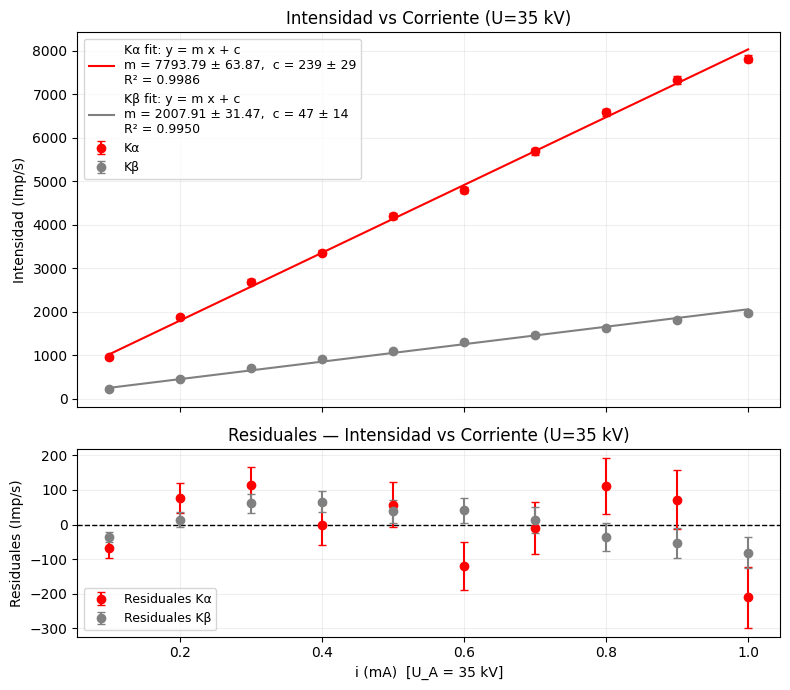

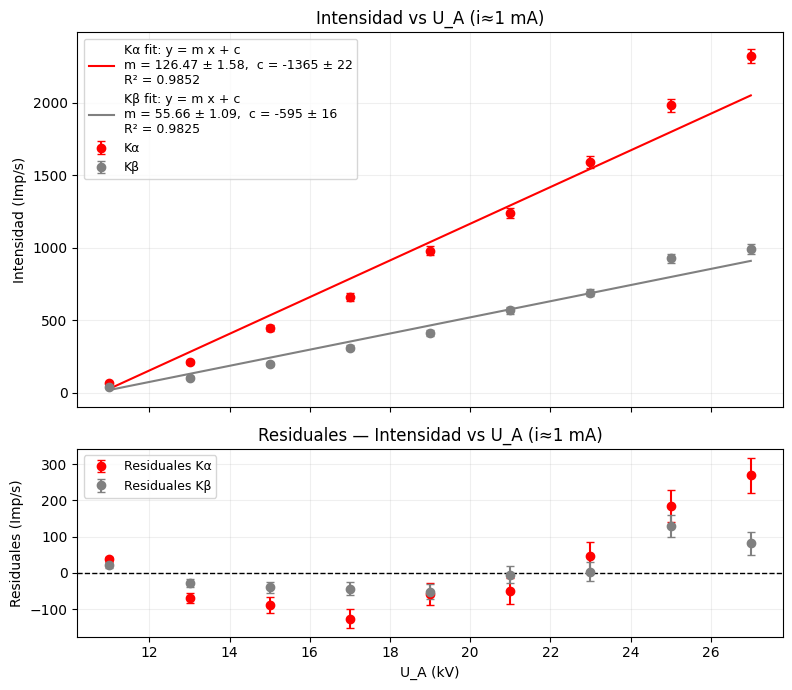

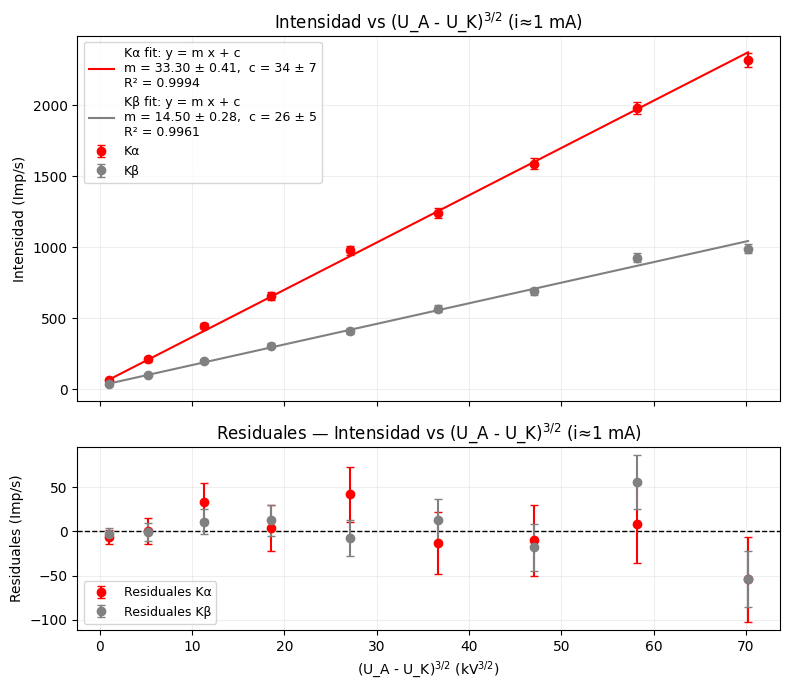

Figuras combinadas guardadas:
/fit_Kalpha_Kbeta_vs_i_combined.png
/fit_Kalpha_Kbeta_vs_U_combined.png
/fit_Kalpha_Kbeta_vs_UmUK32_combined.png


In [ ]:
# —— 1) Kα y Kβ vs corriente (U=35 kV)
fname_i = plot_pair_with_fits_uq(
    df_ivsi['i_mA'], df_ivsi['I_Kalpha'], sigma_Ka, mKa, smKa, cKa, scKa, R2Ka, chi2Ka, ndKa, "Kα",
    df_ivsi['i_mA'], df_ivsi['I_Kbeta'],  sigma_Kb, mKb, smKb, cKb, scKb, R2Kb, chi2Kb, ndKb, "Kβ",
    xlabel="i (mA)  [U_A = 35 kV]",
    title="Intensidad vs Corriente (U=35 kV)",
    fname="/fit_Kalpha_Kbeta_vs_i_combined.png",
)

# —— 2) Kα y Kβ vs U (i ≈ 1 mA)
fname_U = plot_pair_with_fits_uq(
    df_vsU['U_kV'], df_vsU['I_Kalpha'], sigmaKa_U, mKaU, smKaU, cKaU, scKaU, R2KaU, chi2KaU, ndKaU, "Kα",
    df_vsU['U_kV'], df_vsU['I_Kbeta'],  sigmaKb_U, mKbU, smKbU, cKbU, scKbU, R2KbU, chi2KbU, ndKbU, "Kβ",
    xlabel="U_A (kV)",
    title="Intensidad vs U_A (i≈1 mA)",
    fname="/fit_Kalpha_Kbeta_vs_U_combined.png",
)

# —— 3) Kα y Kβ vs (U−U_K)^{3/2} (i ≈ 1 mA)
fname_U32 = plot_pair_with_fits_uq(
    X32, df_vsU['I_Kalpha'], sigmaKa_U, mKa32, smKa32, cKa32, scKa32, R2Ka32, chi2Ka32, ndKa32, "Kα",
    X32, df_vsU['I_Kbeta'],  sigmaKb_U, mKb32, smKb32, cKb32, scKb32, R2Kb32, chi2Kb32, ndKb32, "Kβ",
    xlabel=r"(U_A - U_K)$^{3/2}$ (kV$^{3/2}$)",
    title=r"Intensidad vs (U_A - U_K)$^{3/2}$ (i≈1 mA)",
    fname="/fit_Kalpha_Kbeta_vs_UmUK32_combined.png",
    note_extra_1=f"\nU_K={UK:.3f} kV",
    note_extra_2=f"\nU_K={UK:.3f} kV",
)

print("Figuras combinadas guardadas:")
print(fname_i)
print(fname_U)
print(fname_U32)


=== Potencia I = a (U_A - U_K)^c ===
Kα: a = 48.485 ± 2.872,   c = 1.3622 ± 0.0237,   R²=0.9994, χ²/ndof=0.95
Kβ: a = 25.293 ± 2.142,   c = 1.2993 ± 0.0339,   R²=0.9951, χ²/ndof=1.87


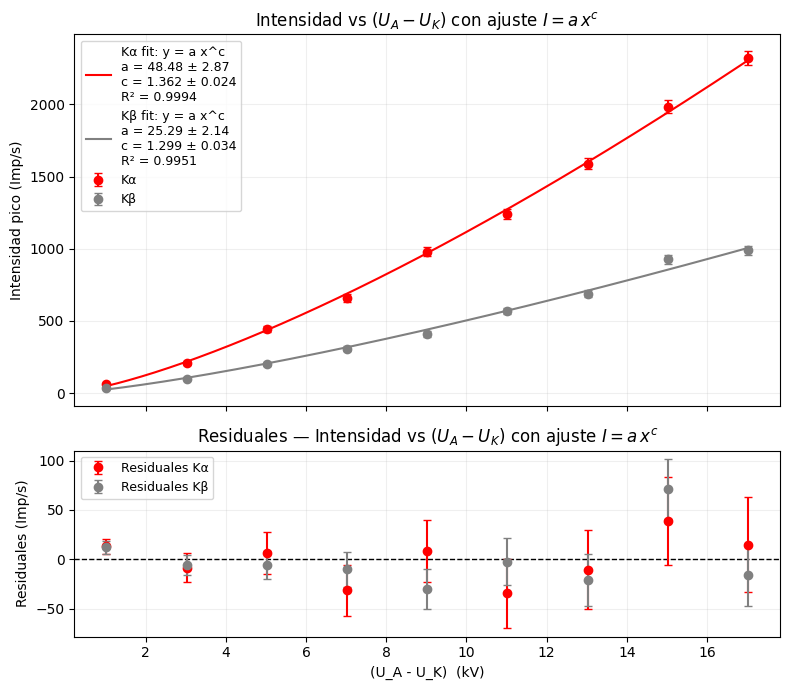

Figura guardada: /fit_power_Kalpha_Kbeta_vs_UmUk.png


In [ ]:
# =============== Ajuste potencia I = a x^c con x = (U_A - U_K) ===============
import numpy as np
import matplotlib.pyplot as plt

def weighted_linfit_logspace(x, y, sigma_y):
    """
    Ajuste ponderado en espacio log: ln y = ln a + c ln x.
    Pesos w = 1 / (sigma_ln_y)^2 con sigma_ln_y ≈ sigma_y / y.
    Devuelve: a, c, sa, sc, cov_ac, R2, chi2, ndof, residuales_y, yhat
    """
    x  = np.asarray(x, float)
    y  = np.asarray(y, float)
    sy = np.asarray(sigma_y, float)

    # Filtrar puntos válidos: x>0, y>0, sy>0
    mask = (x > 0) & (y > 0) & (sy > 0) & np.isfinite(x) & np.isfinite(y) & np.isfinite(sy)
    x, y, sy = x[mask], y[mask], sy[mask]
    if len(x) < 3:
        raise ValueError("Muy pocos puntos válidos para el ajuste de potencia.")

    X = np.log(x)
    Y = np.log(y)
    sY = sy / y  # propagación: sigma(ln y) ≈ sigma_y / y
    w = 1.0 / (sY**2)

    S   = np.sum(w)
    SX  = np.sum(w * X)
    SY  = np.sum(w * Y)
    SXX = np.sum(w * X * X)
    SXY = np.sum(w * X * Y)
    Delta = S * SXX - SX**2

    c  = (S * SXY - SX * SY) / Delta               # pendiente en log-espacio
    ln_a = (SXX * SY - SX * SXY) / Delta           # intercepto en log-espacio

    # Covarianzas en log-espacio
    var_c   = S / Delta
    var_lna = SXX / Delta
    cov_lna_c = -SX / Delta

    # Volver a espacio original
    a = np.exp(ln_a)
    sa = a * np.sqrt(var_lna)                      # σ_a = a * σ_(ln a)
    sc = np.sqrt(var_c)
    cov_ac = a * cov_lna_c                         # cov(a,c) = a * cov(ln a, c)

    # Buenas prácticas: calcular métricas en espacio original
    yhat = a * np.power(x, c)
    resid = y - yhat
    chi2 = np.sum((resid / sy)**2)
    ndof = len(x) - 2
    ss_res = np.sum(resid**2)
    ss_tot = np.sum( (y - np.average(y, weights=w))**2 )
    R2 = 1 - ss_res/ss_tot if ss_tot > 0 else np.nan

    return a, c, sa, sc, cov_ac, R2, chi2, ndof, resid, yhat, mask

def plot_power_pair(
    x, y1, s1, y2, s2,
    fit1, fit2,
    xlabel, title, fname,
    lbl1="Kα", lbl2="Kβ"
):
    """
    Grafica Kα (rojo) y Kβ (azul) para I vs x con sus curvas y=ax^c
    y residuales en panel 2:1.
    """
    a1, c1, sa1, sc1, _, R21, chi21, nd1, r1, yhat1, mask1 = fit1
    a2, c2, sa2, sc2, _, R22, chi22, nd2, r2, yhat2, mask2 = fit2

    x1 = x[mask1]; x2 = x[mask2]
    y1v = y1[mask1]; y2v = y2[mask2]
    s1v = s1[mask1]; s2v = s2[mask2]

    fig, (ax, axr) = plt.subplots(2, 1, sharex=True, figsize=(8,7),
                                  gridspec_kw={'height_ratios':[2,1]})

    # Datos
    ax.errorbar(x1, y1v, yerr=s1v, fmt='o', capsize=3, c='red',  label=lbl1)
    ax.errorbar(x2, y2v, yerr=s2v, fmt='o', capsize=3, c='gray', label=lbl2)

    # Curvas suaves
    xs = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 400)
    ax.plot(xs, a1 * xs**c1, c='red',
            label=(f"{lbl1} fit: y = a x^c\n"
                   f"a = {a1:.2f} ± {sa1:.2f}\n"
                   f"c = {c1:.3f} ± {sc1:.3f}\n"
                   f"R² = {R21:.4f}"))
    ax.plot(xs, a2 * xs**c2, c='gray',
            label=(f"{lbl2} fit: y = a x^c\n"
                   f"a = {a2:.2f} ± {sa2:.2f}\n"
                   f"c = {c2:.3f} ± {sc2:.3f}\n"
                   f"R² = {R22:.4f}"))

    ax.set_title(title)
    ax.set_ylabel("Intensidad pico (Imp/s)")
    ax.legend(fontsize=9)
    ax.grid(alpha=0.2)

    # Residuales
    axr.axhline(0, ls='--', c='black', lw=1)
    axr.errorbar(x1, r1, yerr=s1v, fmt='o', capsize=3, c='red',  label=f"Residuales {lbl1}")
    axr.errorbar(x2, r2, yerr=s2v, fmt='o', capsize=3, c='gray', label=f"Residuales {lbl2}")
    axr.set_xlabel(xlabel)
    axr.set_ylabel("Residuales (Imp/s)")
    axr.set_title(f"Residuales — {title}")
    axr.legend(fontsize=9)
    axr.grid(alpha=0.2)

    fig.tight_layout()
    fig.savefig(fname, dpi=200)
    plt.show()
    return fname

# —— Preparar x = (U_A - U_K) y series Kα/Kβ ——
x_umuk = (df_vsU['U_kV'].values - UK)
Ika = df_vsU['I_Kalpha'].values
Ikb = df_vsU['I_Kbeta' ].values
sKa = sigmaKa_U.values
sKb = sigmaKb_U.values

# Ajustes potencia en log-espacio (con pesos)
fit_Ka = weighted_linfit_logspace(x_umuk, Ika, sKa)
fit_Kb = weighted_linfit_logspace(x_umuk, Ikb, sKb)

# Imprimir resultados numéricos
a1, c1, sa1, sc1, _, R21, chi21, nd1, *_ = fit_Ka
a2, c2, sa2, sc2, _, R22, chi22, nd2, *_ = fit_Kb
print("=== Potencia I = a (U_A - U_K)^c ===")
print(f"Kα: a = {a1:.3f} ± {sa1:.3f},   c = {c1:.4f} ± {sc1:.4f},   R²={R21:.4f}, χ²/ndof={chi21/nd1:.2f}")
print(f"Kβ: a = {a2:.3f} ± {sa2:.3f},   c = {c2:.4f} ± {sc2:.4f},   R²={R22:.4f}, χ²/ndof={chi22/nd2:.2f}")

# Gráfica combinada lista para informe
fname_pow = plot_power_pair(
    x_umuk, Ika, sKa, Ikb, sKb, fit_Ka, fit_Kb,
    xlabel=r"(U_A - U_K)  (kV)",
    title=r"Intensidad vs $(U_A - U_K)$ con ajuste $I = a\,x^c$",
    fname="/fit_power_Kalpha_Kbeta_vs_UmUk.png",
)
print("Figura guardada:", fname_pow)


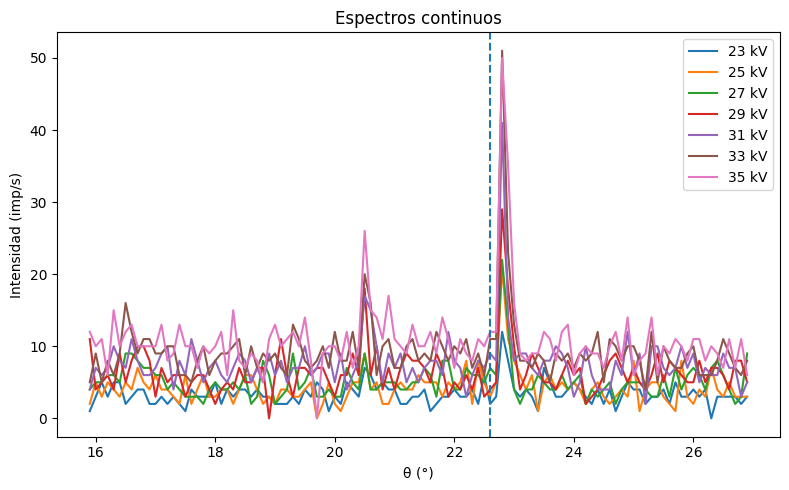

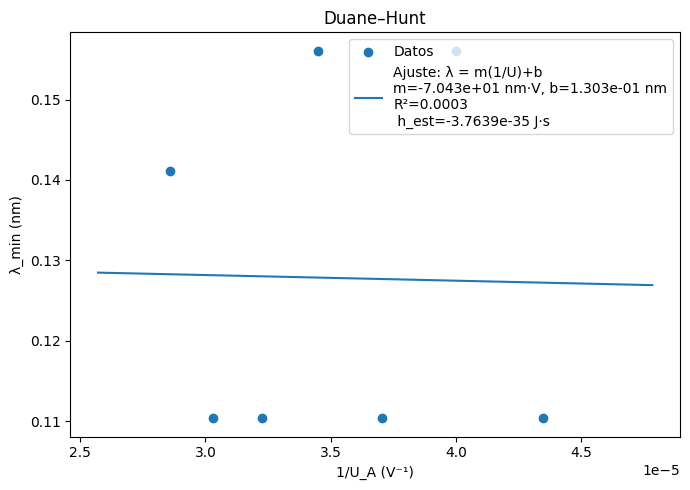

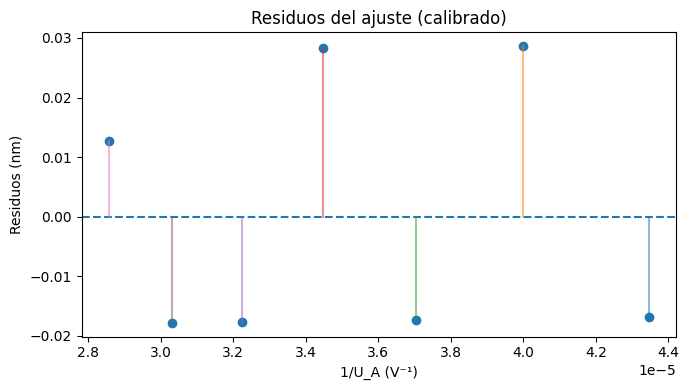

'/duane_hunt_lam_min_summary_calibrated.csv'

In [ ]:
# Rebuild everything (data parsing + calibration + plots) in one go.

import re, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw = """
Ángulo del crista	Tasa con 23kV	Tasa con 25kV	Tasa con 27kV	Tasa con 29kV	Tasa con 31kV	Tasa con 33kV	Tasa con 35kV
theta/°	R(23kV)/Imp/s	R(25kV)/Imp/s	R(27kV)/Imp/s	R(29kV)/Imp/s	R(31kV)/Imp/s	R(33kV)/Imp/s	R(35kV)/Imp/s
14	1	2	4	11	4	5	12
14,1	3	5	5	4	7	9	10
14,2	5	3	5	5	6	5	11
14,3	3	5	6	6	7	8	6
14,4	5	4	6	4	10	6	15
14,5	5	3	5	9	8	9	10
14,6	2	5	9	5	7	16	12
14,7	3	4	9	8	11	12	13
14,8	4	7	8	10	8	9	10
14,9	4	5	7	10	6	11	10
15	2	4	7	8	6	11	10
15,1	2	6	6	3	7	9	10
15,2	3	4	6	7	9	9	13
15,3	2	4	4	5	10	10	8
15,4	3	3	5	6	4	10	9
15,5	2	2	4	6	8	6	13
15,6	1	6	3	3	6	6	10
15,7	4	2	3	5	11	5	10
15,8	3	4	3	6	8	8	7
15,9	3	6	2	6	5	10	10
16	3	3	4	4	7	6	9
16,1	5	3	5	2	8	8	10
16,2	2	4	4	4	6	9	12
16,3	4	4	4	5	5	9	6
16,4	3	2	5	4	7	10	15
16,5	4	4	4	7	9	11	8
16,6	4	6	6	5	8	6	7
16,7	3	6	2	5	5	10	9
16,8	4	4	3	7	7	7	8
16,9	3	2	8	7	5	9	5
17	3	3	6	0	9	8	11
17,1	2	2	2	6	6	9	13
17,2	2	4	3	11	8	7	10
17,3	2	4	4	6	5	6	11
17,4	3	3	9	3	7	13	12
17,5	2	3	4	7	7	11	10
17,6	4	4	5	7	10	8	14
17,7	3	5	7	6	6	7	8
17,8	5	0	3	7	7	8	0
17,9	4	2	3	7	9	10	9
18	1	5	4	5	9	7	10
18,1	3	2	3	3	5	12	10
18,2	2	1	3	6	9	8	8
18,3	5	3	7	6	4	8	12
18,4	4	5	5	9	6	12	7
18,5	3	5	4	6	8	7	10
18,6	7	9	9	18	17	20	26
18,7	6	4	4	6	15	16	15
18,8	4	5	4	10	10	6	14
18,9	5	2	5	4	5	10	11
19	4	2	5	7	9	11	17
19,1	4	4	5	4	7	7	11
19,2	2	5	4	7	9	7	10
19,3	2	4	4	9	5	10	9
19,4	3	4	5	8	7	11	13
19,5	3	6	5	8	5	8	10
19,6	4	5	7	7	7	9	10
19,7	1	5	6	5	8	8	12
19,8	2	5	3	9	8	12	9
19,9	3	3	8	7	6	10	14
20	3	5	8	3	12	8	11
20,1	4	4	4	5	8	10	7
20,2	3	5	4	4	7	9	11
20,3	3	8	7	6	3	11	9
20,4	4	2	6	4	6	7	8
20,5	2	8	6	7	8	9	11
20,6	6	5	5	3	7	6	10
20,7	2	3	7	4	9	11	12
20,8	3	5	6	5	8	11	12
20,9	12	21	22	29	41	51	50
21	8	11	13	18	14	23	35
21,1	4	8	4	10	8	13	16
21,2	3	6	2	4	9	8	9
21,3	4	4	4	6	9	8	8
21,4	3	6	4	9	7	7	9
21,5	1	1	6	7	6	9	9
21,6	7	5	5	5	8	8	12
21,7	5	6	4	5	8	5	11
21,8	3	4	4	4	10	9	8
21,9	3	5	6	6	9	8	12
22	4	4	4	8	7	9	13
22,1	5	5	5	6	3	7	6
22,2	4	4	6	7	5	9	9
22,3	3	2	2	2	10	8	10
22,4	2	4	4	3	6	9	9
22,5	4	5	3	4	4	12	9
22,6	2	3	4	6	4	5	7
22,7	4	2	5	8	4	11	10
22,8	1	3	2	9	8	10	12
22,9	3	4	4	7	6	8	8
23	5	3	5	5	12	10	14
23,1	4	8	5	7	6	10	6
23,2	4	1	5	5	9	8	8
23,3	2	4	4	4	2	4	9
23,4	3	5	3	6	10	12	14
23,5	3	5	3	9	10	5	6
23,6	4	3	6	5	7	10	10
23,7	2	2	3	8	6	8	9
23,8	5	1	7	7	7	7	11
23,9	3	8	4	6	10	7	10
24	3	3	6	5	7	9	8
24,1	4	2	7	5	9	10	11
24,2	3	4	6	8	5	6	11
24,3	4	3	4	5	7	6	8
24,4	0	7	7	7	6	6	10
24,5	3	4	8	7	6	8	9
24,6	3	3	6	6	9	11	7
24,7	3	5	4	4	7	9	11
24,8	3	3	2	8	7	7	7
24,9	2	3	3	8	3	6	11
25	3	3	9	5	5	8	6
"""

def fix_token(tok):
    if re.match(r'^\d+,\d+$', tok):
        return tok.replace(',', '.')
    return tok

rows = []
for ln in raw.strip().splitlines():
    ln = ln.strip()
    if not ln:
        continue
    parts = re.split(r'\t+', ln)
    parts = [fix_token(p) for p in parts]
    rows.append(parts)

df = pd.DataFrame(rows[2:], columns=rows[0])
df = df.rename(columns={
    'Ángulo del crista': 'theta_deg',
    'Tasa con 23kV': 'R_23',
    'Tasa con 25kV': 'R_25',
    'Tasa con 27kV': 'R_27',
    'Tasa con 29kV': 'R_29',
    'Tasa con 31kV': 'R_31',
    'Tasa con 33kV': 'R_33',
    'Tasa con 35kV': 'R_35',
})
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna().reset_index(drop=True)

# constants
d_LiF_nm = 0.2014
c = 299_792_458.0
e = 1.602_176_634e-19

def find_theta_min(theta, y, keep_n=3):
    y_s = pd.Series(y).rolling(window=5, center=True, min_periods=1).median().values
    n0 = max(3, int(0.1*len(y_s)))
    baseline = float(np.median(y_s[:n0]))
    noise = float(np.std(y_s[:n0]))
    thr = baseline + max(3.0, 2.5*noise)
    for i in range(len(y_s)-keep_n+1):
        if np.all(y_s[i:i+keep_n] > thr):
            return float(theta[i])
    rel_thr = 0.2 * np.max(y_s)
    idx = np.argmax(y_s > rel_thr)
    return float(theta[idx])

# === Calibration ===
delta_deg = 22.6 - 20.7  # +1.9°
df['theta_deg_cal'] = df['theta_deg'] + delta_deg

# recompute θmin and λmin
voltages_kV = [23,25,27,29,31,33,35]
theta_min_cal, lambda_min_nm_cal = [], []

for V in voltages_kV:
    th = df['theta_deg_cal'].values
    y = df[f'R_{V}'].values
    tmin = find_theta_min(th, y)
    theta_min_cal.append(tmin)
    lam = 2 * d_LiF_nm * math.sin(math.radians(tmin))
    lambda_min_nm_cal.append(lam)

summary_cal = pd.DataFrame({
    'U_kV': voltages_kV,
    'theta_min_deg_cal': np.round(theta_min_cal, 3),
    'lambda_min_nm_cal': np.round(lambda_min_nm_cal, 5),
})

# Fit
x = 1.0/(summary_cal['U_kV'].values*1e3)
y_m = summary_cal['lambda_min_nm_cal'].values*1e-9
m, b = np.polyfit(x, y_m, 1)
y_fit_m = m*x + b
ss_res = np.sum((y_m - y_fit_m)**2)
ss_tot = np.sum((y_m - np.mean(y_m))**2)
r2 = 1 - ss_res/ss_tot if ss_tot>0 else np.nan
h_est = m*e/c

# — Plots —
plt.figure(figsize=(8,5))
for V in voltages_kV:
    plt.plot(df['theta_deg_cal'], df[f'R_{V}'], label=f'{V} kV')
plt.axvline(22.6, linestyle='--')
plt.xlabel('θ (°)')
plt.ylabel('Intensidad (imp/s)')
plt.title('Espectros continuos')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(x, y_m*1e9, label='Datos')
xx = np.linspace(min(x)*0.9, max(x)*1.1, 100)
plt.plot(xx, (m*xx + b)*1e9, label=f'Ajuste: λ = m(1/U)+b\nm={m*1e9:.3e} nm·V, b={b*1e9:.3e} nm\nR²={r2:.4f}\n h_est={h_est:.4e} J·s')
plt.xlabel('1/U_A (V⁻¹)')
plt.ylabel('λ_min (nm)')
plt.title('Duane–Hunt')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
res = y_m*1e9 - y_fit_m*1e9
plt.axhline(0, linestyle='--')
plt.scatter(x, res)
for xi, ri in zip(x, res):
    plt.plot([xi, xi], [0, ri], alpha=0.5)
plt.xlabel('1/U_A (V⁻¹)')
plt.ylabel('Residuos (nm)')
plt.title('Residuos del ajuste (calibrado)')
plt.tight_layout()
plt.show()

# Save calibrated summary
summary_cal_path = "/duane_hunt_lam_min_summary_calibrated.csv"
summary_cal.to_csv(summary_cal_path, index=False)


summary_cal_path


In [ ]:
# Recompute calibrated θ_min, λ_min with uncertainties and print both the graphics and the table.
# We'll combine the two plots into one image (stitched vertically) per tool guidance.
import re, math, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# ---------- 1) Parse data ----------
raw = """
Ángulo del crista	Tasa con 23kV	Tasa con 25kV	Tasa con 27kV	Tasa con 29kV	Tasa con 31kV	Tasa con 33kV	Tasa con 35kV
theta/°	R(23kV)/Imp/s	R(25kV)/Imp/s	R(27kV)/Imp/s	R(29kV)/Imp/s	R(31kV)/Imp/s	R(33kV)/Imp/s	R(35kV)/Imp/s
14	1	2	4	11	4	5	12
14,1	3	5	5	4	7	9	10
14,2	5	3	5	5	6	5	11
14,3	3	5	6	6	7	8	6
14,4	5	4	6	4	10	6	15
14,5	5	3	5	9	8	9	10
14,6	2	5	9	5	7	16	12
14,7	3	4	9	8	11	12	13
14,8	4	7	8	10	8	9	10
14,9	4	5	7	10	6	11	10
15	2	4	7	8	6	11	10
15,1	2	6	6	3	7	9	10
15,2	3	4	6	7	9	9	13
15,3	2	4	4	5	10	10	8
15,4	3	3	5	6	4	10	9
15,5	2	2	4	6	8	6	13
15,6	1	6	3	3	6	6	10
15,7	4	2	3	5	11	5	10
15,8	3	4	3	6	8	8	7
15,9	3	6	2	6	5	10	10
16	3	3	4	4	7	6	9
16,1	5	3	5	2	8	8	10
16,2	2	4	4	4	6	9	12
16,3	4	4	4	5	5	9	6
16,4	3	2	5	4	7	10	15
16,5	4	4	4	7	9	11	8
16,6	4	6	6	5	8	6	7
16,7	3	6	2	5	5	10	9
16,8	4	4	3	7	7	7	8
16,9	3	2	8	7	5	9	5
17	3	3	6	0	9	8	11
17,1	2	2	2	6	6	9	13
17,2	2	4	3	11	8	7	10
17,3	2	4	4	6	5	6	11
17,4	3	3	9	3	7	13	12
17,5	2	3	4	7	7	11	10
17,6	4	4	5	7	10	8	14
17,7	3	5	7	6	6	7	8
17,8	5	0	3	7	7	8	0
17,9	4	2	3	7	9	10	9
18	1	5	4	5	9	7	10
18,1	3	2	3	3	5	12	10
18,2	2	1	3	6	9	8	8
18,3	5	3	7	6	4	8	12
18,4	4	5	5	9	6	12	7
18,5	3	5	4	6	8	7	10
18,6	7	9	9	18	17	20	26
18,7	6	4	4	6	15	16	15
18,8	4	5	4	10	10	6	14
18,9	5	2	5	4	5	10	11
19	4	2	5	7	9	11	17
19,1	4	4	5	4	7	7	11
19,2	2	5	4	7	9	7	10
19,3	2	4	4	9	5	10	9
19,4	3	4	5	8	7	11	13
19,5	3	6	5	8	5	8	10
19,6	4	5	7	7	7	9	10
19,7	1	5	6	5	8	8	12
19,8	2	5	3	9	8	12	9
19,9	3	3	8	7	6	10	14
20	3	5	8	3	12	8	11
20,1	4	4	4	5	8	10	7
20,2	3	5	4	4	7	9	11
20,3	3	8	7	6	3	11	9
20,4	4	2	6	4	6	7	8
20,5	2	8	6	7	8	9	11
20,6	6	5	5	3	7	6	10
20,7	2	3	7	4	9	11	12
20,8	3	5	6	5	8	11	12
20,9	12	21	22	29	41	51	50
21	8	11	13	18	14	23	35
21,1	4	8	4	10	8	13	16
21,2	3	6	2	4	9	8	9
21,3	4	4	4	6	9	8	8
21,4	3	6	4	9	7	7	9
21,5	1	1	6	7	6	9	9
21,6	7	5	5	5	8	8	12
21,7	5	6	4	5	8	5	11
21,8	3	4	4	4	10	9	8
21,9	3	5	6	6	9	8	12
22	4	4	4	8	7	9	13
22,1	5	5	5	6	3	7	6
22,2	4	4	6	7	5	9	9
22,3	3	2	2	2	10	8	10
22,4	2	4	4	3	6	9	9
22,5	4	5	3	4	4	12	9
22,6	2	3	4	6	4	5	7
22,7	4	2	5	8	4	11	10
22,8	1	3	2	9	8	10	12
22,9	3	4	4	7	6	8	8
23	5	3	5	5	12	10	14
23,1	4	8	5	7	6	10	6
23,2	4	1	5	5	9	8	8
23,3	2	4	4	4	2	4	9
23,4	3	5	3	6	10	12	14
23,5	3	5	3	9	10	5	6
23,6	4	3	6	5	7	10	10
23,7	2	2	3	8	6	8	9
23,8	5	1	7	7	7	7	11
23,9	3	8	4	6	10	7	10
24	3	3	6	5	7	9	8
24,1	4	2	7	5	9	10	11
24,2	3	4	6	8	5	6	11
24,3	4	3	4	5	7	6	8
24,4	0	7	7	7	6	6	10
24,5	3	4	8	7	6	8	9
24,6	3	3	6	6	9	11	7
24,7	3	5	4	4	7	9	11
24,8	3	3	2	8	7	7	7
24,9	2	3	3	8	3	6	11
25	3	3	9	5	5	8	6
"""

def fix_token(tok):
    return tok.replace(',', '.') if re.match(r'^\d+,\d+$', tok) else tok

rows = []
for ln in raw.strip().splitlines():
    parts = re.split(r'\t+', ln.strip())
    parts = [fix_token(p) for p in parts]
    rows.append(parts)

df = pd.DataFrame(rows[2:], columns=rows[0]).rename(columns={
    'Ángulo del crista': 'theta_deg',
    'Tasa con 23kV': 'R_23', 'Tasa con 25kV': 'R_25', 'Tasa con 27kV': 'R_27',
    'Tasa con 29kV': 'R_29', 'Tasa con 31kV': 'R_31', 'Tasa con 33kV': 'R_33',
    'Tasa con 35kV': 'R_35'
})
for c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna().reset_index(drop=True)

# ---------- 2) Calibration and θ_min detection ----------
delta_deg = 22.6 - 20.7   # +1.9°
df['theta_deg_cal'] = df['theta_deg'] + delta_deg

def find_theta_min(theta, y, keep_n=3):
    y_s = pd.Series(y).rolling(window=5, center=True, min_periods=1).median().values
    n0 = max(3, int(0.1*len(y_s)))
    baseline = float(np.median(y_s[:n0]))
    noise = float(np.std(y_s[:n0]))
    thr = baseline + max(3.0, 2.5*noise)
    for i in range(len(y_s)-keep_n+1):
        if np.all(y_s[i:i+keep_n] > thr):
            return float(theta[i])
    rel_thr = 0.2*np.max(y_s)
    idx = np.argmax(y_s > rel_thr)
    return float(theta[idx])

# ---------- 3) λ_min with uncertainties ----------
d_LiF_nm = 0.2014
deg2rad = np.pi/180.0
sigma_theta_deg = 0.05  # resolución angular 0.1° -> asumimos ±0.05° (1σ)
sigma_theta_rad = sigma_theta_deg * deg2rad

voltages = [23,25,27,29,31,33,35]
theta_min, lambda_min_nm, sigma_lambda_nm = [], [], []

for V in voltages:
    th = df['theta_deg_cal'].values
    y = df[f'R_{V}'].values
    tmin = find_theta_min(th, y)
    lam = 2*d_LiF_nm*np.sin(tmin*deg2rad)
    # Propagación: σ_λ = 2 d cosθ * σ_θ
    sig_lam = 2*d_LiF_nm*np.cos(tmin*deg2rad) * sigma_theta_rad
    theta_min.append(tmin)
    lambda_min_nm.append(lam)
    sigma_lambda_nm.append(sig_lam)

summary = pd.DataFrame({
    'U_kV': voltages,
    'theta_min_deg_cal': np.round(theta_min, 3),
    'sigma_theta_deg': np.full(len(voltages), sigma_theta_deg),
    'lambda_min_nm': np.round(lambda_min_nm, 5),
    'sigma_lambda_nm': np.round(sigma_lambda_nm, 5),
})

# ---------- 4) Weighted linear regression λ vs 1/U ----------
x = 1.0/(summary['U_kV'].values*1e3)            # 1/V
y = summary['lambda_min_nm'].values*1e-9         # m
sigma_y = summary['sigma_lambda_nm'].values*1e-9 # m

w = 1.0/np.square(sigma_y)
S = np.sum(w)
Sx = np.sum(w*x)
Sy = np.sum(w*y)
Sxx = np.sum(w*x*x)
Sxy = np.sum(w*x*y)
Delta = S*Sxx - Sx*Sx
m = (S*Sxy - Sx*Sy)/Delta
b = (Sy - m*Sx)/S

# Uncertainties of fit parameters
y_fit = m*x + b
chi2 = np.sum(w*np.square(y - y_fit))
dof = len(x) - 2
s2 = chi2/dof if dof > 0 else 0.0
sigma_m = math.sqrt(S/Delta * s2)
sigma_b = math.sqrt(Sxx/Delta * s2)

# Derived h and its uncertainty
c = 299_792_458.0
e = 1.602_176_634e-19
h_est = m*e/c
sigma_h = sigma_m*e/c

# ---------- 5) Make plots and stitch ----------
# Plot 1: λ vs 1/U with weighted fit and errorbars
fig1 = plt.figure(figsize=(7,5))
plt.errorbar(x, y*1e9, yerr=sigma_y*1e9, fmt='o', capsize=3, label='Datos', c="red")
xx = np.linspace(min(x)*0.9, max(x)*1.1, 200)
plt.plot(xx, (m*xx + b)*1e9, label=(
    'Ajuste ponderado: λ = m(1/U)+b\n'
    f'm = {(m*1e9):.3e} ± {(sigma_m*1e9):.2e} nm·V\n'
    f'b = {(b*1e9):.3e} ± {(sigma_b*1e9):.2e} nm\n'
    f'h = {h_est:.4e} ± {sigma_h:.1e} J·s'
), c="gray")
plt.xlabel('1/U_A (V⁻¹)')
plt.ylabel('λ_min (nm)')
plt.title('Duane–Hunt')
plt.legend()
plt.tight_layout()
buf1 = io.BytesIO()
plt.savefig(buf1, format='png', dpi=160)
plt.close(fig1)

# Plot 2: Residuals (with errorbars)
fig2 = plt.figure(figsize=(7,3.8))
res_nm = (y - y_fit)*1e9
sigma_res_nm = sigma_y*1e9
plt.axhline(0, linestyle='--', c="gray")
plt.errorbar(x, res_nm, yerr=sigma_res_nm, fmt='o', capsize=3, c="red")
for xi, ri in zip(x, res_nm):
    plt.plot([xi, xi], [0, ri], alpha=0.6)
plt.xlabel('1/U_A (V⁻¹)')
plt.ylabel('Residuos (nm)')
plt.title('Residuos del ajuste')
plt.tight_layout()
buf2 = io.BytesIO()
plt.savefig(buf2, format='png', dpi=160)
plt.close(fig2)
plt.show

# Stitch vertically into one image
buf1.seek(0); buf2.seek(0)
im1 = Image.open(buf1).convert('RGB')
im2 = Image.open(buf2).convert('RGB')
w = max(im1.width, im2.width)
canvas = Image.new('RGB', (w, im1.height + im2.height), (255,255,255))
canvas.paste(im1, (0,0))
canvas.paste(im2, (0,im1.height))
combined_path = 'duane_hunt_fit_plus_residuals_with_unc.png'
canvas.save(combined_path)


combined_path


'duane_hunt_fit_plus_residuals_with_unc.png'